<a href="https://colab.research.google.com/github/gongbububu/gongbububu/blob/main/%EC%A0%84%EA%B7%B9%EA%B5%AC%EC%A1%B0%EB%AA%A8%EC%82%AC_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LFP Î∞∞Ïπò ÏúÑÏπò: (7.12, 2.87), Î∞òÏßÄÎ¶Ñ: 1.94, Í∏∞Í≥µÎ•†: 88.19%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.01, 9.04), Î∞òÏßÄÎ¶Ñ: 1.89, Í∏∞Í≥µÎ•†: 76.43%
LFP Î∞∞Ïπò ÏúÑÏπò: (2.01, 0.42), Î∞òÏßÄÎ¶Ñ: 1.41, Í∏∞Í≥µÎ•†: 69.90%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.20, 4.56), Î∞òÏßÄÎ¶Ñ: 1.80, Í∏∞Í≥µÎ•†: 59.20%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.86, 9.45), Î∞òÏßÄÎ¶Ñ: 1.53, Í∏∞Í≥µÎ•†: 51.50%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.75, 9.69), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 45.74%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.61, 4.90), Î∞òÏßÄÎ¶Ñ: 1.36, Í∏∞Í≥µÎ•†: 39.97%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.42, 5.71), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 34.65%
LFP Î∞∞Ïπò ÏúÑÏπò: (8.98, -0.09), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 28.87%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.63, 6.79), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 23.77%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.19, 0.01), Î∞òÏßÄÎ¶Ñ: 1.34, Í∏∞Í≥µÎ•†: 17.84%
Final porosity: 17.84%


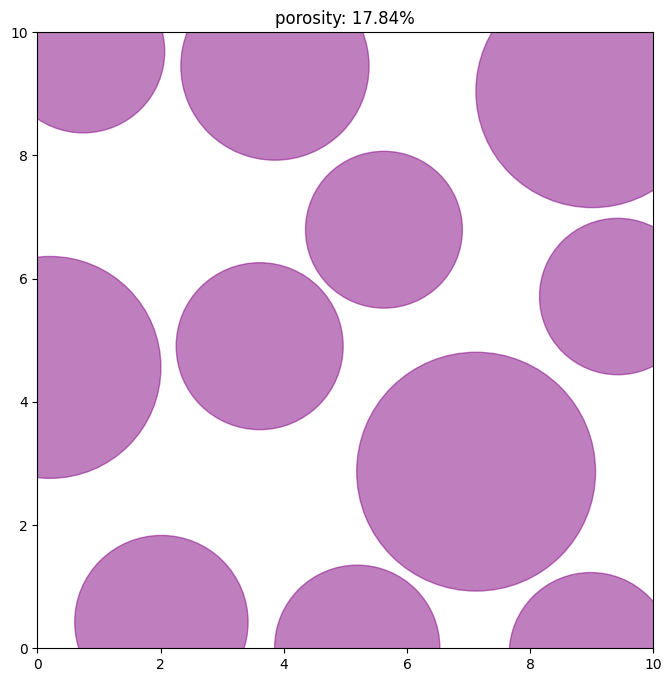

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï
np.random.seed(3)

# ÏõêÏùò Î©¥Ï†Å Í≥ÑÏÇ∞ Ìï®Ïàò (ÏûòÎ¶∞ ÏõêÏùÑ Ìè¨Ìï®Ìïú Í≥ÑÏÇ∞)
def circle_rect_area(x, y, r, domain_size):
    if 0 <= x - r and x + r <= domain_size and 0 <= y - r and y + r <= domain_size:
        return pi * r**2
    else:
        return pi * r**2 * 1.05

# LFP Î∞∞Ïπò Ìï®Ïàò
def increase_radius_to_target_porosity(domain_size, min_r_LFP=1.25, max_r_LFP=2.5, target_porosity=0.2, max_attempts=10000):
    lfp_positions = []
    total_area = domain_size ** 2
    max_occupied_area = total_area * (1 - target_porosity)
    occupied_area = 0
    attempts = 0

    while occupied_area < max_occupied_area and attempts < max_attempts:
        r_LFP = np.random.uniform(min_r_LFP, max_r_LFP)
        x = np.random.uniform(-0.1, domain_size + 0.1)
        y = np.random.uniform(-0.1, domain_size + 0.1)

        overlap = False
        for lx, ly, lr in lfp_positions:
            dist = np.hypot(x - lx, y - ly)
            if dist < (r_LFP + lr) * 1.05:
                overlap = True
                break

        if not overlap:
            lfp_positions.append((x, y, r_LFP))
            occupied_area = sum(circle_rect_area(x, y, r, domain_size) for (x, y, r) in lfp_positions)
            print(f"LFP Î∞∞Ïπò ÏúÑÏπò: ({x:.2f}, {y:.2f}), Î∞òÏßÄÎ¶Ñ: {r_LFP:.2f}, Í∏∞Í≥µÎ•†: {1 - occupied_area / total_area:.2%}")

        attempts += 1

    while occupied_area < max_occupied_area and attempts < max_attempts:
        lfp_positions.sort(key=lambda x: x[2])

        for i in range(len(lfp_positions)):
            lx, ly, lr = lfp_positions[i]
            if lr < max_r_LFP:
                new_lr = lr + 0.07
                overlap = False
                for j in range(len(lfp_positions)):
                    if i != j:
                        lpx, lpy, lpr = lfp_positions[j]
                        dist = np.hypot(lx - lpx, ly - lpy)
                        if dist < (new_lr + lpr) * 1.05:
                            overlap = True
                            break

                if not overlap:
                    lfp_positions[i] = (lx, ly, new_lr)
                    occupied_area = sum(circle_rect_area(x, y, r, domain_size) for (x, y, r) in lfp_positions)
                    print(f"LFP Î∞∞Ïπò ÏúÑÏπò: ({lx:.2f}, {ly:.2f}), Î∞òÏßÄÎ¶Ñ: {new_lr:.2f}, Í∏∞Í≥µÎ•†: {1 - occupied_area / total_area:.2%}")

        attempts += 1

    occupied_area = sum(circle_rect_area(x, y, r_LFP, domain_size) for (x, y, r_LFP) in lfp_positions)
    porosity = 1 - occupied_area / total_area
    print(f"Final porosity: {porosity:.2%}")

    return lfp_positions

# ÏòàÏãú ÏÇ¨Ïö©
domain_size = 10
target_porosity = 0.1
lfp_positions = increase_radius_to_target_porosity(domain_size, target_porosity=target_porosity)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))
for (lx, ly, lr) in lfp_positions:
    circle = patches.Circle((lx, ly), lr, color='purple', alpha=0.5)
    plt.gca().add_artist(circle)
plt.xlim(0, domain_size)
plt.ylim(0, domain_size)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"porosity: {1 - sum(circle_rect_area(x, y, r_LFP, domain_size) for (x, y, r_LFP) in lfp_positions) / (domain_size ** 2):.2%}")
plt.show()


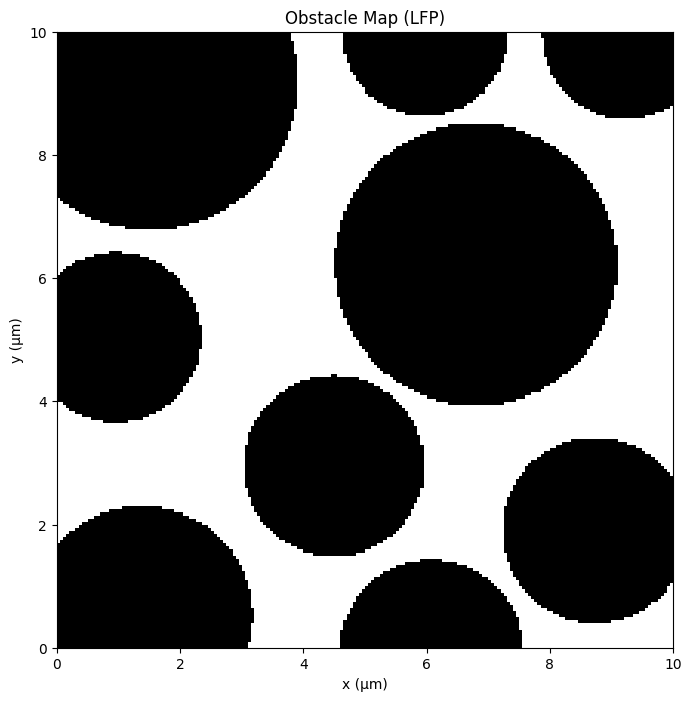

In [ ]:
 def generate_obstacle_map(domain_size, grid_size, lfp_positions, r_cb=0.1):
    grid_resolution = int(domain_size / grid_size)
    obstacle_map = np.zeros((grid_resolution, grid_resolution), dtype=int)

    def mark_obstacle(cx, cy, r):
        for i in range(grid_resolution):
            for j in range(grid_resolution):
                x = i * grid_size + grid_size / 2
                y = j * grid_size + grid_size / 2
                if np.hypot(cx - x, cy - y) <= r:
                    obstacle_map[i, j] = 1

    for lx, ly, lr in lfp_positions:
        mark_obstacle(lx, ly, lr)


    return obstacle_map

# ÏòàÏãú ÏÇ¨Ïö©
grid_size = 0.05
obstacle_map = generate_obstacle_map(domain_size, grid_size, lfp_positions)

plt.figure(figsize=(8, 8))
plt.imshow(obstacle_map.T, origin='lower', cmap='Greys', extent=[0, domain_size, 0, domain_size])
plt.title("Obstacle Map (LFP)")
plt.xlabel("x (Œºm)")
plt.ylabel("y (Œºm)")
plt.grid(False)
plt.show()

LFP Î∞∞Ïπò ÏúÑÏπò: (7.12, 2.87), Î∞òÏßÄÎ¶Ñ: 1.94, Í∏∞Í≥µÎ•†: 88.19%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.01, 9.04), Î∞òÏßÄÎ¶Ñ: 1.89, Í∏∞Í≥µÎ•†: 76.43%
LFP Î∞∞Ïπò ÏúÑÏπò: (2.01, 0.42), Î∞òÏßÄÎ¶Ñ: 1.41, Í∏∞Í≥µÎ•†: 69.90%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.20, 4.56), Î∞òÏßÄÎ¶Ñ: 1.80, Í∏∞Í≥µÎ•†: 59.20%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.86, 9.45), Î∞òÏßÄÎ¶Ñ: 1.53, Í∏∞Í≥µÎ•†: 51.50%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.75, 9.69), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 45.74%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.61, 4.90), Î∞òÏßÄÎ¶Ñ: 1.36, Í∏∞Í≥µÎ•†: 39.97%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.42, 5.71), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 34.65%
LFP Î∞∞Ïπò ÏúÑÏπò: (8.98, -0.09), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 28.87%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.63, 6.79), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 23.77%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.19, 0.01), Î∞òÏßÄÎ¶Ñ: 1.34, Í∏∞Í≥µÎ•†: 17.84%
Final porosity: 17.84%
Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòï(ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(127), 0, np.int64(31), 87)
Ïã§Ï†ú Ï¢åÌëú(Œºm): x=0.00, y=6.35, width=4.35, height=1.55


<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout

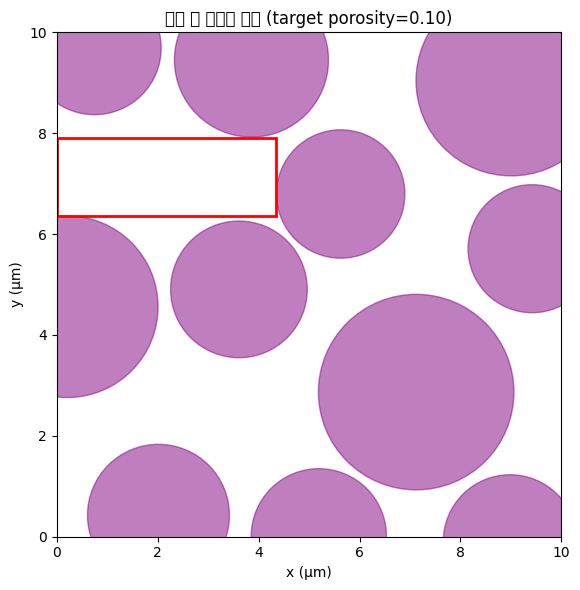

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# ---------------------------------------------------------------
# 1) ÏõêÏùò Î©¥Ï†Å Í≥ÑÏÇ∞ Ìï®Ïàò (ÏûòÎ¶∞ Ïõê Î≥¥Ï†ï Ìè¨Ìï®)
# ---------------------------------------------------------------
def circle_rect_area(x, y, r, domain_size):
    """
    (x,y) Ï§ëÏã¨, r Î∞òÏßÄÎ¶ÑÏù∏ ÏõêÏù¥ domain_size√ódomain_size ÎÇ¥Ïóê
    ÏôÑÏ†ÑÌûà Îì§Ïñ¥Í∞ÄÎ©¥ pi*r^2,
    ÏùºÎ∂ÄÍ∞Ä ÎÇòÍ∞ÄÎ©¥ ÏïΩÍ∞Ñ Î≥¥Ï†ïÌïòÏó¨ pi*r^2*1.05 Î¶¨ÌÑ¥.
    """
    if 0 <= x - r and x + r <= domain_size and 0 <= y - r and y + r <= domain_size:
        return pi * r**2
    else:
        return pi * r**2 * 1.05




# ---------------------------------------------------------------
# 3) ÌûàÏä§ÌÜ†Í∑∏Îû® Í∏∞Î∞ò ‚ÄúÏµúÎåÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï Ï∞æÍ∏∞‚Äù ÏïåÍ≥†Î¶¨Ï¶ò
#    (Í∞Å ÌñâÎßàÎã§ ‚ÄòÎπà Í≥µÍ∞Ñ Ïó∞ÏÜç ÎÜíÏù¥‚ÄôÎ•º ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú Î≥¥Í≥†,
#     largest rectangle in histogram ÏïåÍ≥†Î¶¨Ï¶ò Ï†ÅÏö©)
# ---------------------------------------------------------------
def find_largest_empty_rectangle(binary_map):
    """
    binary_map: 2Ï∞®Ïõê NumPy Î∞∞Ïó¥ (0=Îπà Í≥µÍ∞Ñ, 1=Ïû•Ïï†Î¨º).
    Í∞Å ÌñâÎßàÎã§ ‚ÄúÏù¥Ï†Ñ ÌñâÍπåÏßÄ ÏåìÏù∏ Ïó∞ÏÜçÎêú 0Ïùò Í∞úÏàò‚ÄùÎ•º ÌûàÏä§ÌÜ†Í∑∏Îû® ÎÜíÏù¥Î°ú Î≥¥Í≥†,
    O(N*M) ÏãúÍ∞ÑÏóê ‚Äúbinary_map Ï†ÑÏ≤¥ÏóêÏÑú Í∞ÄÏû• ÎÑìÏùÄ 0 ÏßÅÏÇ¨Í∞ÅÌòï‚ÄùÏùÑ Ï∞æÏäµÎãàÎã§.

    Î∞òÌôòÍ∞í:
       (best_row, best_col, best_height, best_width)
       ‚Üí ‚ÄúÍ∞ÄÏû• ÌÅ∞ ÏßÅÏÇ¨Í∞ÅÌòï‚ÄùÏùò ÏôºÏ™Ω ÏïÑÎûò Íº≠ÏßìÏ†êÏù¥ (best_row, best_col)Ïù¥Í≥†,
          height=best_height, width=best_width Ïù∏ ÌîΩÏÖÄ Îã®ÏúÑ Ï†ïÎ≥¥.
    """
    H, W = binary_map.shape

    # Í∞Å Ïó¥ÎßàÎã§ ‚ÄúÏßÄÍ∏àÍπåÏßÄ Ïù¥Ïñ¥ÏßÑ Ïó∞ÏÜçÎêú 0Ïùò ÎÜíÏù¥‚ÄùÎ•º Ï†ÄÏû•Ìï† Î∞∞Ïó¥
    heights = np.zeros(W, dtype=int)
    best_area = 0
    best_params = (0, 0, 0, 0)  # (Ìñâ, Ïó¥, ÎÜíÏù¥, ÎÑàÎπÑ)

    for i in range(H):
        # 1) heights Î∞∞Ïó¥ Í∞±Ïã†:
        #    binary_map[i,j] == 0 Ïù¥Î©¥ heights[j] += 1, ÏïÑÎãàÎ©¥ 0 Î¶¨ÏÖã.
        for j in range(W):
            if binary_map[i, j] == 0:
                heights[j] += 1
            else:
                heights[j] = 0

        # 2) Ïù¥ ‚Äúheights‚ÄùÎ•º ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú Î≥¥Í≥†,
        #    largest rectangle in histogram ÏïåÍ≥†Î¶¨Ï¶ò ÏàòÌñâ
        stack = []
        for j in range(W + 1):
            # sentinel: j==W Ïùº Îïå, height=0 Î°ú Í∞ÄÏ†ï
            h = heights[j] if j < W else 0
            # Ïä§ÌÉùÏù¥ ÎπÑÏßÄ ÏïäÏïòÍ≥†, ÌòÑÏû¨ ÎÜíÏù¥<h_top Ïù¥Î©¥ pop Ï≤òÎ¶¨
            while stack and (heights[stack[-1]] > h):
                top = stack.pop()
                height_top = heights[top]
                # ÎÑìÏù¥ Í≥ÑÏÇ∞:
                #   right boundary = j - 1,
                #   left boundary  = (stack[-1] + 1) if stack ÎÇ®ÏïÑÏûàÏúºÎ©¥, else 0
                if stack:
                    width_rect = j - stack[-1] - 1
                    col_start = stack[-1] + 1
                else:
                    width_rect = j
                    col_start = 0
                area = height_top * width_rect
                if area > best_area:
                    best_area = area
                    # i ÌñâÍπåÏßÄ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ Î≥∏ Í≤ÉÏù¥ÎØÄÎ°ú, ÏÇ¨Í∞ÅÌòïÏùò ‚ÄúÏïÑÎûòÏ™Ω Ìñâ‚ÄùÏùÄ (i - height_top + 1)
                    row_start = i - height_top + 1
                    best_params = (row_start, col_start, height_top, width_rect)
            stack.append(j)

    return best_params  # (row_start, col_start, height, width) ÌîΩÏÖÄ Í∏∞Ï§Ä


# ---------------------------------------------------------------
# 4) Î©îÏù∏: Ïõê Î∞∞Ïπò ÌõÑ, Í≤©ÏûêÌôî ‚Üí Îπà ÏÇ¨Í∞ÅÌòï ÌÉêÏÉâ ‚Üí ÏãúÍ∞ÅÌôî
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(Ïõê) Î∞∞Ïπò ÌååÎùºÎØ∏ÌÑ∞
    domain_size = 10              # ÎèÑÎ©îÏù∏: 0~10 Œºm
    target_porosity = 0.1         # Î™©Ìëú Í∏∞Í≥µÎ•† 10%
    np.random.seed(3)

    # (4-2)  Ïõê Î∞∞Ïπò Ìï®Ïàò Ìò∏Ï∂ú ‚Üí (x,y,r) Î¶¨Ïä§Ìä∏ ÏñªÍ∏∞
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) ‚ÄúÍ≤©Ïûê Ìï¥ÏÉÅÎèÑ‚Äù ÏÑ§Ï†ï (Ïòà: 200√ó200 ÌîΩÏÖÄ)
    grid_size = 200
    H = W = grid_size

    # (4-4) Ïû•Ïï†Î¨º Îßµ ÏÉùÏÑ±: ÎèÑÎ©îÏù∏ ÎÇ¥ Í∞Å ÌîΩÏÖÄ(Í≤©Ïûê) Ï§ëÏã¨Ïù¥
    #       Ïõê ÏïàÏ™ΩÏóê ÏÜçÌïòÎ©¥ 1, ÏïÑÎãàÎ©¥ 0.
    obstacle_map = np.zeros((H, W), dtype=np.uint8)
    # ÌîΩÏÖÄ ÌïòÎÇòÏùò Î¨ºÎ¶¨Ï†Å ÌÅ¨Í∏∞
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            # Ïù¥ Í≤©ÏûêÏùò Ï§ëÏã¨ Ï¢åÌëú(Œºm Îã®ÏúÑ)
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            # Î™®Îì† ÏõêÎì§ Ï§ë ÌïòÎÇòÎùºÎèÑ Ïù¥ Ï†êÏùÑ Ìè¨Ìï®ÌïòÎ©¥ Ïû•Ïï†Î¨º=1
            for (cx, cy, cr) in lfp_positions:
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    obstacle_map[i, j] = 1
                    break

    # (4-5) obstacle_map ÏóêÏÑú Îπà ÏßÅÏÇ¨Í∞ÅÌòï(0) Ï§ë ÏµúÎåÄ ÌÅ¨Í∏∞ ÌÉêÏÉâ
    row0, col0, height_pix, width_pix = find_largest_empty_rectangle(obstacle_map)
    # row0, col0 = ÏÇ¨Í∞ÅÌòïÏùò ‚ÄúÏôºÏ™Ω ÏïÑÎûò Íº≠ÏßìÏ†ê‚Äù(ÌîΩÏÖÄ Ïù∏Îç±Ïä§)
    # height_pix, width_pix = ÌîΩÏÖÄ Îã®ÏúÑ ÎÜíÏù¥/ÎÑàÎπÑ

    # (4-6) ÌîΩÏÖÄ Îã®ÏúÑ Í≤∞Í≥º ‚Üí Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëú(Œºm)Î°ú Î≥ÄÌôò
    x_rect = col0 * dx                     # ÏÇ¨Í∞ÅÌòï ÏôºÏ™Ω ÏïÑÎûò x
    y_rect = row0 * dy                     # ÏÇ¨Í∞ÅÌòï ÏôºÏ™Ω ÏïÑÎûò y
    w_rect = width_pix * dx                # ÏÇ¨Í∞ÅÌòï ÎÑàÎπÑ (Œºm)
    h_rect = height_pix * dy               # ÏÇ¨Í∞ÅÌòï ÎÜíÏù¥(Œºm)

    print("Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòï(ÌîΩÏÖÄ Í∏∞Ï§Ä):", (row0, col0, height_pix, width_pix))
    print(f"Ïã§Ï†ú Ï¢åÌëú(Œºm): x={x_rect:.2f}, y={y_rect:.2f}, width={w_rect:.2f}, height={h_rect:.2f}")

    # (4-7) ÏãúÍ∞ÅÌôî: Ïõê + ÏµúÎåÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï
    fig, ax = plt.subplots(figsize=(6, 6))

    # ‚Ä¢ Ïõê( LFP ) Í∑∏Î¶¨Í∏∞ (Î≥¥ÎùºÏÉâ, Î∞òÌà¨Î™Ö)
    for (cx, cy, cr) in lfp_positions:
        circ = patches.Circle((cx, cy), cr, color='purple', alpha=0.5)
        ax.add_patch(circ)

    # ‚Ä¢ ÏµúÎåÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï Í∑∏Î¶¨Í∏∞ (Îπ®Í∞Ñ ÌÖåÎëêÎ¶¨, Î©¥ÏÉâ Ìà¨Î™Ö)
    rect = patches.Rectangle(
        (x_rect, y_rect),
        w_rect,
        h_rect,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # ‚Ä¢ ÎèÑÎ©îÏù∏ Ï∂ï ÏÑ§Ï†ï
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (Œºm)')
    ax.set_ylabel('y (Œºm)')
    ax.set_title(f"ÏµúÎåÄ Îπà ÏÇ¨Í∞ÅÌòï ÌëúÏãú (target porosity={target_porosity:.2f})")

    plt.tight_layout()
    plt.show()


LFP Î∞∞Ïπò ÏúÑÏπò: (7.12, 2.87), Î∞òÏßÄÎ¶Ñ: 1.94, Í∏∞Í≥µÎ•†: 88.19%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.01, 9.04), Î∞òÏßÄÎ¶Ñ: 1.89, Í∏∞Í≥µÎ•†: 76.43%
LFP Î∞∞Ïπò ÏúÑÏπò: (2.01, 0.42), Î∞òÏßÄÎ¶Ñ: 1.41, Í∏∞Í≥µÎ•†: 69.90%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.20, 4.56), Î∞òÏßÄÎ¶Ñ: 1.80, Í∏∞Í≥µÎ•†: 59.20%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.86, 9.45), Î∞òÏßÄÎ¶Ñ: 1.53, Í∏∞Í≥µÎ•†: 51.50%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.75, 9.69), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 45.74%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.61, 4.90), Î∞òÏßÄÎ¶Ñ: 1.36, Í∏∞Í≥µÎ•†: 39.97%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.42, 5.71), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 34.65%
LFP Î∞∞Ïπò ÏúÑÏπò: (8.98, -0.09), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 28.87%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.63, 6.79), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 23.77%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.19, 0.01), Î∞òÏßÄÎ¶Ñ: 1.34, Í∏∞Í≥µÎ•†: 17.84%
Final porosity: 17.84%
Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 1 (ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(127), 0, np.int64(31), 87)
Ïã§Ï†ú Ï¢åÌëú(Œºm): x=0.00, y=6.35, width=4.35, height=1.55
Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 2 (ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(37), 34, np.int64(34), 70)
Ïã§Ï†ú Ï

<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layou

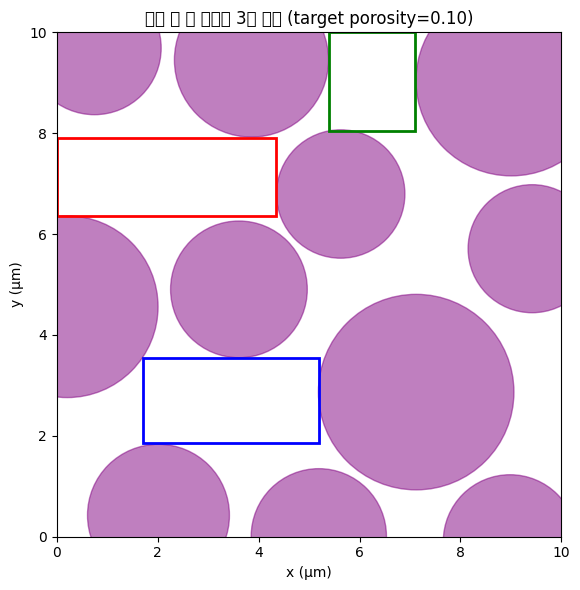

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# Ïù¥Ï†ÑÏóê Ï†ïÏùòÎêú circle_rect_area Î∞è find_largest_empty_rectangle Ìï®ÏàòÎäî Ïó¨Í∏∞Ïóê Ìè¨Ìï®ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# (ÏÇ¨Ïö©ÏûêÏùò Ïù¥Ï†Ñ ÏΩîÎìúÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.)
# ... (circle_rect_area Ìï®Ïàò Ï†ïÏùò) ...
# ... (find_largest_empty_rectangle Ìï®Ïàò Ï†ïÏùò) ...


# ---------------------------------------------------------------
# 4) Î©îÏù∏: Ïõê Î∞∞Ïπò ÌõÑ, Í≤©ÏûêÌôî ‚Üí Îπà ÏÇ¨Í∞ÅÌòï ÌÉêÏÉâ ‚Üí ÏãúÍ∞ÅÌôî (2Í∞ú Ï∂îÍ∞Ä)
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(Ïõê) Î∞∞Ïπò ÌååÎùºÎØ∏ÌÑ∞
    domain_size = 10              # ÎèÑÎ©îÏù∏: 0~10 Œºm
    target_porosity = 0.1         # Î™©Ìëú Í∏∞Í≥µÎ•† 10%
    np.random.seed(3)

    # (4-2)  Ïõê Î∞∞Ïπò Ìï®Ïàò Ìò∏Ï∂ú ‚Üí (x,y,r) Î¶¨Ïä§Ìä∏ ÏñªÍ∏∞
    # increase_radius_to_target_porosity Ìï®ÏàòÎèÑ Ïù¥Ï†Ñ ÏÖÄÏóê Ï†ïÏùòÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) ‚ÄúÍ≤©Ïûê Ìï¥ÏÉÅÎèÑ‚Äù ÏÑ§Ï†ï (Ïòà: 200√ó200 ÌîΩÏÖÄ)
    grid_size = 200
    H = W = grid_size

    # (4-4) Ïû•Ïï†Î¨º Îßµ ÏÉùÏÑ±: ÎèÑÎ©îÏù∏ ÎÇ¥ Í∞Å ÌîΩÏÖÄ(Í≤©Ïûê) Ï§ëÏã¨Ïù¥
    #       Ïõê ÏïàÏ™ΩÏóê ÏÜçÌïòÎ©¥ 1, ÏïÑÎãàÎ©¥ 0.
    # find_largest_empty_rectangle Ìï®ÏàòÍ∞Ä Ïù¥ ÎßµÏùÑ ÏàòÏ†ïÌïòÏßÄ ÏïäÎèÑÎ°ù Î≥µÏÇ¨Î≥∏ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    initial_obstacle_map = np.zeros((H, W), dtype=np.uint8)
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            for (cx, cy, cr) in lfp_positions:
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    initial_obstacle_map[i, j] = 1
                    break

    # (4-5) Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 3Í∞ú Ï∞æÍ∏∞
    found_rectangles_pix = []
    current_obstacle_map = initial_obstacle_map.copy() # Îßµ Î≥µÏÇ¨ÌïòÏó¨ ÏÇ¨Ïö©

    for k in range(3): # Í∞ÄÏû• ÌÅ∞ ÏÇ¨Í∞ÅÌòï 3Í∞ú Ï∞æÍ∏∞
        row0, col0, height_pix, width_pix = find_largest_empty_rectangle(current_obstacle_map)

        # Ï∞æÏùÄ ÏÇ¨Í∞ÅÌòïÏù¥ Ïú†Ìö®Ìïú ÌÅ¨Í∏∞Ïù∏ÏßÄ ÌôïÏù∏ (Ïòà: ÏµúÏÜå 1x1 ÌîΩÏÖÄ)
        if width_pix > 0 and height_pix > 0:
            found_rectangles_pix.append((row0, col0, height_pix, width_pix))

            # Ï∞æÏùÄ ÏÇ¨Í∞ÅÌòï ÏòÅÏó≠ÏùÑ ÏûÑÏãúÎ°ú Ïû•Ïï†Î¨ºÎ°ú ÌëúÏãúÌïòÏó¨ Îã§Ïùå ÌÉêÏÉâÏóêÏÑú Ï†úÏô∏
            # (Ïù¥ Î∂ÄÎ∂ÑÏùÑ 1Î°ú Ï±ÑÏö∞Î©¥ Îã§ÏùåÎ≤à find_largest_empty_rectangle Ìò∏Ï∂ú Ïãú Ïù¥ ÏòÅÏó≠ÏùÄ Îπà Í≥µÍ∞ÑÏúºÎ°ú Í∞ÑÏ£ºÎêòÏßÄ ÏïäÏäµÎãàÎã§)
            current_obstacle_map[row0 : row0 + height_pix, col0 : col0 + width_pix] = 1
        else:
            # Îçî Ïù¥ÏÉÅ Ïú†Ìö®Ìïú ÌÅ¨Í∏∞Ïùò Îπà ÏÇ¨Í∞ÅÌòïÏù¥ ÏóÜÏúºÎ©¥ Ï§ëÎã®
            break

    # (4-6) ÌîΩÏÖÄ Îã®ÏúÑ Í≤∞Í≥º ‚Üí Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëú(Œºm)Î°ú Î≥ÄÌôò
    found_rectangles_mu = []
    for (row0, col0, height_pix, width_pix) in found_rectangles_pix:
        x_rect = col0 * dx
        y_rect = row0 * dy
        w_rect = width_pix * dx
        h_rect = height_pix * dy
        found_rectangles_mu.append((x_rect, y_rect, w_rect, h_rect))

        print(f"Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï {len(found_rectangles_mu)} (ÌîΩÏÖÄ Í∏∞Ï§Ä):", (row0, col0, height_pix, width_pix))
        print(f"Ïã§Ï†ú Ï¢åÌëú(Œºm): x={x_rect:.2f}, y={y_rect:.2f}, width={w_rect:.2f}, height={h_rect:.2f}")


    # (4-7) ÏãúÍ∞ÅÌôî: Ïõê + Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòïÎì§
    fig, ax = plt.subplots(figsize=(6, 6))

    # ‚Ä¢ Ïõê( LFP ) Í∑∏Î¶¨Í∏∞ (Î≥¥ÎùºÏÉâ, Î∞òÌà¨Î™Ö)
    for (cx, cy, cr) in lfp_positions:
        circ = patches.Circle((cx, cy), cr, color='purple', alpha=0.5)
        ax.add_patch(circ)

    # ‚Ä¢ Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòïÎì§ Í∑∏Î¶¨Í∏∞ (Îπ®Í∞Ñ ÌÖåÎëêÎ¶¨, Î©¥ÏÉâ Ìà¨Î™Ö)
    colors = ['red', 'blue', 'green'] # Í∞Å ÏÇ¨Í∞ÅÌòïÏóê Îã§Î•∏ ÏÉâÏÉÅ Î∂ÄÏó¨ (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
    for i, (x_rect, y_rect, w_rect, h_rect) in enumerate(found_rectangles_mu):
         rect = patches.Rectangle(
            (x_rect, y_rect),
            w_rect,
            h_rect,
            linewidth=2,
            edgecolor=colors[i % len(colors)], # ÏÉâÏÉÅ ÏàúÌôò
            facecolor='none'
        )
         ax.add_patch(rect)


    # ‚Ä¢ ÎèÑÎ©îÏù∏ Ï∂ï ÏÑ§Ï†ï
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (Œºm)')
    ax.set_ylabel('y (Œºm)')
    ax.set_title(f"Í∞ÄÏû• ÌÅ∞ Îπà ÏÇ¨Í∞ÅÌòï {len(found_rectangles_mu)}Í∞ú ÌëúÏãú (target porosity={target_porosity:.2f})")

    plt.tight_layout()
    plt.show()

LFP Î∞∞Ïπò ÏúÑÏπò: (7.12, 2.87), Î∞òÏßÄÎ¶Ñ: 1.94, Í∏∞Í≥µÎ•†: 88.19%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.01, 9.04), Î∞òÏßÄÎ¶Ñ: 1.89, Í∏∞Í≥µÎ•†: 76.43%
LFP Î∞∞Ïπò ÏúÑÏπò: (2.01, 0.42), Î∞òÏßÄÎ¶Ñ: 1.41, Í∏∞Í≥µÎ•†: 69.90%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.20, 4.56), Î∞òÏßÄÎ¶Ñ: 1.80, Í∏∞Í≥µÎ•†: 59.20%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.86, 9.45), Î∞òÏßÄÎ¶Ñ: 1.53, Í∏∞Í≥µÎ•†: 51.50%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.75, 9.69), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 45.74%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.61, 4.90), Î∞òÏßÄÎ¶Ñ: 1.36, Í∏∞Í≥µÎ•†: 39.97%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.42, 5.71), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 34.65%
LFP Î∞∞Ïπò ÏúÑÏπò: (8.98, -0.09), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 28.87%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.63, 6.79), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 23.77%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.19, 0.01), Î∞òÏßÄÎ¶Ñ: 1.34, Í∏∞Í≥µÎ•†: 17.84%
Final porosity: 17.84%
Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 1 (ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(127), 0, np.int64(31), 87)
Ïã§Ï†ú Ï¢åÌëú(Œºm): x=0.33, y=6.47, width=3.70, height=1.32
Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 2 (ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(37), 34, np.int64(34), 70)
Ïã§Ï†ú Ï

<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layou

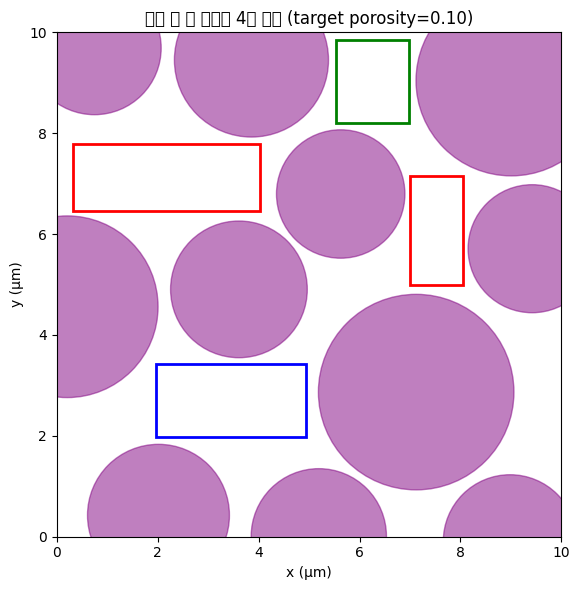

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# Ïù¥Ï†ÑÏóê Ï†ïÏùòÎêú circle_rect_area Î∞è find_largest_empty_rectangle Ìï®ÏàòÎäî Ïó¨Í∏∞Ïóê Ìè¨Ìï®ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# (ÏÇ¨Ïö©ÏûêÏùò Ïù¥Ï†Ñ ÏΩîÎìúÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.)
# ... (circle_rect_area Ìï®Ïàò Ï†ïÏùò) ...
# ... (find_largest_empty_rectangle Ìï®Ïàò Ï†ïÏùò) ...


# ---------------------------------------------------------------
# 4) Î©îÏù∏: Ïõê Î∞∞Ïπò ÌõÑ, Í≤©ÏûêÌôî ‚Üí Îπà ÏÇ¨Í∞ÅÌòï ÌÉêÏÉâ ‚Üí ÏãúÍ∞ÅÌôî (2Í∞ú Ï∂îÍ∞Ä)
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(Ïõê) Î∞∞Ïπò ÌååÎùºÎØ∏ÌÑ∞
    domain_size = 10              # ÎèÑÎ©îÏù∏: 0~10 Œºm
    target_porosity = 0.1         # Î™©Ìëú Í∏∞Í≥µÎ•† 10%
    np.random.seed(3)

    # (4-2)  Ïõê Î∞∞Ïπò Ìï®Ïàò Ìò∏Ï∂ú ‚Üí (x,y,r) Î¶¨Ïä§Ìä∏ ÏñªÍ∏∞
    # increase_radius_to_target_porosity Ìï®ÏàòÎèÑ Ïù¥Ï†Ñ ÏÖÄÏóê Ï†ïÏùòÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) ‚ÄúÍ≤©Ïûê Ìï¥ÏÉÅÎèÑ‚Äù ÏÑ§Ï†ï (Ïòà: 200√ó200 ÌîΩÏÖÄ)
    grid_size = 200
    H = W = grid_size

    # (4-4) Ïû•Ïï†Î¨º Îßµ ÏÉùÏÑ±: ÎèÑÎ©îÏù∏ ÎÇ¥ Í∞Å ÌîΩÏÖÄ(Í≤©Ïûê) Ï§ëÏã¨Ïù¥
    #       Ïõê ÏïàÏ™ΩÏóê ÏÜçÌïòÎ©¥ 1, ÏïÑÎãàÎ©¥ 0.
    # find_largest_empty_rectangle Ìï®ÏàòÍ∞Ä Ïù¥ ÎßµÏùÑ ÏàòÏ†ïÌïòÏßÄ ÏïäÎèÑÎ°ù Î≥µÏÇ¨Î≥∏ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    initial_obstacle_map = np.zeros((H, W), dtype=np.uint8)
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            for (cx, cy, cr) in lfp_positions:
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    initial_obstacle_map[i, j] = 1
                    break

    # (4-5) Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 3Í∞ú Ï∞æÍ∏∞
    found_rectangles_pix = []
    current_obstacle_map = initial_obstacle_map.copy() # Îßµ Î≥µÏÇ¨ÌïòÏó¨ ÏÇ¨Ïö©

    for k in range(4): # Í∞ÄÏû• ÌÅ∞ ÏÇ¨Í∞ÅÌòï 3Í∞ú Ï∞æÍ∏∞
        row0, col0, height_pix, width_pix = find_largest_empty_rectangle(current_obstacle_map)

        # Ï∞æÏùÄ ÏÇ¨Í∞ÅÌòïÏù¥ Ïú†Ìö®Ìïú ÌÅ¨Í∏∞Ïù∏ÏßÄ ÌôïÏù∏ (Ïòà: ÏµúÏÜå 1x1 ÌîΩÏÖÄ)
        if width_pix > 0 and height_pix > 0:
            found_rectangles_pix.append((row0, col0, height_pix, width_pix))

            # Ï∞æÏùÄ ÏÇ¨Í∞ÅÌòï ÏòÅÏó≠ÏùÑ ÏûÑÏãúÎ°ú Ïû•Ïï†Î¨ºÎ°ú ÌëúÏãúÌïòÏó¨ Îã§Ïùå ÌÉêÏÉâÏóêÏÑú Ï†úÏô∏
            # (Ïù¥ Î∂ÄÎ∂ÑÏùÑ 1Î°ú Ï±ÑÏö∞Î©¥ Îã§ÏùåÎ≤à find_largest_empty_rectangle Ìò∏Ï∂ú Ïãú Ïù¥ ÏòÅÏó≠ÏùÄ Îπà Í≥µÍ∞ÑÏúºÎ°ú Í∞ÑÏ£ºÎêòÏßÄ ÏïäÏäµÎãàÎã§)
            current_obstacle_map[row0 : row0 + height_pix, col0 : col0 + width_pix] = 1
        else:
            # Îçî Ïù¥ÏÉÅ Ïú†Ìö®Ìïú ÌÅ¨Í∏∞Ïùò Îπà ÏÇ¨Í∞ÅÌòïÏù¥ ÏóÜÏúºÎ©¥ Ï§ëÎã®
            break

    # (4-6) ÌîΩÏÖÄ Îã®ÏúÑ Í≤∞Í≥º ‚Üí Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëú(Œºm)Î°ú Î≥ÄÌôò Î∞è ÌÅ¨Í∏∞ Ï°∞Ï†à
    found_rectangles_mu = []
    size_reduction_factor = 0.85 # Ïòà: ÎÑàÎπÑ/ÎÜíÏù¥Î•º 5% Ï§ÑÏûÑ

    for (row0, col0, height_pix, width_pix) in found_rectangles_pix:
        # ÏõêÎûò ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
        w_rect_orig = width_pix * dx
        h_rect_orig = height_pix * dy

        # Ï§ÑÏñ¥Îì† ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
        w_rect_reduced = w_rect_orig * size_reduction_factor
        h_rect_reduced = h_rect_orig * size_reduction_factor

        # ÌÅ¨Í∏∞ Ï§ÑÏñ¥Îì† ÎßåÌÅº ÏãúÏûë ÏúÑÏπò Ï°∞Ï†ï (Í∞ÄÏö¥Îç∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï§ÑÏñ¥Îì§ÎèÑÎ°ù)
        x_rect = col0 * dx + (w_rect_orig - w_rect_reduced) / 2.0
        y_rect = row0 * dy + (h_rect_orig - h_rect_reduced) / 2.0

        found_rectangles_mu.append((x_rect, y_rect, w_rect_reduced, h_rect_reduced))

        print(f"Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï {len(found_rectangles_mu)} (ÌîΩÏÖÄ Í∏∞Ï§Ä):", (row0, col0, height_pix, width_pix))
        print(f"Ïã§Ï†ú Ï¢åÌëú(Œºm): x={x_rect:.2f}, y={y_rect:.2f}, width={w_rect_reduced:.2f}, height={h_rect_reduced:.2f}")


    # (4-7) ÏãúÍ∞ÅÌôî: Ïõê + Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòïÎì§
    fig, ax = plt.subplots(figsize=(6, 6))

    # ‚Ä¢ Ïõê( LFP ) Í∑∏Î¶¨Í∏∞ (Î≥¥ÎùºÏÉâ, Î∞òÌà¨Î™Ö)
    for (cx, cy, cr) in lfp_positions:
        circ = patches.Circle((cx, cy), cr, color='purple', alpha=0.5)
        ax.add_patch(circ)

    # ‚Ä¢ Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòïÎì§ Í∑∏Î¶¨Í∏∞ (Îπ®Í∞Ñ ÌÖåÎëêÎ¶¨, Î©¥ÏÉâ Ìà¨Î™Ö)
    colors = ['red', 'blue', 'green'] # Í∞Å ÏÇ¨Í∞ÅÌòïÏóê Îã§Î•∏ ÏÉâÏÉÅ Î∂ÄÏó¨ (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
    for i, (x_rect, y_rect, w_rect, h_rect) in enumerate(found_rectangles_mu):
         rect = patches.Rectangle(
            (x_rect, y_rect),
            w_rect,
            h_rect,
            linewidth=2,
            edgecolor=colors[i % len(colors)], # ÏÉâÏÉÅ ÏàúÌôò
            facecolor='none'
        )
         ax.add_patch(rect)


    # ‚Ä¢ ÎèÑÎ©îÏù∏ Ï∂ï ÏÑ§Ï†ï
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (Œºm)')
    ax.set_ylabel('y (Œºm)')
    ax.set_title(f"Í∞ÄÏû• ÌÅ∞ Îπà ÏÇ¨Í∞ÅÌòï {len(found_rectangles_mu)}Í∞ú ÌëúÏãú (target porosity={target_porosity:.2f})")

    plt.tight_layout()
    plt.show()

LFP Î∞∞Ïπò ÏúÑÏπò: (7.12, 2.87), Î∞òÏßÄÎ¶Ñ: 1.94, Í∏∞Í≥µÎ•†: 88.19%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.01, 9.04), Î∞òÏßÄÎ¶Ñ: 1.89, Í∏∞Í≥µÎ•†: 76.43%
LFP Î∞∞Ïπò ÏúÑÏπò: (2.01, 0.42), Î∞òÏßÄÎ¶Ñ: 1.41, Í∏∞Í≥µÎ•†: 69.90%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.20, 4.56), Î∞òÏßÄÎ¶Ñ: 1.80, Í∏∞Í≥µÎ•†: 59.20%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.86, 9.45), Î∞òÏßÄÎ¶Ñ: 1.53, Í∏∞Í≥µÎ•†: 51.50%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.75, 9.69), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 45.74%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.61, 4.90), Î∞òÏßÄÎ¶Ñ: 1.36, Í∏∞Í≥µÎ•†: 39.97%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.42, 5.71), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 34.65%
LFP Î∞∞Ïπò ÏúÑÏπò: (8.98, -0.09), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 28.87%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.63, 6.79), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 23.77%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.19, 0.01), Î∞òÏßÄÎ¶Ñ: 1.34, Í∏∞Í≥µÎ•†: 17.84%
Final porosity: 17.84%
Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 1 (ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(127), 0, np.int64(31), 87)
Ïã§Ï†ú Ï¢åÌëú(Œºm): x=0.33, y=6.47, width=3.70, height=1.32, angle=-3.00ÎèÑ
Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 2 (ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(37), 34, np.int64(3

<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layou

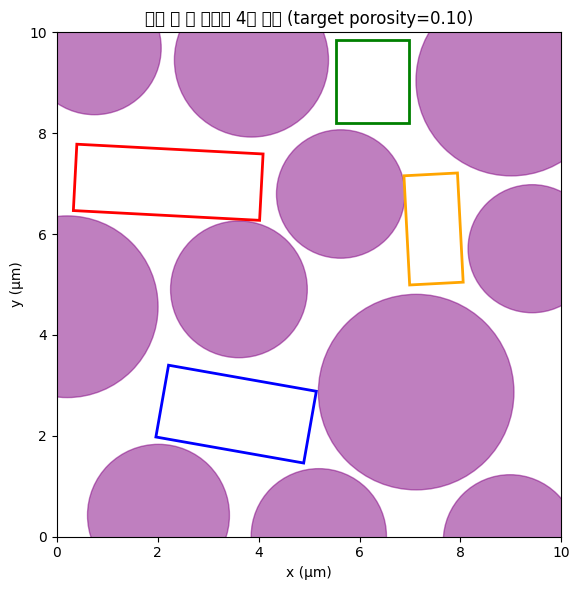

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# Ïù¥Ï†ÑÏóê Ï†ïÏùòÎêú circle_rect_area Î∞è find_largest_empty_rectangle Ìï®ÏàòÎäî Ïó¨Í∏∞Ïóê Ìè¨Ìï®ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# (ÏÇ¨Ïö©ÏûêÏùò Ïù¥Ï†Ñ ÏΩîÎìúÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.)
# ... (circle_rect_area Ìï®Ïàò Ï†ïÏùò) ...
# ... (find_largest_empty_rectangle Ìï®Ïàò Ï†ïÏùò) ...


# ---------------------------------------------------------------
# 4) Î©îÏù∏: Ïõê Î∞∞Ïπò ÌõÑ, Í≤©ÏûêÌôî ‚Üí Îπà ÏÇ¨Í∞ÅÌòï ÌÉêÏÉâ ‚Üí ÏãúÍ∞ÅÌôî (2Í∞ú Ï∂îÍ∞Ä)
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(Ïõê) Î∞∞Ïπò ÌååÎùºÎØ∏ÌÑ∞
    domain_size = 10              # ÎèÑÎ©îÏù∏: 0~10 Œºm
    target_porosity = 0.1         # Î™©Ìëú Í∏∞Í≥µÎ•† 10%
    np.random.seed(3)

    # (4-2)  Ïõê Î∞∞Ïπò Ìï®Ïàò Ìò∏Ï∂ú ‚Üí (x,y,r) Î¶¨Ïä§Ìä∏ ÏñªÍ∏∞
    # increase_radius_to_target_porosity Ìï®ÏàòÎèÑ Ïù¥Ï†Ñ ÏÖÄÏóê Ï†ïÏùòÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) ‚ÄúÍ≤©Ïûê Ìï¥ÏÉÅÎèÑ‚Äù ÏÑ§Ï†ï (Ïòà: 200√ó200 ÌîΩÏÖÄ)
    grid_size = 200
    H = W = grid_size

    # (4-4) Ïû•Ïï†Î¨º Îßµ ÏÉùÏÑ±: ÎèÑÎ©îÏù∏ ÎÇ¥ Í∞Å ÌîΩÏÖÄ(Í≤©Ïûê) Ï§ëÏã¨Ïù¥
    #       Ïõê ÏïàÏ™ΩÏóê ÏÜçÌïòÎ©¥ 1, ÏïÑÎãàÎ©¥ 0.
    # find_largest_empty_rectangle Ìï®ÏàòÍ∞Ä Ïù¥ ÎßµÏùÑ ÏàòÏ†ïÌïòÏßÄ ÏïäÎèÑÎ°ù Î≥µÏÇ¨Î≥∏ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    initial_obstacle_map = np.zeros((H, W), dtype=np.uint8)
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            for (cx, cy, cr) in lfp_positions:
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    initial_obstacle_map[i, j] = 1
                    break

    # (4-5) Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 3Í∞ú Ï∞æÍ∏∞
    found_rectangles_pix = []
    current_obstacle_map = initial_obstacle_map.copy() # Îßµ Î≥µÏÇ¨ÌïòÏó¨ ÏÇ¨Ïö©

    # 4Í∞úÍπåÏßÄ Ï∞æÎèÑÎ°ù ÏàòÏ†ï (Ï≤´ Î≤àÏß∏, Îëê Î≤àÏß∏, ÏÑ∏ Î≤àÏß∏ Îπà Í≥µÍ∞Ñ ÌôïÎ≥¥Î•º ÏúÑÌï¥)
    for k in range(4):
        row0, col0, height_pix, width_pix = find_largest_empty_rectangle(current_obstacle_map)

        # Ï∞æÏùÄ ÏÇ¨Í∞ÅÌòïÏù¥ Ïú†Ìö®Ìïú ÌÅ¨Í∏∞Ïù∏ÏßÄ ÌôïÏù∏ (Ïòà: ÏµúÏÜå 1x1 ÌîΩÏÖÄ)
        if width_pix > 0 and height_pix > 0:
            found_rectangles_pix.append((row0, col0, height_pix, width_pix))

            # Ï∞æÏùÄ ÏÇ¨Í∞ÅÌòï ÏòÅÏó≠ÏùÑ ÏûÑÏãúÎ°ú Ïû•Ïï†Î¨ºÎ°ú ÌëúÏãúÌïòÏó¨ Îã§Ïùå ÌÉêÏÉâÏóêÏÑú Ï†úÏô∏
            current_obstacle_map[row0 : row0 + height_pix, col0 : col0 + width_pix] = 1
        else:
            # Îçî Ïù¥ÏÉÅ Ïú†Ìö®Ìïú ÌÅ¨Í∏∞Ïùò Îπà ÏÇ¨Í∞ÅÌòïÏù¥ ÏóÜÏúºÎ©¥ Ï§ëÎã®
            break

    # (4-6) ÌîΩÏÖÄ Îã®ÏúÑ Í≤∞Í≥º ‚Üí Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëú(Œºm)Î°ú Î≥ÄÌôò Î∞è ÌÅ¨Í∏∞ Ï°∞Ï†à, ÌöåÏ†Ñ Í∞ÅÎèÑ Ìï†Îãπ
    found_rectangles_mu = []
    size_reduction_factor = 0.85 # Ïòà: ÎÑàÎπÑ/ÎÜíÏù¥Î•º 5% Ï§ÑÏûÑ

    # Í∞Å ÏÇ¨Í∞ÅÌòïÏóê Ï†ÅÏö©Ìï† ÌöåÏ†Ñ Í∞ÅÎèÑ Î¶¨Ïä§Ìä∏ (Ï∞æÎäî ÏÇ¨Í∞ÅÌòï Í∞úÏàòÏôÄ ÎßûÍ≤å ÏÑ§Ï†ï)
    # ÏòàÏãú: Ï≤´ Î≤àÏß∏ ÏÇ¨Í∞ÅÌòïÏùÄ 5ÎèÑ, Îëê Î≤àÏß∏Îäî 10ÎèÑ, ÏÑ∏ Î≤àÏß∏Îäî 0ÎèÑ, ÎÑ§ Î≤àÏß∏Îäî -5ÎèÑ ÌöåÏ†Ñ
    rotation_angles_deg = [-3, -10, 0, 3]

    for i, (row0, col0, height_pix, width_pix) in enumerate(found_rectangles_pix):
        # ÏõêÎûò ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
        w_rect_orig = width_pix * dx
        h_rect_orig = height_pix * dy

        # Ï§ÑÏñ¥Îì† ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
        w_rect_reduced = w_rect_orig * size_reduction_factor
        h_rect_reduced = h_rect_orig * size_reduction_factor

        # ÌÅ¨Í∏∞ Ï§ÑÏñ¥Îì† ÎßåÌÅº ÏãúÏûë ÏúÑÏπò Ï°∞Ï†ï (Í∞ÄÏö¥Îç∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï§ÑÏñ¥Îì§ÎèÑÎ°ù)
        x_rect = col0 * dx + (w_rect_orig - w_rect_reduced) / 2.0
        y_rect = row0 * dy + (h_rect_orig - h_rect_reduced) / 2.0

        # ÌòÑÏû¨ ÏÇ¨Í∞ÅÌòïÏóê Ï†ÅÏö©Ìï† ÌöåÏ†Ñ Í∞ÅÎèÑ Í∞ÄÏ†∏Ïò§Í∏∞ (Î¶¨Ïä§Ìä∏ Í∏∏Ïù¥ Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨)
        angle_to_apply = rotation_angles_deg[i % len(rotation_angles_deg)]


        found_rectangles_mu.append((x_rect, y_rect, w_rect_reduced, h_rect_reduced, angle_to_apply))

        print(f"Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï {len(found_rectangles_mu)} (ÌîΩÏÖÄ Í∏∞Ï§Ä):", (row0, col0, height_pix, width_pix))
        print(f"Ïã§Ï†ú Ï¢åÌëú(Œºm): x={x_rect:.2f}, y={y_rect:.2f}, width={w_rect_reduced:.2f}, height={h_rect_reduced:.2f}, angle={angle_to_apply:.2f}ÎèÑ")


    # (4-7) ÏãúÍ∞ÅÌôî: Ïõê + Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòïÎì§ (ÌöåÏ†Ñ Ï†ÅÏö©)
    fig, ax = plt.subplots(figsize=(6, 6))

    # ‚Ä¢ Ïõê( LFP ) Í∑∏Î¶¨Í∏∞ (Î≥¥ÎùºÏÉâ, Î∞òÌà¨Î™Ö)
    for (cx, cy, cr) in lfp_positions:
        circ = patches.Circle((cx, cy), cr, color='purple', alpha=0.5)
        ax.add_patch(circ)

    # ‚Ä¢ Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòïÎì§ Í∑∏Î¶¨Í∏∞ (Îπ®Í∞Ñ ÌÖåÎëêÎ¶¨, Î©¥ÏÉâ Ìà¨Î™Ö)
    colors = ['red', 'blue', 'green', 'orange'] # Í∞Å ÏÇ¨Í∞ÅÌòïÏóê Îã§Î•∏ ÏÉâÏÉÅ Î∂ÄÏó¨ (Ï∞æÎäî ÏÇ¨Í∞ÅÌòï Í∞úÏàòÏôÄ ÎßûÍ≤å)

    # found_rectangles_mu Î¶¨Ïä§Ìä∏Ïóê ÌöåÏ†Ñ Í∞ÅÎèÑ Ï†ïÎ≥¥Í∞Ä Ï∂îÍ∞ÄÎêòÏóàÏúºÎØÄÎ°ú Íµ¨Ï°∞ Î≥ÄÍ≤Ω
    for i, (x_rect, y_rect, w_rect, h_rect, angle_to_apply) in enumerate(found_rectangles_mu):
         rect = patches.Rectangle(
            (x_rect, y_rect),
            w_rect,
            h_rect,
            linewidth=2,
            edgecolor=colors[i % len(colors)], # ÏÉâÏÉÅ ÏàúÌôò
            facecolor='none',
            angle=angle_to_apply # Í∞úÎ≥Ñ ÌöåÏ†Ñ Í∞ÅÎèÑ Ï†ÅÏö©
        )
         ax.add_patch(rect)


    # ‚Ä¢ ÎèÑÎ©îÏù∏ Ï∂ï ÏÑ§Ï†ï
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (Œºm)')
    ax.set_ylabel('y (Œºm)')
    ax.set_title(f"Í∞ÄÏû• ÌÅ∞ Îπà ÏÇ¨Í∞ÅÌòï {len(found_rectangles_mu)}Í∞ú ÌëúÏãú (target porosity={target_porosity:.2f})")

    plt.tight_layout()
    plt.show()

LFP Î∞∞Ïπò ÏúÑÏπò: (7.12, 2.87), Î∞òÏßÄÎ¶Ñ: 1.94, Í∏∞Í≥µÎ•†: 88.19%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.01, 9.04), Î∞òÏßÄÎ¶Ñ: 1.89, Í∏∞Í≥µÎ•†: 76.43%
LFP Î∞∞Ïπò ÏúÑÏπò: (2.01, 0.42), Î∞òÏßÄÎ¶Ñ: 1.41, Í∏∞Í≥µÎ•†: 69.90%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.20, 4.56), Î∞òÏßÄÎ¶Ñ: 1.80, Í∏∞Í≥µÎ•†: 59.20%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.86, 9.45), Î∞òÏßÄÎ¶Ñ: 1.53, Í∏∞Í≥µÎ•†: 51.50%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.75, 9.69), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 45.74%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.61, 4.90), Î∞òÏßÄÎ¶Ñ: 1.36, Í∏∞Í≥µÎ•†: 39.97%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.42, 5.71), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 34.65%
LFP Î∞∞Ïπò ÏúÑÏπò: (8.98, -0.09), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 28.87%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.63, 6.79), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 23.77%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.19, 0.01), Î∞òÏßÄÎ¶Ñ: 1.34, Í∏∞Í≥µÎ•†: 17.84%
Final porosity: 17.84%
Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 1 (ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(127), 0, np.int64(31), 87)
Ïã§Ï†ú Ï¢åÌëú(Œºm): x=0.11, y=6.39, width=4.13, height=1.47, angle=-3.00ÎèÑ
Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 2 (ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(37), 34, np.int64(3

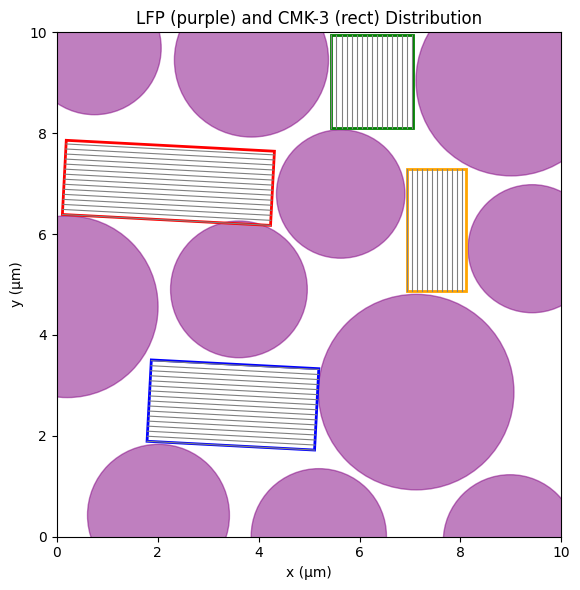

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi, cos, sin, radians

# Ïù¥Ï†ÑÏóê Ï†ïÏùòÎêú circle_rect_area Î∞è find_largest_empty_rectangle Ìï®ÏàòÎäî Ïó¨Í∏∞Ïóê Ìè¨Ìï®ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# (ÏÇ¨Ïö©ÏûêÏùò Ïù¥Ï†Ñ ÏΩîÎìúÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.)
# ... (circle_rect_area Ìï®Ïàò Ï†ïÏùò) ...
# ... (find_largest_empty_rectangle Ìï®Ïàò Ï†ïÏùò) ...


# ---------------------------------------------------------------
# 4) Î©îÏù∏: Ïõê Î∞∞Ïπò ÌõÑ, Í≤©ÏûêÌôî ‚Üí Îπà ÏÇ¨Í∞ÅÌòï ÌÉêÏÉâ ‚Üí ÏãúÍ∞ÅÌôî (2Í∞ú Ï∂îÍ∞Ä)
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(Ïõê) Î∞∞Ïπò ÌååÎùºÎØ∏ÌÑ∞
    domain_size = 10              # ÎèÑÎ©îÏù∏: 0~10 Œºm
    target_porosity = 0.1         # Î™©Ìëú Í∏∞Í≥µÎ•† 10%
    np.random.seed(3)

    # (4-2)  Ïõê Î∞∞Ïπò Ìï®Ïàò Ìò∏Ï∂ú ‚Üí (x,y,r) Î¶¨Ïä§Ìä∏ ÏñªÍ∏∞
    # increase_radius_to_target_porosity Ìï®ÏàòÎèÑ Ïù¥Ï†Ñ ÏÖÄÏóê Ï†ïÏùòÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) ‚ÄúÍ≤©Ïûê Ìï¥ÏÉÅÎèÑ‚Äù ÏÑ§Ï†ï (Ïòà: 200√ó200 ÌîΩÏÖÄ)
    grid_size = 200
    H = W = grid_size

    # (4-4) Ïû•Ïï†Î¨º Îßµ ÏÉùÏÑ±: ÎèÑÎ©îÏù∏ ÎÇ¥ Í∞Å ÌîΩÏÖÄ(Í≤©Ïûê) Ï§ëÏã¨Ïù¥
    #       Ïõê ÏïàÏ™ΩÏóê ÏÜçÌïòÎ©¥ 1, ÏïÑÎãàÎ©¥ 0.
    # find_largest_empty_rectangle Ìï®ÏàòÍ∞Ä Ïù¥ ÎßµÏùÑ ÏàòÏ†ïÌïòÏßÄ ÏïäÎèÑÎ°ù Î≥µÏÇ¨Î≥∏ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    initial_obstacle_map = np.zeros((H, W), dtype=np.uint8)
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            for (cx, cy, cr) in lfp_positions:
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    initial_obstacle_map[i, j] = 1
                    break

    # (4-5) Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 3Í∞ú Ï∞æÍ∏∞
    found_rectangles_pix = []
    current_obstacle_map = initial_obstacle_map.copy() # Îßµ Î≥µÏÇ¨ÌïòÏó¨ ÏÇ¨Ïö©

    # 4Í∞úÍπåÏßÄ Ï∞æÎèÑÎ°ù ÏàòÏ†ï (Ï≤´ Î≤àÏß∏, Îëê Î≤àÏß∏, ÏÑ∏ Î≤àÏß∏ Îπà Í≥µÍ∞Ñ ÌôïÎ≥¥Î•º ÏúÑÌï¥)
    for k in range(4):
        row0, col0, height_pix, width_pix = find_largest_empty_rectangle(current_obstacle_map)

        # Ï∞æÏùÄ ÏÇ¨Í∞ÅÌòïÏù¥ Ïú†Ìö®Ìïú ÌÅ¨Í∏∞Ïù∏ÏßÄ ÌôïÏù∏ (Ïòà: ÏµúÏÜå 1x1 ÌîΩÏÖÄ)
        if width_pix > 0 and height_pix > 0:
            found_rectangles_pix.append((row0, col0, height_pix, width_pix))

            # Ï∞æÏùÄ ÏÇ¨Í∞ÅÌòï ÏòÅÏó≠ÏùÑ ÏûÑÏãúÎ°ú Ïû•Ïï†Î¨ºÎ°ú ÌëúÏãúÌïòÏó¨ Îã§Ïùå ÌÉêÏÉâÏóêÏÑú Ï†úÏô∏
            current_obstacle_map[row0 : row0 + height_pix, col0 : col0 + width_pix] = 1
        else:
            # Îçî Ïù¥ÏÉÅ Ïú†Ìö®Ìïú ÌÅ¨Í∏∞Ïùò Îπà ÏÇ¨Í∞ÅÌòïÏù¥ ÏóÜÏúºÎ©¥ Ï§ëÎã®
            break

    # (4-6) ÌîΩÏÖÄ Îã®ÏúÑ Í≤∞Í≥º ‚Üí Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëú(Œºm)Î°ú Î≥ÄÌôò Î∞è ÌÅ¨Í∏∞ Ï°∞Ï†à, ÌöåÏ†Ñ Í∞ÅÎèÑ Ìï†Îãπ
    found_rectangles_mu = []
    size_reduction_factor = 0.95 # Ïòà: ÎÑàÎπÑ/ÎÜíÏù¥Î•º 15% Ï§ÑÏûÑ (Ïù¥Ï†Ñ ÏöîÏ≤≠Í∞í Ï†ÅÏö©)

    # Í∞Å ÏÇ¨Í∞ÅÌòïÏóê Ï†ÅÏö©Ìï† ÌöåÏ†Ñ Í∞ÅÎèÑ Î¶¨Ïä§Ìä∏ (Ïù¥Ï†Ñ ÏöîÏ≤≠Í∞í Ï†ÅÏö©)
    # ÏòàÏãú: Ï≤´ Î≤àÏß∏ ÏÇ¨Í∞ÅÌòïÏùÄ -3ÎèÑ, Îëê Î≤àÏß∏Îäî -10ÎèÑ, ÏÑ∏ Î≤àÏß∏Îäî 0ÎèÑ, ÎÑ§ Î≤àÏß∏Îäî 3ÎèÑ ÌöåÏ†Ñ
    rotation_angles_deg = [-3, -3, 0, 0]

    for i, (row0, col0, height_pix, width_pix) in enumerate(found_rectangles_pix):
        # ÏõêÎûò ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
        w_rect_orig = width_pix * dx
        h_rect_orig = height_pix * dy

        # Ï§ÑÏñ¥Îì† ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
        w_rect_reduced = w_rect_orig * size_reduction_factor
        h_rect_reduced = h_rect_orig * size_reduction_factor

        # ÌÅ¨Í∏∞ Ï§ÑÏñ¥Îì† ÎßåÌÅº ÏãúÏûë ÏúÑÏπò Ï°∞Ï†ï (Í∞ÄÏö¥Îç∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï§ÑÏñ¥Îì§ÎèÑÎ°ù)
        x_rect_bottom_left = col0 * dx + (w_rect_orig - w_rect_reduced) / 2.0
        y_rect_bottom_left = row0 * dy + (h_rect_orig - h_rect_reduced) / 2.0

        # ÌòÑÏû¨ ÏÇ¨Í∞ÅÌòïÏóê Ï†ÅÏö©Ìï† ÌöåÏ†Ñ Í∞ÅÎèÑ Í∞ÄÏ†∏Ïò§Í∏∞ (Î¶¨Ïä§Ìä∏ Í∏∏Ïù¥ Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨)
        angle_to_apply_deg = rotation_angles_deg[i % len(rotation_angles_deg)]

        found_rectangles_mu.append((x_rect_bottom_left, y_rect_bottom_left, w_rect_reduced, h_rect_reduced, angle_to_apply_deg))

        print(f"Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï {len(found_rectangles_mu)} (ÌîΩÏÖÄ Í∏∞Ï§Ä):", (row0, col0, height_pix, width_pix))
        print(f"Ïã§Ï†ú Ï¢åÌëú(Œºm): x={x_rect_bottom_left:.2f}, y={y_rect_bottom_left:.2f}, width={w_rect_reduced:.2f}, height={h_rect_reduced:.2f}, angle={angle_to_apply_deg:.2f}ÎèÑ")


    # (4-7) ÏãúÍ∞ÅÌôî: Ïõê + Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòïÎì§ (ÌöåÏ†Ñ Ï†ÅÏö©) + ÎÇ¥Î∂Ä ÏÑ†Î∂Ñ
    fig, ax = plt.subplots(figsize=(6, 6))

    # ‚Ä¢ Ïõê( LFP ) Í∑∏Î¶¨Í∏∞ (Î≥¥ÎùºÏÉâ, Î∞òÌà¨Î™Ö)
    for (cx, cy, cr) in lfp_positions:
        circ = patches.Circle((cx, cy), cr, color='purple', alpha=0.5)
        ax.add_patch(circ)

    # ‚Ä¢ Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòïÎì§ Í∑∏Î¶¨Í∏∞ (ÌÖåÎëêÎ¶¨) Î∞è ÎÇ¥Î∂Ä ÏÑ†Î∂Ñ Í∑∏Î¶¨Í∏∞
    colors = ['red', 'blue', 'green', 'orange'] # Í∞Å ÏÇ¨Í∞ÅÌòïÏóê Îã§Î•∏ ÏÉâÏÉÅ Î∂ÄÏó¨
    line_color = 'gray' # ÏÑ†Î∂Ñ ÏÉâÏÉÅ
    line_linewidth = 0.8 # ÏÑ†Î∂Ñ ÎëêÍªò
    line_spacing = 0.1 # ÏÑ†Î∂Ñ Í∞Ñ Í∞ÑÍ≤© (Œºm Îã®ÏúÑ)

    # found_rectangles_mu Î¶¨Ïä§Ìä∏Ïóê ÌöåÏ†Ñ Í∞ÅÎèÑ Ï†ïÎ≥¥Í∞Ä Ï∂îÍ∞ÄÎêòÏóàÏúºÎØÄÎ°ú Íµ¨Ï°∞ Î≥ÄÍ≤Ω
    for i, (x_rect_bl, y_rect_bl, w_rect, h_rect, angle_to_apply_deg) in enumerate(found_rectangles_mu):

        # 1. ÏßÅÏÇ¨Í∞ÅÌòï ÌÖåÎëêÎ¶¨ Í∑∏Î¶¨Í∏∞
        rect = patches.Rectangle(
            (x_rect_bl, y_rect_bl),
            w_rect,
            h_rect,
            linewidth=2,
            edgecolor=colors[i % len(colors)], # ÏÉâÏÉÅ ÏàúÌôò
            facecolor='none',
            angle=angle_to_apply_deg
        )
        ax.add_patch(rect)

        # 2. ÏßÅÏÇ¨Í∞ÅÌòï ÎÇ¥Î∂Ä ÏÑ†Î∂Ñ Í∑∏Î¶¨Í∏∞
        # ÌöåÏ†Ñ Í∞ÅÎèÑÎ•º ÎùºÎîîÏïàÏúºÎ°ú Î≥ÄÌôò
        angle_rad = radians(angle_to_apply_deg)

        # ÏßÅÏÇ¨Í∞ÅÌòïÏùò Í∏¥ Î≥ÄÍ≥º ÏßßÏùÄ Î≥Ä ÌåêÎã®
        if w_rect >= h_rect:
            # ÎÑàÎπÑÍ∞Ä Îçî Í∏∏Í±∞ÎÇò Í∞ôÏúºÎ©¥, ÎÜíÏù¥ Î∞©Ìñ•ÏúºÎ°ú ÏÑ†Î∂Ñ Î∞∞Ïπò
            longer_side_len = w_rect
            shorter_side_len = h_rect
            # ÏÑ†Î∂ÑÏùÄ Í∏¥ Î≥Ä(ÎÑàÎπÑ)Ïóê ÌèâÌñâÌïòÍ≤å Í∑∏Î†§Ïßê
            # ÏãúÏûëÏ†ê Í∏∞Ï§Ä: ÏßßÏùÄ Î≥Ä(ÎÜíÏù¥)Ïùò 0Î∂ÄÌÑ∞ ÎÅùÍπåÏßÄ ÏÑ†Î∂Ñ Î∞∞Ïπò
            num_lines = int(shorter_side_len / line_spacing)
            # ÏÑ†Î∂Ñ ÏãúÏûëÏ†êÍ≥º ÎÅùÏ†ê Í≥ÑÏÇ∞
            for k in range(num_lines + 1):
                # ÏßßÏùÄ Î≥Ä Î∞©Ìñ•ÏúºÎ°ú Ïù¥ÎèôÌï† Í±∞Î¶¨
                dist_along_shorter = k * line_spacing
                if k * line_spacing > shorter_side_len: # ÎßàÏßÄÎßâ ÏÑ†Î∂ÑÏù¥ ÎÑàÎ¨¥ Í∏∏Î©¥ Ï°∞Ï†à
                    dist_along_shorter = shorter_side_len

                # ÏÑ†Î∂ÑÏùò ÏãúÏûëÏ†ê (ÏßßÏùÄ Î≥ÄÏùò ÌïúÏ™Ω ÎÅùÏóêÏÑú dist_along_shorter ÎßåÌÅº Ïù¥ÎèôÌïú Ï†ê)
                # ÌöåÏ†Ñ Î≥ÄÌôò Ï†ÅÏö©: (x', y') = (x*cos - y*sin, x*sin + y*cos)
                # ÏÇ¨Í∞ÅÌòï ÏôºÏ™Ω ÏïÑÎûò Íº≠ÏßìÏ†ê (x_rect_bl, y_rect_bl)ÏùÑ ÏõêÏ†êÏúºÎ°ú ÏÉùÍ∞Å
                start_x_local = 0
                start_y_local = dist_along_shorter
                # ÌöåÏ†ÑÎêú Î°úÏª¨ ÏãúÏûëÏ†ê
                rotated_start_x_local = start_x_local * cos(angle_rad) - start_y_local * sin(angle_rad)
                rotated_start_y_local = start_x_local * sin(angle_rad) + start_y_local * cos(angle_rad)
                # Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëúÏóêÏÑúÏùò ÏãúÏûëÏ†ê
                start_x = x_rect_bl + rotated_start_x_local
                start_y = y_rect_bl + rotated_start_y_local

                # ÏÑ†Î∂ÑÏùò ÎÅùÏ†ê (ÏãúÏûëÏ†êÏóêÏÑú Í∏¥ Î≥Ä(ÎÑàÎπÑ) Í∏∏Ïù¥ÎßåÌÅº Ïù¥ÎèôÌïú Ï†ê)
                end_x_local = longer_side_len
                end_y_local = dist_along_shorter # ÏßßÏùÄ Î≥Ä Î∞©Ìñ• Ïù¥Îèô Í±∞Î¶¨Îäî ÎèôÏùº
                 # ÌöåÏ†ÑÎêú Î°úÏª¨ ÎÅùÏ†ê
                rotated_end_x_local = end_x_local * cos(angle_rad) - end_y_local * sin(angle_rad)
                rotated_end_y_local = end_x_local * sin(angle_rad) + end_y_local * cos(angle_rad)
                # Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëúÏóêÏÑúÏùò ÎÅùÏ†ê
                end_x = x_rect_bl + rotated_end_x_local
                end_y = y_rect_bl + rotated_end_y_local

                # ÏÑ†Î∂Ñ Í∑∏Î¶¨Í∏∞
                ax.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=line_linewidth)


        else:
            # ÎÜíÏù¥Í∞Ä Îçî Í∏∏Î©¥, ÎÑàÎπÑ Î∞©Ìñ•ÏúºÎ°ú ÏÑ†Î∂Ñ Î∞∞Ïπò
            longer_side_len = h_rect
            shorter_side_len = w_rect
            # ÏÑ†Î∂ÑÏùÄ Í∏¥ Î≥Ä(ÎÜíÏù¥)Ïóê ÌèâÌñâÌïòÍ≤å Í∑∏Î†§Ïßê
            # ÏãúÏûëÏ†ê Í∏∞Ï§Ä: ÏßßÏùÄ Î≥Ä(ÎÑàÎπÑ)Ïùò 0Î∂ÄÌÑ∞ ÎÅùÍπåÏßÄ ÏÑ†Î∂Ñ Î∞∞Ïπò
            num_lines = int(shorter_side_len / line_spacing)
            # ÏÑ†Î∂Ñ ÏãúÏûëÏ†êÍ≥º ÎÅùÏ†ê Í≥ÑÏÇ∞
            for k in range(num_lines + 1):
                 # ÏßßÏùÄ Î≥Ä Î∞©Ìñ•(ÎÑàÎπÑ)ÏúºÎ°ú Ïù¥ÎèôÌï† Í±∞Î¶¨
                dist_along_shorter = k * line_spacing
                if k * line_spacing > shorter_side_len: # ÎßàÏßÄÎßâ ÏÑ†Î∂ÑÏù¥ ÎÑàÎ¨¥ Í∏∏Î©¥ Ï°∞Ï†à
                    dist_along_shorter = shorter_side_len

                # ÏÑ†Î∂ÑÏùò ÏãúÏûëÏ†ê (ÏßßÏùÄ Î≥Ä(ÎÑàÎπÑ)Ïùò ÌïúÏ™Ω ÎÅùÏóêÏÑú dist_along_shorter ÎßåÌÅº Ïù¥ÎèôÌïú Ï†ê)
                # ÌöåÏ†Ñ Î≥ÄÌôò Ï†ÅÏö©: (x', y') = (x*cos - y*sin, x*sin + y*cos)
                # ÏÇ¨Í∞ÅÌòï ÏôºÏ™Ω ÏïÑÎûò Íº≠ÏßìÏ†ê (x_rect_bl, y_rect_bl)ÏùÑ ÏõêÏ†êÏúºÎ°ú ÏÉùÍ∞Å
                start_x_local = dist_along_shorter
                start_y_local = 0
                 # ÌöåÏ†ÑÎêú Î°úÏª¨ ÏãúÏûëÏ†ê
                rotated_start_x_local = start_x_local * cos(angle_rad) - start_y_local * sin(angle_rad)
                rotated_start_y_local = start_x_local * sin(angle_rad) + start_y_local * cos(angle_rad)
                 # Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëúÏóêÏÑúÏùò ÏãúÏûëÏ†ê
                start_x = x_rect_bl + rotated_start_x_local
                start_y = y_rect_bl + rotated_start_y_local


                # ÏÑ†Î∂ÑÏùò ÎÅùÏ†ê (ÏãúÏûëÏ†êÏóêÏÑú Í∏¥ Î≥Ä(ÎÜíÏù¥) Í∏∏Ïù¥ÎßåÌÅº Ïù¥ÎèôÌïú Ï†ê)
                end_x_local = dist_along_shorter # ÏßßÏùÄ Î≥Ä Î∞©Ìñ• Ïù¥Îèô Í±∞Î¶¨Îäî ÎèôÏùº
                end_y_local = longer_side_len
                 # ÌöåÏ†ÑÎêú Î°úÏª¨ ÎÅùÏ†ê
                rotated_end_x_local = end_x_local * cos(angle_rad) - end_y_local * sin(angle_rad)
                rotated_end_y_local = end_x_local * sin(angle_rad) + end_y_local * cos(angle_rad)
                # Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëúÏóêÏÑúÏùò ÎÅùÏ†ê
                end_x = x_rect_bl + rotated_end_x_local
                end_y = y_rect_bl + rotated_end_y_local


                # ÏÑ†Î∂Ñ Í∑∏Î¶¨Í∏∞
                ax.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=line_linewidth)


    # ‚Ä¢ ÎèÑÎ©îÏù∏ Ï∂ï ÏÑ§Ï†ï
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (Œºm)')
    ax.set_ylabel('y (Œºm)')
    ax.set_title(f"LFP (purple) and CMK-3 (rect) Distribution")

    plt.tight_layout()
    plt.show()

LFP Î∞∞Ïπò ÏúÑÏπò: (7.12, 2.87), Î∞òÏßÄÎ¶Ñ: 1.94, Í∏∞Í≥µÎ•†: 88.19%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.01, 9.04), Î∞òÏßÄÎ¶Ñ: 1.89, Í∏∞Í≥µÎ•†: 76.43%
LFP Î∞∞Ïπò ÏúÑÏπò: (2.01, 0.42), Î∞òÏßÄÎ¶Ñ: 1.41, Í∏∞Í≥µÎ•†: 69.90%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.20, 4.56), Î∞òÏßÄÎ¶Ñ: 1.80, Í∏∞Í≥µÎ•†: 59.20%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.86, 9.45), Î∞òÏßÄÎ¶Ñ: 1.53, Í∏∞Í≥µÎ•†: 51.50%
LFP Î∞∞Ïπò ÏúÑÏπò: (0.75, 9.69), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 45.74%
LFP Î∞∞Ïπò ÏúÑÏπò: (3.61, 4.90), Î∞òÏßÄÎ¶Ñ: 1.36, Í∏∞Í≥µÎ•†: 39.97%
LFP Î∞∞Ïπò ÏúÑÏπò: (9.42, 5.71), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 34.65%
LFP Î∞∞Ïπò ÏúÑÏπò: (8.98, -0.09), Î∞òÏßÄÎ¶Ñ: 1.32, Í∏∞Í≥µÎ•†: 28.87%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.63, 6.79), Î∞òÏßÄÎ¶Ñ: 1.27, Í∏∞Í≥µÎ•†: 23.77%
LFP Î∞∞Ïπò ÏúÑÏπò: (5.19, 0.01), Î∞òÏßÄÎ¶Ñ: 1.34, Í∏∞Í≥µÎ•†: 17.84%
Final porosity: 17.84%
Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 1 (ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(127), 0, np.int64(31), 87)
Ïã§Ï†ú Ï¢åÌëú(Œºm): x=0.00, y=6.35, width=4.35, height=1.55, angle=-3.00ÎèÑ
Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 2 (ÌîΩÏÖÄ Í∏∞Ï§Ä): (np.int64(37), 34, np.int64(3

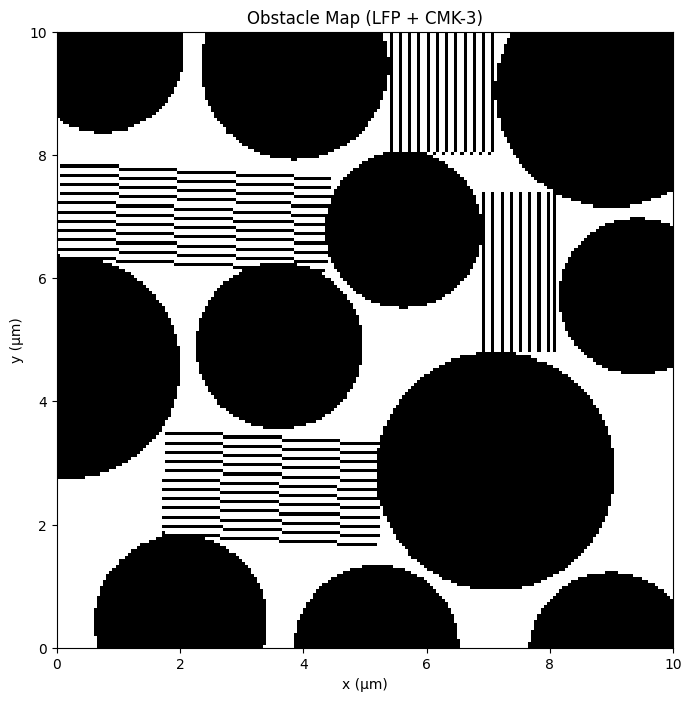

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi, cos, sin, radians

# Ïù¥Ï†ÑÏóê Ï†ïÏùòÎêú circle_rect_area Î∞è find_largest_empty_rectangle Ìï®ÏàòÎäî Ïó¨Í∏∞Ïóê Ìè¨Ìï®ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# (ÏÇ¨Ïö©ÏûêÏùò Ïù¥Ï†Ñ ÏΩîÎìúÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.)
# ... (circle_rect_area Ìï®Ïàò Ï†ïÏùò) ...
# ... (find_largest_empty_rectangle Ìï®Ïàò Ï†ïÏùò) ...


# ---------------------------------------------------------------
# 4) Î©îÏù∏: Ïõê Î∞∞Ïπò ÌõÑ, Í≤©ÏûêÌôî ‚Üí Îπà ÏÇ¨Í∞ÅÌòï ÌÉêÏÉâ ‚Üí ÏãúÍ∞ÅÌôî (2Í∞ú Ï∂îÍ∞Ä)
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(Ïõê) Î∞∞Ïπò ÌååÎùºÎØ∏ÌÑ∞
    domain_size = 10              # ÎèÑÎ©îÏù∏: 0~10 Œºm
    target_porosity = 0.1         # Î™©Ìëú Í∏∞Í≥µÎ•† 10%
    np.random.seed(3)

    # (4-2)  Ïõê Î∞∞Ïπò Ìï®Ïàò Ìò∏Ï∂ú ‚Üí (x,y,r) Î¶¨Ïä§Ìä∏ ÏñªÍ∏∞
    # increase_radius_to_target_porosity Ìï®ÏàòÎèÑ Ïù¥Ï†Ñ ÏÖÄÏóê Ï†ïÏùòÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) ‚ÄúÍ≤©Ïûê Ìï¥ÏÉÅÎèÑ‚Äù ÏÑ§Ï†ï (Ïòà: 200√ó200 ÌîΩÏÖÄ)
    grid_size = 200
    H = W = grid_size

    # (4-4) Ïû•Ïï†Î¨º Îßµ ÏÉùÏÑ±: ÎèÑÎ©îÏù∏ ÎÇ¥ Í∞Å ÌîΩÏÖÄ(Í≤©Ïûê) Ï§ëÏã¨Ïù¥
    #       Ïõê ÏïàÏ™ΩÏóê ÏÜçÌïòÎ©¥ 1, ÏïÑÎãàÎ©¥ 0.
    # find_largest_empty_rectangle Ìï®ÏàòÍ∞Ä Ïù¥ ÎßµÏùÑ ÏàòÏ†ïÌïòÏßÄ ÏïäÎèÑÎ°ù Î≥µÏÇ¨Î≥∏ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    initial_obstacle_map = np.zeros((H, W), dtype=np.uint8)
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            for (cx, cy, cr) in lfp_positions:
                # ÌîΩÏÖÄ Ï§ëÏã¨Ïù¥ Ïõê ÏïàÏóê ÏûàÎäîÏßÄ ÌôïÏù∏
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    initial_obstacle_map[i, j] = 1
                    break # Ïù¥ ÌîΩÏÖÄÏùÄ Ïù¥ÎØ∏ Ïû•Ïï†Î¨ºÎ°ú ÌëúÏãúÎê®

    # (4-5) Í∞ÄÏû• ÌÅ∞ Îπà ÏßÅÏÇ¨Í∞ÅÌòï 3Í∞ú Ï∞æÍ∏∞
    found_rectangles_pix = []
    current_obstacle_map = initial_obstacle_map.copy() # Îßµ Î≥µÏÇ¨ÌïòÏó¨ ÏÇ¨Ïö©

    # 4Í∞úÍπåÏßÄ Ï∞æÎèÑÎ°ù ÏàòÏ†ï
    for k in range(4):
        row0, col0, height_pix, width_pix = find_largest_empty_rectangle(current_obstacle_map)

        # Ï∞æÏùÄ ÏÇ¨Í∞ÅÌòïÏù¥ Ïú†Ìö®Ìïú ÌÅ¨Í∏∞Ïù∏ÏßÄ ÌôïÏù∏
        if width_pix > 0 and height_pix > 0:
            found_rectangles_pix.append((row0, col0, height_pix, width_pix))

            # Ï∞æÏùÄ ÏÇ¨Í∞ÅÌòï ÏòÅÏó≠ÏùÑ ÏûÑÏãúÎ°ú Ïû•Ïï†Î¨ºÎ°ú ÌëúÏãúÌïòÏó¨ Îã§Ïùå ÌÉêÏÉâÏóêÏÑú Ï†úÏô∏
            current_obstacle_map[row0 : row0 + height_pix, col0 : col0 + width_pix] = 1
        else:
            # Îçî Ïù¥ÏÉÅ Ïú†Ìö®Ìïú ÌÅ¨Í∏∞Ïùò Îπà ÏÇ¨Í∞ÅÌòïÏù¥ ÏóÜÏúºÎ©¥ Ï§ëÎã®
            break

    # (4-6) ÌîΩÏÖÄ Îã®ÏúÑ Í≤∞Í≥º ‚Üí Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëú(Œºm)Î°ú Î≥ÄÌôò Î∞è ÌÅ¨Í∏∞ Ï°∞Ï†à, ÌöåÏ†Ñ Í∞ÅÎèÑ Ìï†Îãπ
    found_rectangles_mu = []
    size_reduction_factor = 1 # Ïù¥Ï†Ñ ÏöîÏ≤≠Í∞í Ï†ÅÏö©

    # Í∞Å ÏÇ¨Í∞ÅÌòïÏóê Ï†ÅÏö©Ìï† ÌöåÏ†Ñ Í∞ÅÎèÑ Î¶¨Ïä§Ìä∏ (Ïù¥Ï†Ñ ÏöîÏ≤≠Í∞í Ï†ÅÏö©)
    rotation_angles_deg = [-3, -3, -1, 0]

    for i, (row0, col0, height_pix, width_pix) in enumerate(found_rectangles_pix):
        # ÏõêÎûò ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
        w_rect_orig = width_pix * dx
        h_rect_orig = height_pix * dy

        # Ï§ÑÏñ¥Îì† ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
        w_rect_reduced = w_rect_orig * size_reduction_factor
        h_rect_reduced = h_rect_orig * size_reduction_factor # Corrected variable name

        # ÌÅ¨Í∏∞ Ï§ÑÏñ¥Îì† ÎßåÌÅº ÏãúÏûë ÏúÑÏπò Ï°∞Ï†ï (Í∞ÄÏö¥Îç∞Î•º
        # Í∏∞Ï§ÄÏúºÎ°ú Ï§ÑÏñ¥Îì§ÎèÑÎ°ù)
        x_rect_bottom_left = col0 * dx + (w_rect_orig - w_rect_reduced) / 2.0
        y_rect_bottom_left = row0 * dy + (h_rect_orig - h_rect_reduced) / 2.0

        # ÌòÑÏû¨ ÏÇ¨Í∞ÅÌòïÏóê Ï†ÅÏö©Ìï† ÌöåÏ†Ñ Í∞ÅÎèÑ Í∞ÄÏ†∏Ïò§Í∏∞ (Î¶¨Ïä§Ìä∏ Í∏∏Ïù¥ Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨)
        angle_to_apply_deg = rotation_angles_deg[i % len(rotation_angles_deg)]

        found_rectangles_mu.append((x_rect_bottom_left, y_rect_bottom_left, w_rect_reduced, h_rect_reduced, angle_to_apply_deg))

        print(f"Ï∞æÏùÄ Îπà ÏßÅÏÇ¨Í∞ÅÌòï {len(found_rectangles_mu)} (ÌîΩÏÖÄ Í∏∞Ï§Ä):", (row0, col0, height_pix, width_pix))
        print(f"Ïã§Ï†ú Ï¢åÌëú(Œºm): x={x_rect_bottom_left:.2f}, y={y_rect_bottom_left:.2f}, width={w_rect_reduced:.2f}, height={h_rect_reduced:.2f}, angle={angle_to_apply_deg:.2f}ÎèÑ")


    # (4-7) ÏµúÏ¢Ö obstacle map ÏÉùÏÑ± Î∞è ÏãúÍ∞ÅÌôî
    # initial_obstacle_mapÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏãúÏûëÌï©ÎãàÎã§ (LFP Ïõê Ìè¨Ìï®)
    final_obstacle_map = initial_obstacle_map.copy()

    # ÏÑ†Î∂Ñ Í∞Ñ Í∞ÑÍ≤© (Œºm Îã®ÏúÑ) Î∞è ÏÑ†Î∂Ñ ÎëêÍªò (ÌîΩÏÖÄ Îã®ÏúÑÎ°ú Í∞ÑÏ£º)
    line_spacing = 0.15 # Œºm
    line_pixel_thickness = 1 # ÌîΩÏÖÄ Îã®ÏúÑÎ°ú ÏÑ†Î∂ÑÏùò ÎëêÍªò ÏÑ§Ï†ï

    # Í∞Å ÏßÅÏÇ¨Í∞ÅÌòïÍ≥º ÎÇ¥Î∂Ä ÏÑ†Î∂ÑÏùÑ final_obstacle_mapÏóê Í∑∏Î¶¨Í∏∞
    for i, (x_rect_bl, y_rect_bl, w_rect, h_rect, angle_to_apply_deg) in enumerate(found_rectangles_mu):

        # ÌöåÏ†Ñ Í∞ÅÎèÑÎ•º ÎùºÎîîÏïàÏúºÎ°ú Î≥ÄÌôò
        angle_rad = radians(angle_to_apply_deg)

        # ÏßÅÏÇ¨Í∞ÅÌòï ÌÖåÎëêÎ¶¨ Í∑∏Î¶¨Í∏∞ (ÎëêÍªòÎ•º Í≥†Î†§ÌïòÏó¨ ÎßµÏóê ÌëúÏãú)
        # Note: Ï†ïÌôïÌïú ÌöåÏ†ÑÎêú ÏßÅÏÇ¨Í∞ÅÌòï ÌÖåÎëêÎ¶¨Î•º ÌîΩÏÖÄ Îã®ÏúÑÎ°ú ÎßµÏóê Í∑∏Î¶¨Îäî Í≤ÉÏùÄ Î≥µÏû°Ìï©ÎãàÎã§.
        # Ïó¨Í∏∞ÏÑúÎäî Îã®ÏàúÌôîÎ•º ÏúÑÌï¥ ÏÇ¨Í∞ÅÌòïÏùò AABB (Axis-Aligned Bounding Box)Î•º Í∏∞Ï§ÄÏúºÎ°ú
        # ÎßµÏùÑ ÏóÖÎç∞Ïù¥Ìä∏ÌïòÍ±∞ÎÇò, Í∞Å ÌîΩÏÖÄ Ï§ëÏã¨Ïù¥ ÌöåÏ†ÑÎêú ÏÇ¨Í∞ÅÌòï ÎÇ¥Î∂ÄÏóê ÏûàÎäîÏßÄ ÌåêÎã®Ìï¥Ïïº Ìï©ÎãàÎã§.
        # Îçî Ï†ïÌôïÌïú Î∞©Î≤ïÏùÄ Í∞Å ÌîΩÏÖÄÏù¥ ÌöåÏ†ÑÎêú ÏÇ¨Í∞ÅÌòïÏùò Í≤ΩÎ°úÏóê ÏñºÎßàÎÇò Í∞ÄÍπåÏö¥ÏßÄ Í≥ÑÏÇ∞ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
        # Ïó¨Í∏∞ÏÑúÎäî Ìé∏ÏùòÏÉÅ ÏÇ¨Í∞ÅÌòï ÎÇ¥Î∂Ä Ï†ÑÏ≤¥Î•º Ï±ÑÏö∞Îäî Î∞©ÏãùÏúºÎ°ú Íµ¨ÌòÑÌï©ÎãàÎã§.
        # (ÏõêÎûò Î™©Ï†ÅÏù¥ Îπà Í≥µÍ∞Ñ Ï∞æÎäî Í≤ÉÏù¥ÎØÄÎ°ú, Ï±ÑÏõåÎèÑ Î¨¥Î∞©Ìï† Ïàò ÏûàÏäµÎãàÎã§.)

        # Í∞ÑÎûµÌôîÎêú Î∞©Î≤ï: ÏÇ¨Í∞ÅÌòï ÎÇ¥Î∂Ä ÌîΩÏÖÄÏùÑ Î™®Îëê 1Î°ú Ï±ÑÏõÅÎãàÎã§.
        # Îçî Ï†ïÎ∞ÄÌïòÍ≤å ÌïòÎ†§Î©¥ Í∞Å ÌîΩÏÖÄÏù¥ ÌöåÏ†ÑÎêú ÏÇ¨Í∞ÅÌòïÏùò ÎÇ¥Î∂ÄÏù∏ÏßÄ ÌåêÎ≥ÑÌïòÎäî Î°úÏßÅ ÌïÑÏöî
        # Ïó¨Í∏∞ÏÑúÎäî find_largest_empty_rectangleÏóêÏÑú ÏÇ¨Ïö©Ìïú ÌîΩÏÖÄ ÏòÅÏó≠ÏùÑ Îã§Ïãú ÌôúÏö© (ÌÅ¨Í∏∞ Ï§ÑÏù∏ ÌõÑ)
        # ÌîΩÏÖÄ Ï¢åÌëúÎ°ú Î≥ÄÌôò
        col0 = int(x_rect_bl / dx)
        row0 = int(y_rect_bl / dy)
        width_pix = int(w_rect / dx)
        height_pix = int(h_rect / dy)

        # Îßµ Î≤îÏúÑ Î≤óÏñ¥ÎÇòÏßÄ ÏïäÎèÑÎ°ù ÌÅ¥Î¶¨Ìïë
        col_end = min(col0 + width_pix, W)
        row_end = min(row0 + height_pix, H)
        col0 = max(0, col0)
        row0 = max(0, row0)

        # Ï§ÑÏñ¥Îì† ÏÇ¨Í∞ÅÌòï ÏòÅÏó≠ÏùÑ ÎßµÏóê ÌëúÏãú (ÌöåÏ†ÑÏùÄ ÏãúÍ∞ÅÌôîÏóêÏÑúÎßå Ï†ÅÏö©)
        # final_obstacle_map[row0:row_end, col0:col_end] = 1
        # Note: Ïù¥ Î∞©ÏãùÏùÄ ÌöåÏ†ÑÏùÑ Í≥†Î†§ÌïòÏßÄ Î™ªÌïòÎØÄÎ°ú, ÏïÑÎûò ÏÑ†Î∂Ñ Í∑∏Î¶¨Îäî Î∞©ÏãùÍ≥º Ïú†ÏÇ¨ÌïòÍ≤å ÌîΩÏÖÄ Îã®ÏúÑÎ°ú ÌåêÎã®Ìï¥Ïïº Ìï®

        # Í∞Å ÌîΩÏÖÄÏùò Ï§ëÏã¨Ïù¥ ÌöåÏ†ÑÎêú ÏÇ¨Í∞ÅÌòï ÎÇ¥Î∂ÄÏóê ÏûàÎäîÏßÄ Îçî Ï†ïÌôïÌûà ÌåêÎã®ÌïòÎäî Î°úÏßÅ (Ï£ºÏÑù Ï≤òÎ¶¨)
        # rect_center_x = x_rect_bl + w_rect / 2.0
        # rect_center_y = y_rect_bl + h_rect / 2.0
        # for r in range(H):
        #     for c in range(W):
        #         pixel_center_x = (c + 0.5) * dx
        #         pixel_center_y = (r + 0.5) * dy
        #         # ÌîΩÏÖÄ Ï§ëÏã¨ÏùÑ ÏÇ¨Í∞ÅÌòï Ï§ëÏã¨ÏúºÎ°ú Ïù¥Îèô
        #         translated_x = pixel_center_x - rect_center_x
        #         translated_y = pixel_center_y - rect_center_y
        #         # Ïó≠ÌöåÏ†Ñ (ÌîΩÏÖÄÏùÑ ÌöåÏ†ÑÎêòÏßÄ ÏïäÏùÄ ÏÇ¨Í∞ÅÌòïÏùò Ï¢åÌëúÍ≥ÑÎ°ú Î≥ÄÌôò)
        #         inv_angle_rad = -angle_rad
        #         rotated_x = translated_x * cos(inv_angle_rad) - translated_y * sin(inv_angle_rad)
        #         rotated_y = translated_x * sin(inv_angle_rad) + translated_y * cos(inv_angle_rad)
        #         # ÌöåÏ†ÑÎêòÏßÄ ÏïäÏùÄ ÏÇ¨Í∞ÅÌòïÏùò AABB ÎÇ¥Î∂ÄÏóê ÏûàÎäîÏßÄ ÌôïÏù∏
        #         if -w_rect/2.0 <= rotated_x <= w_rect/2.0 and -h_rect/2.0 <= rotated_y <= h_rect/2.0:
        #              final_obstacle_map[r, c] = 1


        # ÏÑ†Î∂Ñ Í∑∏Î¶¨Í∏∞ (ÌîΩÏÖÄ Îã®ÏúÑÎ°ú ÎßµÏóê ÌëúÏãú)
        # ÏÑ†Î∂ÑÏùÄ ÏÇ¨Í∞ÅÌòïÏùò Í∏¥ Î≥ÄÏóê ÌèâÌñâÌïòÍ≤å Í∑∏Î†§Ïßê
        if w_rect >= h_rect:
            # ÎÑàÎπÑÍ∞Ä Îçî Í∏∏Í±∞ÎÇò Í∞ôÏúºÎ©¥, ÎÜíÏù¥ Î∞©Ìñ•ÏúºÎ°ú ÏÑ†Î∂Ñ Î∞∞Ïπò
            shorter_side_len = h_rect
            num_lines = int(shorter_side_len / line_spacing)

            for k in range(num_lines + 1):
                dist_along_shorter = k * line_spacing
                # if k * line_spacing > shorter_side_len: # ÎßàÏßÄÎßâ ÏÑ†Î∂ÑÏù¥ ÎÑàÎ¨¥ Í∏∏Î©¥ Ï°∞Ï†à (ÏÑ†Î∂Ñ ÎÅùÏ†êÏù¥ ÏÇ¨Í∞ÅÌòï Í≤ΩÍ≥ÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÎèÑÎ°ù Ìï¥Ïïº Ìï®)
                #     dist_along_shorter = shorter_side_len # Ïù¥ Î°úÏßÅÏùÄ ÏÑ†Î∂Ñ ÎÅùÏ†êÏùÑ Ï†ïÌôïÌûà ÎßûÏ∂îÎäî Îç∞ ÏÇ¨Ïö©ÎêòÏßÄÎßå, Îßµ Í∑∏Î¶¨Í∏∞ÏóêÏÑúÎäî ÌîΩÏÖÄ Îã®ÏúÑ ÌåêÎã®ÏúºÎ°ú ÎåÄÏ≤¥

                # ÏÑ†Î∂ÑÏùò ÏãúÏûëÏ†ê (Î°úÏª¨ Ï¢åÌëú)
                start_x_local = 0
                start_y_local = dist_along_shorter

                # ÏÑ†Î∂ÑÏùò ÎÅùÏ†ê (Î°úÏª¨ Ï¢åÌëú)
                end_x_local = w_rect # Í∏¥ Î≥Ä Í∏∏Ïù¥ (ÎÑàÎπÑ)
                end_y_local = dist_along_shorter

                # ÏÑ†Î∂ÑÏùÑ Îî∞Îùº ÌîΩÏÖÄÏùÑ Ï∞çÍ∏∞ ÏúÑÌï¥ ÏÑ†Î∂ÑÏùò Î¨ºÎ¶¨Ï†Å Í∏∏Ïù¥Î•º Í≥ÑÏÇ∞
                line_physical_length = w_rect

                # ÏÑ†Î∂Ñ ÏúÑÏóê ÏûàÎäî Í∞Å ÌîΩÏÖÄÏùÑ ÌåêÎã®
                # ÏãúÏûëÏ†êÏóêÏÑú ÎÅùÏ†êÍπåÏßÄ ÏùºÏ†ïÌïú Ïä§ÌÖùÏúºÎ°ú Ïù¥ÎèôÌïòÎ©∞ Ìï¥Îãπ ÌîΩÏÖÄÏùÑ ÎßµÏóê ÌëúÏãú
                num_points = max(2, int(line_physical_length / (min(dx, dy) / line_pixel_thickness))) # ÏÑ†Î∂Ñ Í∏∏Ïù¥ / (ÌîΩÏÖÄ Ìï¥ÏÉÅÎèÑ / ÏÑ†Î∂Ñ ÎëêÍªò)
                for step in range(num_points + 1):
                    t = step / num_points # 0Î∂ÄÌÑ∞ 1ÍπåÏßÄ Î≥ÄÌôîÌïòÎäî ÎπÑÏú®

                    # ÏÑ†Î∂Ñ ÏúÑÏùò ÌòÑÏû¨ Ï†ê (Î°úÏª¨ Ï¢åÌëú)
                    current_x_local = start_x_local + t * (end_x_local - start_x_local)
                    current_y_local = start_y_local + t * (end_y_local - start_y_local)

                    # ÌöåÏ†Ñ Î≥ÄÌôò Ï†ÅÏö©
                    rotated_x_local = current_x_local * cos(angle_rad) - current_y_local * sin(angle_rad)
                    rotated_y_local = current_x_local * sin(angle_rad) + current_y_local * cos(angle_rad)

                    # Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëú
                    current_x_mu = x_rect_bl + rotated_x_local
                    current_y_mu = y_rect_bl + rotated_y_local

                    # Ìï¥Îãπ Ï†êÏù¥ ÏÜçÌïú ÌîΩÏÖÄ Ï¢åÌëú Í≥ÑÏÇ∞
                    pixel_col = int(current_x_mu / dx)
                    pixel_row = int(current_y_mu / dy)

                    # Îßµ Î≤îÏúÑ Î≤óÏñ¥ÎÇòÏßÄ ÏïäÎèÑÎ°ù ÌôïÏù∏ÌïòÍ≥† ÎßµÏóê ÌëúÏãú
                    if 0 <= pixel_row < H and 0 <= pixel_col < W:
                        final_obstacle_map[pixel_row, pixel_col] = 1

        else:
            # ÎÜíÏù¥Í∞Ä Îçî Í∏∏Î©¥, ÎÑàÎπÑ Î∞©Ìñ•ÏúºÎ°ú ÏÑ†Î∂Ñ Î∞∞Ïπò
            shorter_side_len = w_rect
            num_lines = int(shorter_side_len / line_spacing)

            for k in range(num_lines + 1):
                dist_along_shorter = k * line_spacing
                 # if k * line_spacing > shorter_side_len: # ÎßàÏßÄÎßâ ÏÑ†Î∂ÑÏù¥ ÎÑàÎ¨¥ Í∏∏Î©¥ Ï°∞Ï†à
                #     dist_along_shorter = shorter_side_len

                # ÏÑ†Î∂ÑÏùò ÏãúÏûëÏ†ê (Î°úÏª¨ Ï¢åÌëú)
                start_x_local = dist_along_shorter
                start_y_local = 0

                # ÏÑ†Î∂ÑÏùò ÎÅùÏ†ê (Î°úÏª¨ Ï¢åÌëú)
                end_x_local = dist_along_shorter
                end_y_local = h_rect # Í∏¥ Î≥Ä Í∏∏Ïù¥ (ÎÜíÏù¥)

                # ÏÑ†Î∂ÑÏùÑ Îî∞Îùº ÌîΩÏÖÄÏùÑ Ï∞çÍ∏∞ ÏúÑÌï¥ ÏÑ†Î∂ÑÏùò Î¨ºÎ¶¨Ï†Å Í∏∏Ïù¥Î•º Í≥ÑÏÇ∞
                line_physical_length = h_rect

                 # ÏÑ†Î∂Ñ ÏúÑÏóê ÏûàÎäî Í∞Å ÌîΩÏÖÄÏùÑ ÌåêÎã®
                num_points = max(2, int(line_physical_length / (min(dx, dy) / line_pixel_thickness)))
                for step in range(num_points + 1):
                    t = step / num_points # 0Î∂ÄÌÑ∞ 1ÍπåÏßÄ Î≥ÄÌôîÌïòÎäî ÎπÑÏú®

                    # ÏÑ†Î∂Ñ ÏúÑÏùò ÌòÑÏû¨ Ï†ê (Î°úÏª¨ Ï¢åÌëú)
                    current_x_local = start_x_local + t * (end_x_local - start_x_local)
                    current_y_local = start_y_local + t * (end_y_local - start_y_local)

                     # ÌöåÏ†Ñ Î≥ÄÌôò Ï†ÅÏö©
                    rotated_x_local = current_x_local * cos(angle_rad) - current_y_local * sin(angle_rad)
                    rotated_y_local = current_x_local * sin(angle_rad) + current_y_local * cos(angle_rad)

                    # Ïã§Ï†ú ÎèÑÎ©îÏù∏ Ï¢åÌëú
                    current_x_mu = x_rect_bl + rotated_x_local
                    current_y_mu = y_rect_bl + rotated_y_local

                    # Ìï¥Îãπ Ï†êÏù¥ ÏÜçÌïú ÌîΩÏÖÄ Ï¢åÌëú Í≥ÑÏÇ∞
                    pixel_col = int(current_x_mu / dx)
                    pixel_row = int(current_y_mu / dy)

                    # Îßµ Î≤îÏúÑ Î≤óÏñ¥ÎÇòÏßÄ ÏïäÎèÑÎ°ù ÌôïÏù∏ÌïòÍ≥† ÎßµÏóê ÌëúÏãú
                    if 0 <= pixel_row < H and 0 <= pixel_col < W:
                        final_obstacle_map[pixel_row, pixel_col] = 1


    # (4-8) ÏµúÏ¢Ö Ïû•Ïï†Î¨º Îßµ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(8, 8))
    # imshowÎäî ÌñâÎ†¨ÏùÑ Ïù¥ÎØ∏ÏßÄÎ°ú ÌëúÏãú. origin='lower'Îäî 0,0ÏùÑ ÏôºÏ™Ω ÏïÑÎûòÎ°ú, cmap='Greys'Îäî ÌùëÎ∞±ÏúºÎ°ú.
    # extentÎäî Ï∂ï Î≤îÏúÑÎ•º ÏÑ§Ï†ï
    plt.imshow(final_obstacle_map, origin='lower', cmap='Greys', extent=[0, domain_size, 0, domain_size])
    plt.title(f"Obstacle Map (LFP + CMK-3)")
    plt.xlabel("x (Œºm)")
    plt.ylabel("y (Œºm)")
    plt.grid(False) # Í≤©Ïûê ÎùºÏù∏ Ïà®Í∏∞Í∏∞
    plt.show()

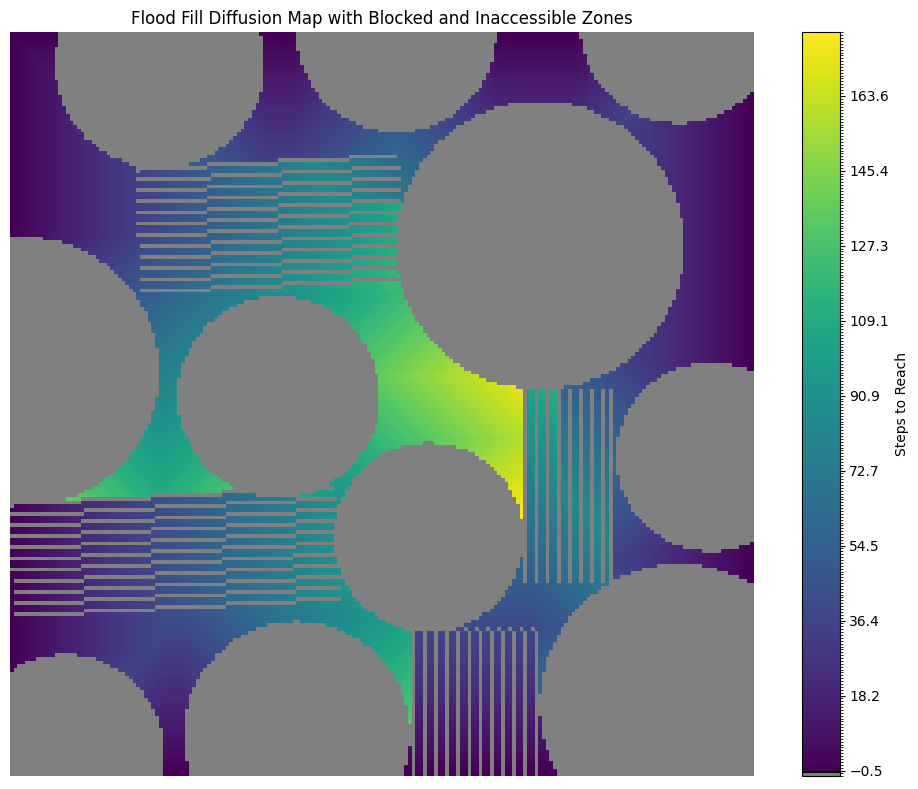

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from matplotlib.colors import ListedColormap, BoundaryNorm

# Flood Fill ÏïåÍ≥†Î¶¨Ï¶ò
def flood_fill_time_map(final_obstacle_map, start_points):
    h, w = final_obstacle_map.shape
    time_map = np.full((h, w), np.inf)
    visited = np.zeros((h, w), dtype=bool)
    queue = deque()

    for y, x in start_points:
        if final_obstacle_map[y, x] == 0:
            queue.append((y, x, 0))
            time_map[y, x] = 0
            visited[y, x] = True

    while queue:
        y, x, t = queue.popleft()
        for dy, dx in [(-1,0), (1,0), (0,-1), (0,1)]:
            ny, nx = y + dy, x + dx
            if 0 <= ny < h and 0 <= nx < w:
                if not visited[ny, nx] and final_obstacle_map[ny, nx] == 0:
                    visited[ny, nx] = True
                    time_map[ny, nx] = t + 1
                    queue.append((ny, nx, t + 1))
    return time_map

# Í∞ÄÏû•ÏûêÎ¶¨ÏóêÏÑú ÏãúÏûëÏ†ê Ï∞æÍ∏∞
def get_edge_starts(final_obstacle_map):
    starts = []
    h, w = final_obstacle_map.shape
    for i in range(h):
        if final_obstacle_map[i, 0] == 0:
            starts.append((i, 0))
        if final_obstacle_map[i, w-1] == 0:
            starts.append((i, w-1))
    for j in range(w):
        if final_obstacle_map[0, j] == 0:
            starts.append((0, j))
        if final_obstacle_map[h-1, j] == 0:
            starts.append((h-1, j))
    return starts

# Flood Fill Ïã§Ìñâ
start_points = get_edge_starts(final_obstacle_map)
time_map = flood_fill_time_map(final_obstacle_map, start_points)

# ÏãúÍ∞ÅÌôîÏö© Îßµ ÏÉùÏÑ±
visual_map = np.zeros_like(time_map)
visual_map[~np.isinf(time_map)] = time_map[~np.isinf(time_map)]                  # ÎèÑÎã¨ Í∞ÄÎä•
visual_map[(np.isinf(time_map)) & (final_obstacle_map == 0)] = -1                      # Îπà Í≥µÍ∞ÑÏù¥ÏßÄÎßå ÎèÑÎã¨ Î™ªÌï®
visual_map[final_obstacle_map == 1] = -2                                               # ÏûÖÏûê

# ÏÉâÏÉÅ Ï†ïÏùò
cmap_colors = [
    'grey',          # -2: ÏûÖÏûê
    'black',      # -1: ÎèÑÎã¨ Î™ªÌïú Îπà Í≥µÍ∞Ñ
    *plt.cm.viridis(np.linspace(0, 1, 256))  # ÎÇòÎ®∏ÏßÄ ÌçºÏßê Í≤ΩÎ°ú
]
cmap = ListedColormap(cmap_colors)

# Î≤îÏúÑ Î∞è ÏÉâÏÉÅ Ï†ïÍ∑úÌôî
max_time = np.nanmax(time_map[~np.isinf(time_map)])
bounds = [-2.5, -1.5, -0.5] + list(np.linspace(0, max_time, 257)[1:])
norm = BoundaryNorm(bounds, cmap.N)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
plt.imshow(visual_map, cmap=cmap, norm=norm, interpolation='nearest')
plt.title("Flood Fill Diffusion Map with Blocked and Inaccessible Zones")
plt.colorbar(label='Steps to Reach')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Ï†ÑÌï¥ÏßàÏù¥ Ï°¥Ïû¨ÌïòÎäî ÏòÅÏó≠ (ÏûÖÏûêÍ∞Ä ÏóÜÎäî Î∂ÄÎ∂Ñ)
electrolyte_mask = (final_obstacle_map == 0)

# Í∑∏ Ï§ë ÎèÑÎã¨ Í∞ÄÎä•Ìïú ÏòÅÏó≠
reachable_mask = (~np.isinf(time_map)) & electrolyte_mask

# ÎèÑÎã¨ Í∞ÄÎä• ÎπÑÏú® Í≥ÑÏÇ∞
total_electrolyte_voxels = np.sum(electrolyte_mask)
reachable_voxels = np.sum(reachable_mask)
reachable_ratio = reachable_voxels / total_electrolyte_voxels * 100

# ÌèâÍ∑† ÎèÑÎã¨ ÏãúÍ∞ÑÍ≥º ÌëúÏ§ÄÌé∏Ï∞® (ÎèÑÎã¨ Í∞ÄÎä•Ìïú Ï†ÑÌï¥Ïßà ÏòÅÏó≠Îßå)
average_steps = np.mean(time_map[reachable_mask])
std_steps = np.std(time_map[reachable_mask])

# Í≤∞Í≥º Ï∂úÎ†•
print("üîç Ï†ïÌôïÌïú ÌÜµÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º (Ï†ÑÌï¥Ïßà ÏòÅÏó≠ Í∏∞Ï§Ä)")
print(f"1. Ï†ÑÌï¥Ïßà ÏòÅÏó≠ ÎèÑÎã¨ Í∞ÄÎä• ÎπÑÏú®: {reachable_ratio:.2f}%")
print(f"2. ÌèâÍ∑† ÎèÑÎã¨ ÏãúÍ∞Ñ: {average_steps:.2f} steps")
print(f"3. ÎèÑÎã¨ ÏãúÍ∞Ñ ÌëúÏ§ÄÌé∏Ï∞®: {std_steps:.2f} steps")


üîç Ï†ïÌôïÌïú ÌÜµÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º (Ï†ÑÌï¥Ïßà ÏòÅÏó≠ Í∏∞Ï§Ä)
1. Ï†ÑÌï¥Ïßà ÏòÅÏó≠ ÎèÑÎã¨ Í∞ÄÎä• ÎπÑÏú®: 100.00%
2. ÌèâÍ∑† ÎèÑÎã¨ ÏãúÍ∞Ñ: 50.44 steps
3. ÎèÑÎã¨ ÏãúÍ∞Ñ ÌëúÏ§ÄÌé∏Ï∞®: 42.26 steps


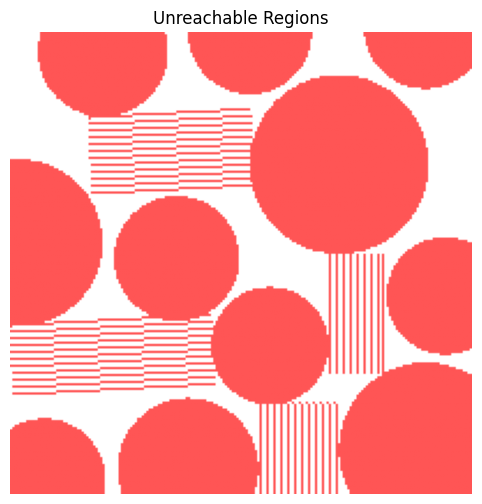

üî¥ Ïù¥Ïò®Ïù¥ ÎèÑÎã¨ Î∂àÍ∞ÄÎä•Ìïú Î©¥Ï†Å ÎπÑÏú®: 0.00%


In [ ]:
# 3ÏÉâ Íµ¨Î∂Ñ: 0 = ÎèÑÎã¨ Í∞ÄÎä• Ï†ÑÌï¥Ïßà, 1 = ÏûÖÏûê, 2 = ÎèÑÎã¨ Î∂àÍ∞ÄÎä• Ï†ÑÌï¥Ïßà
visual_map = np.zeros_like(final_obstacle_map, dtype=int)

# ÏûÖÏûê (Ïû•Ïï†Î¨º) ÏòÅÏó≠
visual_map[final_obstacle_map == 1] = 1

# ÎèÑÎã¨ Î∂àÍ∞ÄÎä•Ìïú Ï†ÑÌï¥Ïßà ÏòÅÏó≠
unreachable_mask = (final_obstacle_map == 0) & np.isinf(time_map)
visual_map[unreachable_mask] = 2

# ÏÉâÏÉÅ Îßµ Ï†ïÏùò
from matplotlib.colors import ListedColormap

# Ìù∞ÏÉâ(ÎèÑÎã¨Í∞ÄÎä•), Í≤ÄÏ†ï(ÏûÖÏûê), Îπ®Í∞ï(ÎèÑÎã¨Î∂àÍ∞Ä)
cmap = ListedColormap(["#FFFFFF", "#000000", "#FF5555"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
plt.imshow(visual_map, cmap=cmap)
plt.title("Unreachable Regions")
plt.axis("off")
plt.show()

# ÎèÑÎã¨ Î∂àÍ∞ÄÎä•Ìïú Ï†ÑÌï¥Ïßà ÎπÑÏú® Í≥ÑÏÇ∞
total_electrolyte = np.sum(final_obstacle_map == 0)
unreachable_electrolyte = np.sum(unreachable_mask)

if total_electrolyte > 0:
    unreachable_ratio = (unreachable_electrolyte / total_electrolyte) * 100
    print(f"üî¥ Ïù¥Ïò®Ïù¥ ÎèÑÎã¨ Î∂àÍ∞ÄÎä•Ìïú Î©¥Ï†Å ÎπÑÏú®: {unreachable_ratio:.2f}%")
else:
    print("‚ö†Ô∏è Ï†ÑÌï¥ÏßàÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")


--- 3D LFP ÏûÖÏûê Ï¥àÍ∏∞ Î∞∞Ïπò (Optimized) ---
Ï¥àÍ∏∞ Î∞∞Ïπò ÌõÑ ÏûÖÏûê Ïàò: 651, Í∏∞Í≥µÎ•†: 68.27%

--- 3D LFP ÏûÖÏûê ÏÑ±Ïû• ÏãúÎèÑ (Optimized) ---
Îçî Ïù¥ÏÉÅ ÏûÖÏûê ÏÑ±Ïû•Ïù¥ Ïñ¥Î†§Ïõå Ï¢ÖÎ£åÌï©ÎãàÎã§.

--- Î∞∞Ïπò ÏôÑÎ£å ---
ÏµúÏ¢Ö ÏûÖÏûê Ïàò: 651
ÏµúÏ¢Ö Ï†êÏú† Î∂ÄÌîº: 400481.63 Œºm¬≥
ÏµúÏ¢Ö Í∏∞Í≥µÎ•†: 59.95%

--- 3D ÏãúÍ∞ÅÌôî (Optimized) ---


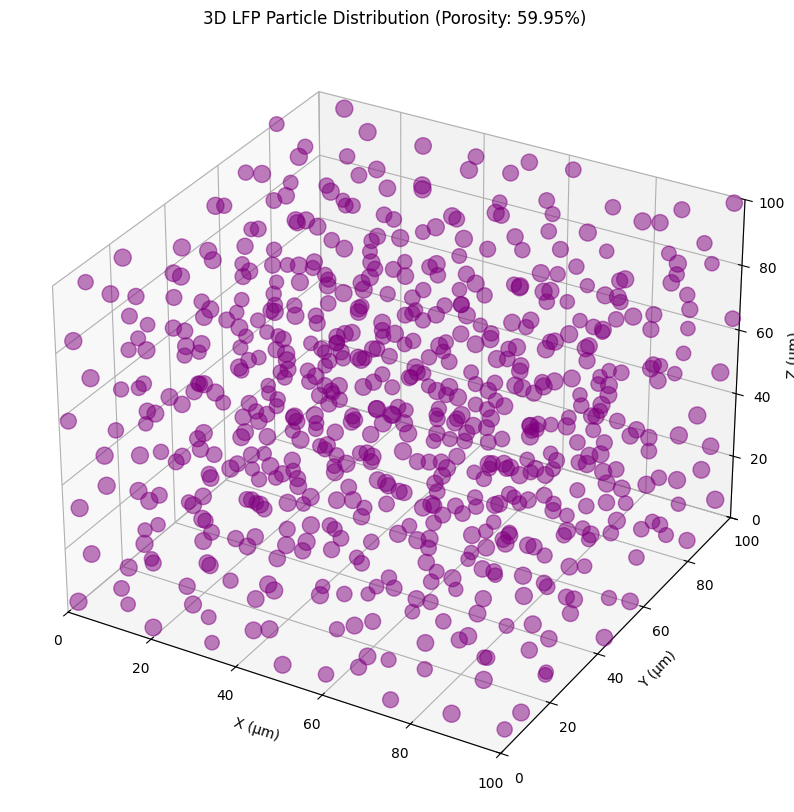

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi
from scipy.spatial import KDTree # KDTreeÎ•º ÏûÑÌè¨Ìä∏Ìï©ÎãàÎã§.

# ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï
np.random.seed(42)

def sphere_volume(r):
    """Î∞òÏßÄÎ¶Ñ rÏù∏ Íµ¨Ïùò Î∂ÄÌîº Í≥ÑÏÇ∞."""
    return (4/3) * pi * r**3

def place_lfp_3d_optimized(domain_size, min_r_LFP=5, max_r_LFP=10, target_porosity=0.3, max_attempts_particle=10000, max_attempts_growth=5000):
    """
    KDTreeÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÌôîÎêú 3D LFP ÏûÖÏûê Î∞∞Ïπò Ìï®Ïàò.
    """
    lfp_positions = [] # [(x, y, z, r), ...]
    total_volume = domain_size ** 3
    max_occupied_volume = total_volume * (1 - target_porosity)
    occupied_volume = 0

    print("--- 3D LFP ÏûÖÏûê Ï¥àÍ∏∞ Î∞∞Ïπò (Optimized) ---")
    # 1Îã®Í≥Ñ: KDTreeÎ•º Ïù¥Ïö©Ìïú Îπ†Î•∏ Ï¥àÍ∏∞ Î∞∞Ïπò
    for attempt in range(max_attempts_particle):
        if occupied_volume >= max_occupied_volume:
            print("Î™©Ìëú Î∂ÄÌîºÏóê ÎèÑÎã¨ÌïòÏó¨ Ï¥àÍ∏∞ Î∞∞ÏπòÎ•º Ï§ëÎã®Ìï©ÎãàÎã§.")
            break

        r_LFP = np.random.uniform(min_r_LFP, max_r_LFP)
        center = np.random.uniform(0, domain_size, 3)

        # KDTreeÎ•º ÏÉùÏÑ±ÌïòÏó¨ Ï£ºÎ≥Ä ÏûÖÏûêÎ•º Îπ†Î•¥Í≤å Í≤ÄÏÉâ
        if lfp_positions:
            # ÌòÑÏû¨ ÏûÖÏûêÎì§Ïùò Ï§ëÏã¨ Ï¢åÌëúÎßåÏúºÎ°ú KDTree Íµ¨ÏÑ±
            points = np.array([p[:3] for p in lfp_positions])
            tree = KDTree(points)

            # Í≤ÄÏÉâ Î∞òÍ≤Ω: ÏÉà ÏûÖÏûê Î∞òÏßÄÎ¶Ñ + ÏµúÎåÄ ÏûÖÏûê Î∞òÏßÄÎ¶Ñ (Ï∂©Îèå Í∞ÄÎä•Ìïú ÏµúÎåÄ Í±∞Î¶¨)
            search_radius = r_LFP + max_r_LFP
            # ÎÇ¥ Ï£ºÎ≥ÄÏùò Ïù¥ÏõÉ ÏûÖÏûê Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
            indices = tree.query_ball_point(center, r=search_radius)

            overlap = False
            for i in indices:
                lx, ly, lz, lr = lfp_positions[i]
                dist_sq = np.sum((center - np.array([lx, ly, lz]))**2)
                if dist_sq < (r_LFP + lr)**2:
                    overlap = True
                    break
        else: # Ï≤´ ÏûÖÏûêÎäî Í≤ÄÏÇ¨ ÌïÑÏöî ÏóÜÏùå
            overlap = False

        if not overlap:
            lfp_positions.append((*center, r_LFP))
            occupied_volume += sphere_volume(r_LFP)

    print(f"Ï¥àÍ∏∞ Î∞∞Ïπò ÌõÑ ÏûÖÏûê Ïàò: {len(lfp_positions)}, Í∏∞Í≥µÎ•†: {1 - occupied_volume / total_volume:.2%}")

    print("\n--- 3D LFP ÏûÖÏûê ÏÑ±Ïû• ÏãúÎèÑ (Optimized) ---")
    # 2Îã®Í≥Ñ: KDTreeÎ•º Ïù¥Ïö©Ìïú Îπ†Î•∏ ÏÑ±Ïû•
    # ÏûëÏùÄ ÏûÖÏûêÎ∂ÄÌÑ∞ ÏÑ±Ïû•ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ Î∞òÏßÄÎ¶Ñ ÏàúÏúºÎ°ú Ï†ïÎ†¨
    lfp_positions.sort(key=lambda item: item[3])

    for growth_iter in range(max_attempts_growth):
        if occupied_volume >= max_occupied_volume:
            print("Î™©Ìëú Î∂ÄÌîºÏóê ÎèÑÎã¨ÌïòÏó¨ ÏÑ±Ïû•ÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
            break

        something_grew = False
        # KDTreeÎäî Îß§ ÏÑ±Ïû• Îã®Í≥ÑÎßàÎã§ Îã§Ïãú ÎßåÎì§Ïñ¥Ïïº Ìï® (ÏûÖÏûê ÏúÑÏπòÎäî Í≥†Ï†ï, Î∞òÏßÄÎ¶ÑÎßå Î≥ÄÍ≤Ω)
        points = np.array([p[:3] for p in lfp_positions])
        if not points.any(): break
        tree = KDTree(points)

        for i in range(len(lfp_positions)):
            lx, ly, lz, lr = lfp_positions[i]

            if lr >= max_r_LFP:
                continue

            new_lr = min(lr * 1.01, max_r_LFP) # 1% ÏÑ±Ïû•, ÏµúÎåÄ Î∞òÏßÄÎ¶Ñ Ï†úÌïú

            # Í≤ÄÏÉâ Î∞òÍ≤Ω: ÏÉà Î∞òÏßÄÎ¶Ñ + ÏµúÎåÄ Î∞òÏßÄÎ¶Ñ
            search_radius = new_lr + max_r_LFP
            center = np.array([lx, ly, lz])
            indices = tree.query_ball_point(center, r=search_radius)

            overlap = False
            for j in indices:
                if i == j: continue # ÏûêÍ∏∞ ÏûêÏã†ÏùÄ Ï†úÏô∏
                plx, ply, plz, plr = lfp_positions[j]
                dist_sq = np.sum((center - np.array([plx, ply, plz]))**2)
                if dist_sq < (new_lr + plr)**2:
                    overlap = True
                    break

            if not overlap:
                occupied_volume -= sphere_volume(lr)
                occupied_volume += sphere_volume(new_lr)
                lfp_positions[i] = (lx, ly, lz, new_lr)
                something_grew = True

        if not something_grew:
            print("Îçî Ïù¥ÏÉÅ ÏûÖÏûê ÏÑ±Ïû•Ïù¥ Ïñ¥Î†§Ïõå Ï¢ÖÎ£åÌï©ÎãàÎã§.")
            break

    final_occupied_volume = sum(sphere_volume(r) for (*_, r) in lfp_positions)
    final_porosity = 1 - final_occupied_volume / total_volume
    print(f"\n--- Î∞∞Ïπò ÏôÑÎ£å ---")
    print(f"ÏµúÏ¢Ö ÏûÖÏûê Ïàò: {len(lfp_positions)}")
    print(f"ÏµúÏ¢Ö Ï†êÏú† Î∂ÄÌîº: {final_occupied_volume:.2f} Œºm¬≥")
    print(f"ÏµúÏ¢Ö Í∏∞Í≥µÎ•†: {final_porosity:.2%}")

    return lfp_positions

# ÏòàÏãú ÏÇ¨Ïö©
domain_size = 100
target_porosity = 0.3
min_r = 4
max_r = 6

# ÏµúÏ†ÅÌôîÎêú Ìï®Ïàò Ìò∏Ï∂ú
lfp_positions_3d = place_lfp_3d_optimized(domain_size, min_r_LFP=min_r, max_r_LFP=max_r, target_porosity=target_porosity)

# 3D ÏãúÍ∞ÅÌôî (Îπ†Î•∏ scatter Î∞©Ïãù ÏÇ¨Ïö©)
print("\n--- 3D ÏãúÍ∞ÅÌôî (Optimized) ---")
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

if lfp_positions_3d:
    # Ìïú Î≤àÏóê Î™®Îì† Ï†êÏùÑ Í∑∏Î¶¨Îäî Í≤ÉÏù¥ Ìõ®Ïî¨ Îπ†Î¶Ñ
    positions = np.array(lfp_positions_3d)
    # Ï†êÏùò ÌÅ¨Í∏∞Î•º Î∞òÏßÄÎ¶ÑÏóê ÎπÑÎ°ÄÌïòÎèÑÎ°ù ÏÑ§Ï†ï (Ï†ÅÏ†àÌïú ÏÉÅÏàòÎ•º Í≥±Ìï¥ Ï°∞Ï†à)
    sizes = (positions[:, 3] / max_r) * 150

    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], s=sizes, c='purple', alpha=0.5)

ax.set_xlim(0, domain_size)
ax.set_ylim(0, domain_size)
ax.set_zlim(0, domain_size)
ax.set_xlabel('X (Œºm)')
ax.set_ylabel('Y (Œºm)')
ax.set_zlabel('Z (Œºm)')
final_porosity_val = 1 - sum(sphere_volume(r) for r in positions[:, 3]) / (domain_size**3)
ax.set_title(f"3D LFP Particle Distribution (Porosity: {final_porosity_val:.2%})")
plt.show()

--- 3D LFP ÏûÖÏûê Ï¥àÍ∏∞ Î∞∞Ïπò (Optimized) ---
Ï¥àÍ∏∞ Î∞∞Ïπò ÌõÑ ÏûÖÏûê Ïàò: 229, Í∏∞Í≥µÎ•†: 59.77%

--- 3D LFP ÏûÖÏûê ÏÑ±Ïû• ÏãúÎèÑ (Optimized) ---

--- Î∞∞Ïπò ÏôÑÎ£å ---
ÏµúÏ¢Ö ÏûÖÏûê Ïàò: 229
ÏµúÏ¢Ö Ï†êÏú† Î∂ÄÌîº: 61075.28 Œºm¬≥
ÏµúÏ¢Ö Í∏∞Í≥µÎ•†: 51.14%

--- 3D Surface Visualization ---


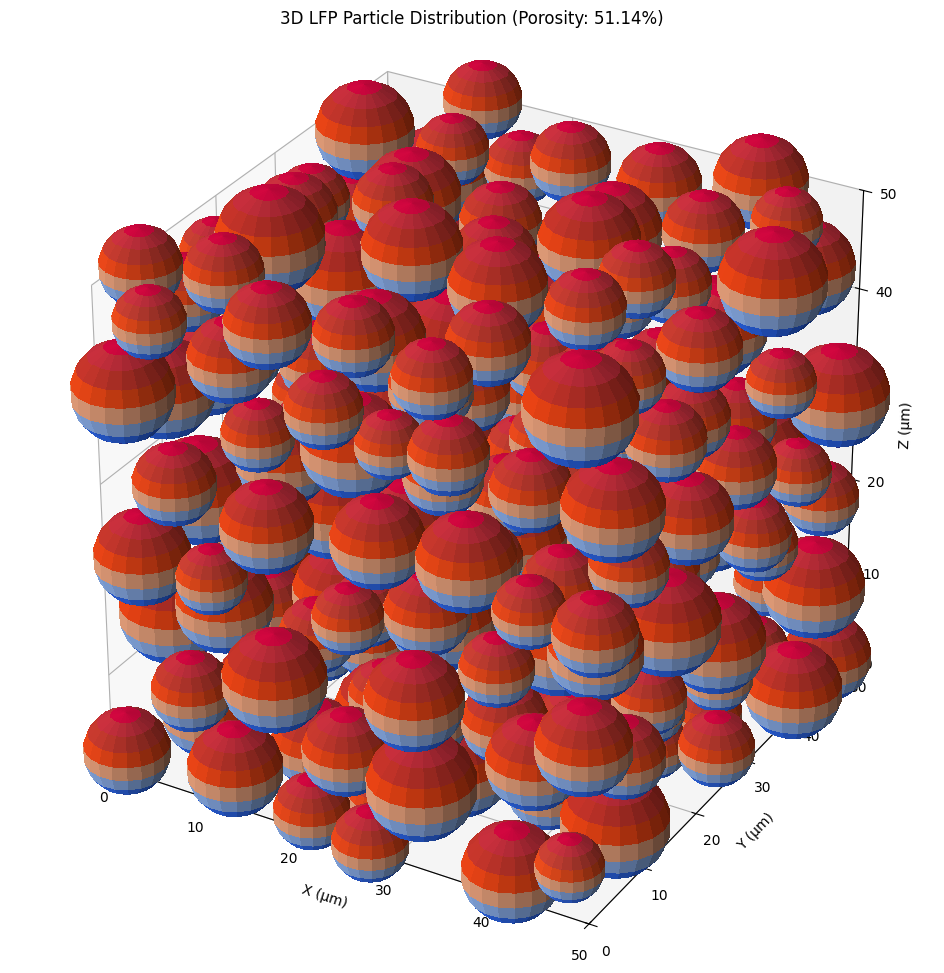

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi
from scipy.spatial import KDTree
from matplotlib.colors import LightSource #! Í¥ëÏõê Ìö®Í≥ºÎ•º ÏúÑÌïú Î™®Îìà

# (Ïù¥Ï†ÑÏóê Ï†úÍ≥µÎêú ÏµúÏ†ÅÌôîÎêú place_lfp_3d_optimized Ìï®ÏàòÎäî Ïó¨Í∏∞Ïóê Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§)
def sphere_volume(r):
    return (4/3) * pi * r**3

def place_lfp_3d_optimized(domain_size, min_r_LFP=1.25, max_r_LFP=2.5, target_porosity=0.2, max_attempts_particle=10000, max_attempts_growth=5000):
    lfp_positions = []
    total_volume = domain_size ** 3
    max_occupied_volume = total_volume * (1 - target_porosity)
    occupied_volume = 0

    print("--- 3D LFP ÏûÖÏûê Ï¥àÍ∏∞ Î∞∞Ïπò (Optimized) ---")
    for attempt in range(max_attempts_particle):
        if occupied_volume >= max_occupied_volume:
            break
        r_LFP = np.random.uniform(min_r_LFP, max_r_LFP)
        center = np.random.uniform(0, domain_size, 3)
        if lfp_positions:
            points = np.array([p[:3] for p in lfp_positions])
            tree = KDTree(points)
            search_radius = r_LFP + max_r_LFP
            indices = tree.query_ball_point(center, r=search_radius)
            overlap = False
            for i in indices:
                lx, ly, lz, lr = lfp_positions[i]
                dist_sq = np.sum((center - np.array([lx, ly, lz]))**2)
                if dist_sq < (r_LFP + lr)**2:
                    overlap = True
                    break
        else:
            overlap = False
        if not overlap:
            lfp_positions.append((*center, r_LFP))
            occupied_volume += sphere_volume(r_LFP)
    print(f"Ï¥àÍ∏∞ Î∞∞Ïπò ÌõÑ ÏûÖÏûê Ïàò: {len(lfp_positions)}, Í∏∞Í≥µÎ•†: {1 - occupied_volume / total_volume:.2%}")
    print("\n--- 3D LFP ÏûÖÏûê ÏÑ±Ïû• ÏãúÎèÑ (Optimized) ---")
    lfp_positions.sort(key=lambda item: item[3])
    for growth_iter in range(max_attempts_growth):
        if occupied_volume >= max_occupied_volume:
            break
        something_grew = False
        points = np.array([p[:3] for p in lfp_positions])
        if not points.any(): break
        tree = KDTree(points)
        for i in range(len(lfp_positions)):
            lx, ly, lz, lr = lfp_positions[i]
            if lr >= max_r_LFP:
                continue
            new_lr = min(lr * 1.01, max_r_LFP)
            search_radius = new_lr + max_r_LFP
            center = np.array([lx, ly, lz])
            indices = tree.query_ball_point(center, r=search_radius)
            overlap = False
            for j in indices:
                if i == j: continue
                plx, ply, plz, plr = lfp_positions[j]
                dist_sq = np.sum((center - np.array([plx, ply, plz]))**2)
                if dist_sq < (new_lr + plr)**2:
                    overlap = True
                    break
            if not overlap:
                occupied_volume -= sphere_volume(lr)
                occupied_volume += sphere_volume(new_lr)
                lfp_positions[i] = (lx, ly, lz, new_lr)
                something_grew = True
        if not something_grew:
            break
    final_occupied_volume = sum(sphere_volume(r) for (*_, r) in lfp_positions)
    final_porosity = 1 - final_occupied_volume / total_volume
    print(f"\n--- Î∞∞Ïπò ÏôÑÎ£å ---")
    print(f"ÏµúÏ¢Ö ÏûÖÏûê Ïàò: {len(lfp_positions)}")
    print(f"ÏµúÏ¢Ö Ï†êÏú† Î∂ÄÌîº: {final_occupied_volume:.2f} Œºm¬≥")
    print(f"ÏµúÏ¢Ö Í∏∞Í≥µÎ•†: {final_porosity:.2%}")
    return lfp_positions

# --- Î©îÏù∏ Ïã§Ìñâ Î∂ÄÎ∂Ñ ---

# ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
domain_size = 50
target_porosity = 0.4
min_r = 3
max_r = 5

# ÏûÖÏûê ÏÉùÏÑ±
lfp_positions_3d = place_lfp_3d_optimized(
    domain_size,
    min_r_LFP=min_r,
    max_r_LFP=max_r,
    target_porosity=target_porosity
)

# --- üí° 3D ÏûÖÏ≤¥Í∞êÏùÑ ÏÇ¥Î¶∞ ÏãúÍ∞ÅÌôî ---
print("\n--- 3D Surface Visualization ---")

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# 1. Í¥ëÏõê Í∞ùÏ≤¥ ÏÉùÏÑ± (Ï°∞Î™Ö Ìö®Í≥º)
#    azdeg: ÎπõÏùò Î∞©ÏúÑÍ∞Å (ÏàòÌèâ Î∞©Ìñ•), altdeg: ÎπõÏùò Í≥†ÎèÑÍ∞Å (ÏàòÏßÅ Î∞©Ìñ•)
light = LightSource(azdeg=315, altdeg=45)

# 2. Íµ¨ ÌëúÎ©¥ÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌïú Î©îÏâ¨(mesh) ÏÉùÏÑ±
#    u, vÎäî Íµ¨Ïùò ÏúÑÎèÑ, Í≤ΩÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÌååÎùºÎØ∏ÌÑ∞ÏûÖÎãàÎã§.
#    Í∞íÏùÑ ÎÜíÏù¥Î©¥ Íµ¨Í∞Ä Îçî Î∂ÄÎìúÎü¨ÏõåÏßÄÏßÄÎßå Î†åÎçîÎßÅÏù¥ ÎäêÎ†§ÏßëÎãàÎã§. (10~20 ÏÇ¨Ïù¥Í∞Ä Ï†ÅÎãπ)
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 10)

# 3. Í∞Å LFP ÏûÖÏûêÏóê ÎåÄÌï¥ Î∞òÎ≥µÌïòÎ©∞ Íµ¨ Í∑∏Î¶¨Í∏∞
#    ÏûÖÏûê ÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏúºÎ©¥(Ïòà: 500Í∞ú Ïù¥ÏÉÅ) Îß§Ïö∞ ÎäêÎ†§Ïßà Ïàò ÏûàÏäµÎãàÎã§.
num_particles_to_draw = len(lfp_positions_3d)
if num_particles_to_draw > 500:
    print(f"ÏûÖÏûê ÏàòÍ∞Ä {num_particles_to_draw}Í∞úÎ°ú ÎÑàÎ¨¥ ÎßéÏïÑ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.")
else:
    for x, y, z, r in lfp_positions_3d:
        # Íµ¨Ïùò ÌëúÎ©¥ Ï¢åÌëú Í≥ÑÏÇ∞
        sx = x + r * np.outer(np.cos(u), np.sin(v))
        sy = y + r * np.outer(np.sin(u), np.sin(v))
        sz = z + r * np.outer(np.ones(np.size(u)), np.cos(v))

        # üí° ÏûÖÏ≤¥Í∞êÏùò ÌïµÏã¨: Í¥ëÏõêÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏÉâÏÉÅ Í≥ÑÏÇ∞
        #    Í∏∞Î≥∏ ÏÉâÏÉÅÏùÑ 'purple'Î°ú ÏÑ§Ï†ïÌïòÍ≥†, Í¥ëÏõêÏóê Îî∞Îùº Î™ÖÏïîÏù¥ Ï†ÅÏö©Îêú RGB ÏÉâÏÉÅ Î∞∞Ïó¥ÏùÑ ÏñªÏäµÎãàÎã§.
        rgb = light.shade(sz, cmap=plt.cm.coolwarm)

        ax.plot_surface(sx, sy, sz, rstride=1, cstride=1, facecolors=rgb,
                        linewidth=0, antialiased=False, shade=True)

    # Ï∂ï Î∞è ÌÉÄÏù¥ÌãÄ ÏÑ§Ï†ï
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_zlim(0, domain_size)
    ax.set_xlabel('X (Œºm)')
    ax.set_ylabel('Y (Œºm)')
    ax.set_zlabel('Z (Œºm)')
    final_porosity_val = 1 - sum(sphere_volume(r) for (*_, r) in lfp_positions_3d) / (domain_size**3)
    ax.set_title(f"3D LFP Particle Distribution (Porosity: {final_porosity_val:.2%})")

    # Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂ï ÎπÑÏú®ÏùÑ ÎèôÏùºÌïòÍ≤å ÎßûÏ∂§
    ax.set_aspect('equal')
    plt.show()


--- 3D Surface Visualization (Corrected) ---


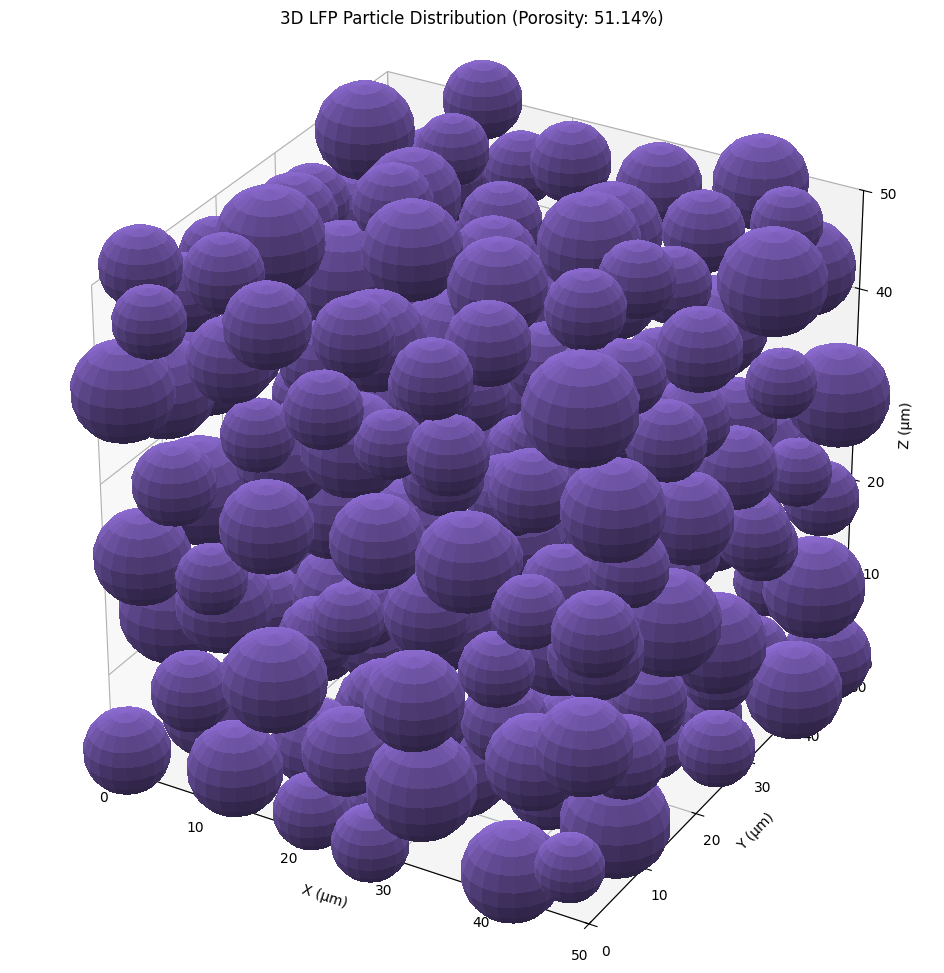

In [ ]:
# (Ïù¥Ï†ÑÏùò ÏûÖÏûê Î∞∞Ïπò ÏΩîÎìúÎäî ÎèôÏùºÌï©ÎãàÎã§)
# ...
# lfp_positions_3d = place_lfp_3d_optimized(...)
# ...

# --- üí° 3D ÏûÖÏ≤¥Í∞êÏùÑ ÏÇ¥Î¶∞ ÏãúÍ∞ÅÌôî (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ) ---
print("\n--- 3D Surface Visualization (Corrected) ---")

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# 1. Í¥ëÏõê Í∞ùÏ≤¥ ÏÉùÏÑ± (ÏùºÍ¥ÄÎêú Ï°∞Î™Ö Ìö®Í≥ºÎ•º ÏúÑÌï¥)
light = LightSource(azdeg=315, altdeg=45)

# 2. Íµ¨ ÌëúÎ©¥ÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌïú Î©îÏâ¨(mesh) ÏÉùÏÑ±
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 10)

# 3. Í∞Å LFP ÏûÖÏûêÏóê ÎåÄÌï¥ Î∞òÎ≥µÌïòÎ©∞ Íµ¨ Í∑∏Î¶¨Í∏∞
num_particles_to_draw = len(lfp_positions_3d)
if num_particles_to_draw > 500:
    print(f"ÏûÖÏûê ÏàòÍ∞Ä {num_particles_to_draw}Í∞úÎ°ú ÎÑàÎ¨¥ ÎßéÏïÑ ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.")
else:
    # Î™®Îì† Íµ¨Ïóê Ï†ÅÏö©Ìï† Îã®Ïùº ÏÉâÏÉÅ Ï†ïÏùò
    sphere_color = 'mediumpurple' # ÏõêÌïòÎäî ÏÉâÏÉÅÏúºÎ°ú Î≥ÄÍ≤Ω Í∞ÄÎä•

    for x, y, z, r in lfp_positions_3d:
        # Íµ¨Ïùò ÌëúÎ©¥ Ï¢åÌëú Í≥ÑÏÇ∞
        sx = x + r * np.outer(np.cos(u), np.sin(v))
        sy = y + r * np.outer(np.sin(u), np.sin(v))
        sz = z + r * np.outer(np.ones(np.size(u)), np.cos(v))

        # --- üí° ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ ---
        # facecolors ÎåÄÏã† colorÏôÄ lightsource ÏòµÏÖòÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
        # Ïù¥Î†áÍ≤å ÌïòÎ©¥ ZÏ∂ï ÎÜíÏù¥Í∞Ä ÏïÑÎãå, Í¥ëÏõêÏóê Îî∞Î•∏ Î™ÖÏïîÎßå ÌëúÌòÑÎê©ÎãàÎã§.
        ax.plot_surface(sx, sy, sz, rstride=1, cstride=1, color=sphere_color,
                        lightsource=light, # Ï†ïÏùòÎêú Í¥ëÏõê Ï†ÅÏö©
                        linewidth=0, antialiased=False, shade=True)

# Ï∂ï Î∞è ÌÉÄÏù¥ÌãÄ ÏÑ§Ï†ï
ax.set_xlim(0, domain_size)
ax.set_ylim(0, domain_size)
ax.set_zlim(0, domain_size)
ax.set_xlabel('X (Œºm)')
ax.set_ylabel('Y (Œºm)')
ax.set_zlabel('Z (Œºm)')
final_porosity_val = 1 - sum(sphere_volume(r) for (*_, r) in lfp_positions_3d) / (domain_size**3)
ax.set_title(f"3D LFP Particle Distribution (Porosity: {final_porosity_val:.2%})")

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂ï ÎπÑÏú®ÏùÑ ÎèôÏùºÌïòÍ≤å ÎßûÏ∂§
ax.set_aspect('equal')
plt.show()

--- 3D LFP ÏûÖÏûê Ï¥àÍ∏∞ Î∞∞Ïπò (Optimized) ---
Ï¥àÍ∏∞ Î∞∞Ïπò ÌõÑ ÏûÖÏûê Ïàò: 295, Í∏∞Í≥µÎ•†: 61.51%
Ï¥ù ÏãúÎèÑ ÌöüÏàò (Ï¥àÍ∏∞ Î∞∞Ïπò): 10000

--- 3D LFP ÏûÖÏûê ÏÑ±Ïû• ÏãúÎèÑ (Optimized) ---
Îçî Ïù¥ÏÉÅ ÏûÖÏûê ÏÑ±Ïû•Ïù¥ Ïñ¥Î†§Ïõå Ï¢ÖÎ£åÌï©ÎãàÎã§.

--- Î∞∞Ïπò ÏôÑÎ£å ---
ÏµúÏ¢Ö ÏûÖÏûê Ïàò: 295
ÏµúÏ¢Ö Ï†êÏú† Î∂ÄÌîº (Îã®Ïàú Í≥ÑÏÇ∞): 495203.04 Œºm¬≥
ÏµúÏ¢Ö Í∏∞Í≥µÎ•† (Îã®Ïàú Í≥ÑÏÇ∞): 50.48%
Ï¥ù ÏãúÎèÑ ÌöüÏàò (ÏÑ±Ïû• Îã®Í≥Ñ): 60

--- 3D Surface Visualization (Clipped at Boundary) ---


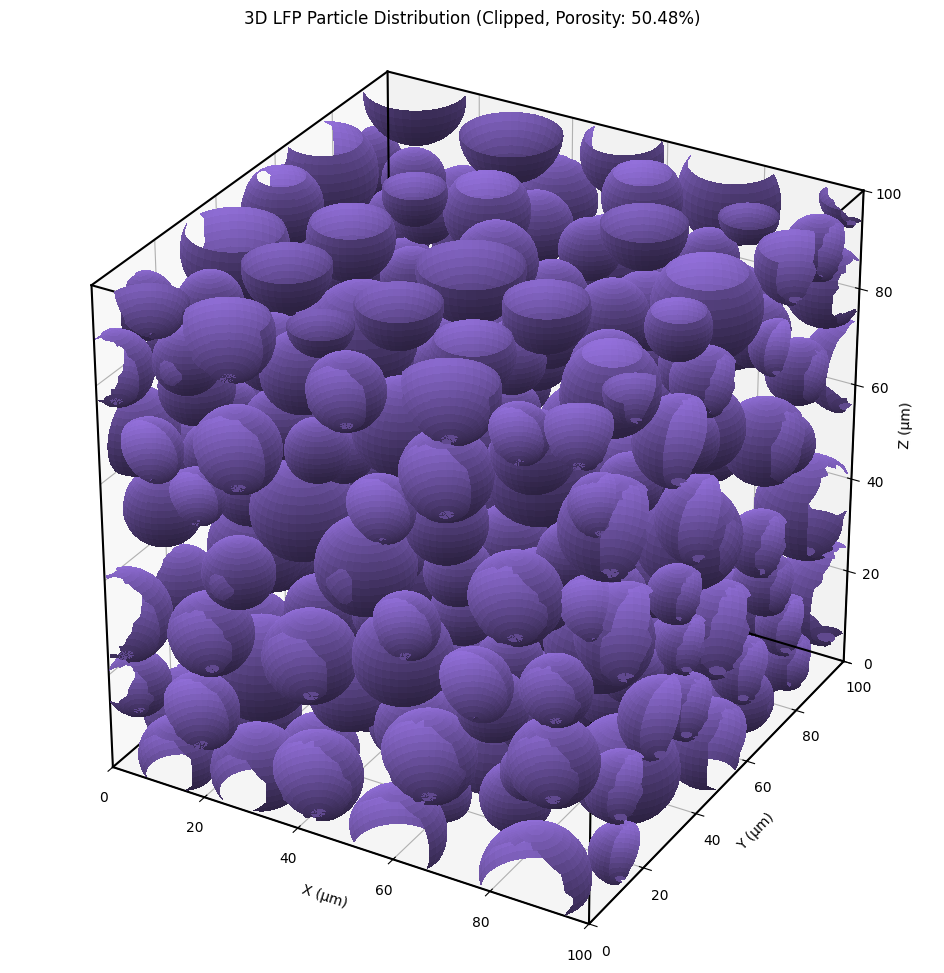

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi
from scipy.spatial import KDTree
from matplotlib.colors import LightSource

# ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï
np.random.seed(42)

def sphere_volume(r):
    """Î∞òÏßÄÎ¶Ñ rÏù∏ Íµ¨Ïùò Î∂ÄÌîº Í≥ÑÏÇ∞."""
    return (4/3) * pi * r**3

def place_lfp_3d_optimized(domain_size, min_r_LFP=1.25, max_r_LFP=2.5, target_porosity=0.2, max_attempts_particle=10000, max_attempts_growth=5000):
    """
    KDTreeÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÌôîÎêú 3D LFP ÏûÖÏûê Î∞∞Ïπò Ìï®Ïàò (Ïò§Î•ò ÏàòÏ†ïÎê®).
    """
    lfp_positions = []
    total_volume = domain_size ** 3
    max_occupied_volume = total_volume * (1 - target_porosity)
    occupied_volume = 0
    attempts = 0
    attempts_growth = 0


    print("--- 3D LFP ÏûÖÏûê Ï¥àÍ∏∞ Î∞∞Ïπò (Optimized) ---")
    for attempt in range(max_attempts_particle):
        if occupied_volume >= max_occupied_volume:
            break
        r_LFP = np.random.uniform(min_r_LFP, max_r_LFP)
        center = np.random.uniform(0, domain_size, 3)
        if lfp_positions:
            points = np.array([p[:3] for p in lfp_positions])
            tree = KDTree(points)
            search_radius = r_LFP + max_r_LFP
            indices = tree.query_ball_point(center, r=search_radius)
            overlap = False
            for i in indices:
                lx, ly, lz, lr = lfp_positions[i]
                dist_sq = np.sum((center - np.array([lx, ly, lz]))**2)
                if dist_sq < (r_LFP + lr)**2:
                    overlap = True
                    break
        else:
            overlap = False
        if not overlap:
            lfp_positions.append((*center, r_LFP))
            occupied_volume += sphere_volume(r_LFP)
        attempts += 1


    print(f"Ï¥àÍ∏∞ Î∞∞Ïπò ÌõÑ ÏûÖÏûê Ïàò: {len(lfp_positions)}, Í∏∞Í≥µÎ•†: {1 - sum(sphere_volume(r) for (*_, r) in lfp_positions) / total_volume:.2%}")
    print(f"Ï¥ù ÏãúÎèÑ ÌöüÏàò (Ï¥àÍ∏∞ Î∞∞Ïπò): {attempts}")


    print("\n--- 3D LFP ÏûÖÏûê ÏÑ±Ïû• ÏãúÎèÑ (Optimized) ---")
    lfp_positions.sort(key=lambda item: item[3])

    for growth_iter in range(max_attempts_growth):
        if occupied_volume >= max_occupied_volume:
            break
        something_grew = False
        points = np.array([p[:3] for p in lfp_positions])
        if not points.any(): break
        tree = KDTree(points)
        for i in range(len(lfp_positions)):
            lx, ly, lz, lr = lfp_positions[i]
            if lr >= max_r_LFP:
                continue
            new_lr = min(lr * 1.01, max_r_LFP)
            search_radius = new_lr + max_r_LFP
            center = np.array([lx, ly, lz])
            indices = tree.query_ball_point(center, r=search_radius)
            overlap = False
            for j in indices:
                if i == j: continue
                plx, ply, plz, plr = lfp_positions[j]
                dist_sq = np.sum((center - np.array([plx, ply, plz]))**2)
                if dist_sq < (new_lr + plr)**2:
                    overlap = True
                    break
            if not overlap:
                occupied_volume -= sphere_volume(lr)
                occupied_volume += sphere_volume(new_lr)
                lfp_positions[i] = (lx, ly, lz, new_lr)
                something_grew = True
        attempts_growth += 1

        if not something_grew:
            print("Îçî Ïù¥ÏÉÅ ÏûÖÏûê ÏÑ±Ïû•Ïù¥ Ïñ¥Î†§Ïõå Ï¢ÖÎ£åÌï©ÎãàÎã§.")
            break

    final_occupied_volume = sum(sphere_volume(r) for (*_, r) in lfp_positions)
    final_porosity = 1 - final_occupied_volume / total_volume
    print(f"\n--- Î∞∞Ïπò ÏôÑÎ£å ---")
    print(f"ÏµúÏ¢Ö ÏûÖÏûê Ïàò: {len(lfp_positions)}")
    print(f"ÏµúÏ¢Ö Ï†êÏú† Î∂ÄÌîº (Îã®Ïàú Í≥ÑÏÇ∞): {final_occupied_volume:.2f} Œºm¬≥")
    print(f"ÏµúÏ¢Ö Í∏∞Í≥µÎ•† (Îã®Ïàú Í≥ÑÏÇ∞): {final_porosity:.2%}")
    print(f"Ï¥ù ÏãúÎèÑ ÌöüÏàò (ÏÑ±Ïû• Îã®Í≥Ñ): {attempts_growth}")


    return lfp_positions

# --- Î©îÏù∏ Ïã§Ìñâ Î∂ÄÎ∂Ñ ---
domain_size = 100
target_porosity = 0.3
min_r = 5
max_r = 10

lfp_positions_3d = place_lfp_3d_optimized(
    domain_size,
    min_r_LFP=min_r,
    max_r_LFP=max_r,
    target_porosity=target_porosity
)

# --- 3D ÏûÖÏ≤¥Í∞êÏùÑ ÏÇ¥Î¶∞ ÏãúÍ∞ÅÌôî (Í≤ΩÍ≥ÑÏóêÏÑú ÏûêÎ•¥Í∏∞ Ï∂îÍ∞Ä) ---
print("\n--- 3D Surface Visualization (Clipped at Boundary) ---")

num_particles_to_draw = len(lfp_positions_3d)

if num_particles_to_draw <= 500: # 500Í∞ú Ïù¥ÌïòÏùº ÎïåÎßå ÏãúÍ∞ÅÌôî
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    light = LightSource(azdeg=315, altdeg=45)
    # Íµ¨ ÌëúÎ©¥Ïùò Ìï¥ÏÉÅÎèÑ Ï¶ùÍ∞Ä (ÏûòÎ¶∞ Î©¥ÏùÑ Îçî Î∂ÄÎìúÎüΩÍ≤å Î≥¥Ïù¥Í∏∞ ÏúÑÌï¥)
    u = np.linspace(0, 2 * np.pi, 40)
    v = np.linspace(0, np.pi, 20)
    sphere_color = 'mediumpurple'

    # Î®ºÏ†Ä LFP ÏûÖÏûêÎ•º Î™®Îëê Í∑∏Î¶ΩÎãàÎã§.
    for x, y, z, r in lfp_positions_3d:
        # Íµ¨Ïùò ÌëúÎ©¥ Ï¢åÌëú Í≥ÑÏÇ∞
        sx = x + r * np.outer(np.cos(u), np.sin(v))
        sy = y + r * np.outer(np.sin(u), np.sin(v))
        sz = z + r * np.outer(np.ones(np.size(u)), np.cos(v))

        # üìå Í≤ΩÍ≥ÑÏóêÏÑú ÏûêÎ•¥Í∏∞: ÎèÑÎ©îÏù∏ Î≤îÏúÑ Î∞ñÏùò Ï¢åÌëúÎäî NaNÏúºÎ°ú ÏÑ§Ï†ï
        mask = (sx >= 0) & (sx <= domain_size) & \
               (sy >= 0) & (sy <= domain_size) & \
               (sz >= 0) & (sz <= domain_size)

        sx[~mask] = np.nan
        sy[~mask] = np.nan
        sz[~mask] = np.nan

        # ÏàòÏ†ïÎêú Ï¢åÌëúÎ°ú Íµ¨ ÌëúÎ©¥ Í∑∏Î¶¨Í∏∞
        ax.plot_surface(sx, sy, sz, rstride=1, cstride=1, color=sphere_color,
                        lightsource=light, linewidth=0, antialiased=False, shade=True)

    # üìå Í∑∏ Îã§Ïùå ÎèÑÎ©îÏù∏ Í≤ΩÍ≥ÑÏÑ†(12Í∞ú Î™®ÏÑúÎ¶¨)ÏùÑ Í∑∏Î¶ΩÎãàÎã§.
    # Ïù¥Î†áÍ≤å ÌïòÎ©¥ ÏÑ†Ïù¥ ÏûÖÏûê ÏúÑÏóê Í∑∏Î†§ÏßÄÍ≤å Îê©ÎãàÎã§.
    # ÎèÑÎ©îÏù∏ Íº≠ÏßìÏ†ê Ï¢åÌëú
    p000 = [0, 0, 0]
    p100 = [domain_size, 0, 0]
    p010 = [0, domain_size, 0]
    p001 = [0, 0, domain_size]
    p110 = [domain_size, domain_size, 0]
    p101 = [domain_size, 0, domain_size]
    p011 = [0, domain_size, domain_size]
    p111 = [domain_size, domain_size, domain_size]

    # Î™®ÏÑúÎ¶¨ ÏÑ† Í∑∏Î¶¨Í∏∞
    edges = [
        (p000, p100), (p000, p010), (p000, p001),
        (p100, p110), (p100, p101),
        (p010, p110), (p010, p011),
        (p001, p101), (p001, p011),
        (p110, p111),
        (p101, p111),
        (p011, p111)
    ]

    edge_color = 'black'
    edge_linewidth = 1.5

    for start_point, end_point in edges:
        # zorderÎ•º ÎÜíÍ≤å ÏÑ§Ï†ïÌïòÏó¨ Îã§Î•∏ ÏöîÏÜåÎì§ ÏúÑÏóê Í∑∏Î†§ÏßÄÎèÑÎ°ù ÏãúÎèÑÌï† Ïàò ÏûàÏßÄÎßå,
        # 3D plot_surfaceÏôÄ plot Í∞ÑÏóêÎäî zorder Ìö®Í≥ºÍ∞Ä Ï†úÌïúÏ†ÅÏùº Ïàò ÏûàÏäµÎãàÎã§.
        # Í∑∏Î¶¨Îäî ÏàúÏÑúÍ∞Ä Îçî Ï§ëÏöîÌï©ÎãàÎã§.
        ax.plot([start_point[0], end_point[0]],
                [start_point[1], end_point[1]],
                [start_point[2], end_point[2]],
                color=edge_color, linewidth=edge_linewidth, zorder=100) # zorder Ï∂îÍ∞Ä ÏãúÎèÑ


    # Ï∂ï Î∞è ÌÉÄÏù¥ÌãÄ ÏÑ§Ï†ï
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_zlim(0, domain_size)
    ax.set_xlabel('X (Œºm)')
    ax.set_ylabel('Y (Œºm)')
    ax.set_zlabel('Z (Œºm)')
    final_porosity_val = 1 - sum(sphere_volume(r) for (*_, r) in lfp_positions_3d) / (domain_size**3)
    ax.set_title(f"3D LFP Particle Distribution (Clipped, Porosity: {final_porosity_val:.2%})")
    ax.set_aspect('equal')
    plt.show()
else:
    print(f"ÏûÖÏûê ÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏïÑ (ÌòÑÏû¨ {len(lfp_positions_3d)}Í∞ú) 3D ÏãúÍ∞ÅÌôîÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.")

# Task
3D Voxel Í≤©ÏûêÏóê LFP ÏûÖÏûêÎ•º Î∞∞ÏπòÌïòÍ≥†, LFP 90: CB 6: Î∞îÏù∏Îçî 4Ïùò ÏßàÎüâ ÎπÑÏú®ÏùÑ Í≥†Î†§ÌïòÏó¨ CBÏôÄ Î∞îÏù∏ÎçîÎ•º ÌïòÎÇòÏùò Î≥µÌï©Ï≤¥(CBM)Î°ú Î™®Îç∏ÎßÅÌïòÏó¨ Î∞∞ÏπòÌï©ÎãàÎã§. Ïù¥ÌõÑ ÏàòÏ†ïÎêú Flood Fill ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥Ïò®Ïù¥ Ïù¥Îèô Í∞ÄÎä•Ìïú Ï†ÑÌï¥Ïßà ÏòÅÏó≠ÏóêÏÑúÏùò Ïù¥Îèô Í±∞Î¶¨Î•º Í≥ÑÏÇ∞ÌïòÍ≥†, ÎèÑÎã¨ Í∞ÄÎä•Ìïú Ï†ÑÌï¥Ïßà VoxelÏùò ÎπÑÏú®, ÌèâÍ∑† Ïù¥Îèô Í±∞Î¶¨, ÌëúÏ§Ä Ìé∏Ï∞®Î•º Î∂ÑÏÑùÌï©ÎãàÎã§. ÎßàÏßÄÎßâÏúºÎ°ú Obstacle Map, CBM ÏòÅÏó≠, Flood Fill Í≤∞Í≥ºÎ•º 3DÎ°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

## Voxel mesh Í∏∞Î∞ò 3d ÏûÖÏûê Î∞∞Ïπò Î∞è obstacle map ÏÉùÏÑ±

### Subtask:
ÎØ∏Î¶¨ Ï†ïÏùòÎêú 3D Voxel Í≤©Ïûê ÏÉÅÏóê LFP ÏûÖÏûêÎ•º Î∞∞ÏπòÌïòÍ≥† Obstacle MapÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§. Ïù¥Îïå LFP ÏûÖÏûêÍ∞Ä Ï∞®ÏßÄÌïòÎäî VoxelÏùÄ Ïû•Ïï†Î¨º(1)Î°ú ÌëúÏãúÌïòÍ≥†, ÎÇòÎ®∏ÏßÄÎäî Îπà Í≥µÍ∞Ñ(0)ÏúºÎ°ú ÌëúÏãúÌï©ÎãàÎã§.


**Reasoning**:
The subtask requires generating a 3D obstacle map based on the placed LFP particles. The previous code already defines the `place_lfp_3d_optimized` function and places the particles. The next step is to create the 3D voxel grid and mark the voxels occupied by the LFP particles as obstacles (1). The remaining voxels will be marked as free space (0). This involves iterating through each voxel and checking if its center is within any LFP sphere.



In [ ]:
# 2. 3D Voxel Í≤©Ïûê ÌòïÌÉúÏùò Obstacle Map ÏÉùÏÑ±
# Voxel ÌÅ¨Í∏∞ ÏÑ§Ï†ï (Ïòà: domain_sizeÏùò 1/100)
voxel_size = 1.0  # Í∞Å VoxelÏùò Î¨ºÎ¶¨Ï†Å ÌÅ¨Í∏∞ (Œºm)
grid_resolution_3d = int(domain_size / voxel_size) # Í∞Å Ï∞®ÏõêÎ≥Ñ Voxel Í∞úÏàò

obstacle_map_3d = np.zeros((grid_resolution_3d, grid_resolution_3d, grid_resolution_3d), dtype=np.uint8)

# Voxel Ï§ëÏã¨ Ï¢åÌëú Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú dx, dy, dz
dv = voxel_size

print(f"\n--- 3D Obstacle Map ÏÉùÏÑ± ---")
print(f"ÎèÑÎ©îÏù∏ ÌÅ¨Í∏∞: {domain_size} Œºm")
print(f"Voxel ÌÅ¨Í∏∞: {voxel_size} Œºm")
print(f"Í≤©Ïûê Ìï¥ÏÉÅÎèÑ: {grid_resolution_3d} x {grid_resolution_3d} x {grid_resolution_3d}")

# 3. Í∞Å VoxelÏùò Ï§ëÏã¨ Ï¢åÌëúÍ∞Ä LFP ÏûÖÏûê ÎÇ¥Î∂ÄÏóê Ìè¨Ìï®ÎêòÎäîÏßÄ ÌôïÏù∏
num_lfp_particles = len(lfp_positions_3d)
print(f"Ï≤òÎ¶¨Ìï† LFP ÏûÖÏûê Ïàò: {num_lfp_particles}")

# LFP ÏûÖÏûê Ï†ïÎ≥¥Î•º NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò (Îçî Îπ†Î•∏ Ï†ëÍ∑ºÏùÑ ÏúÑÌï¥)
if num_lfp_particles > 0:
    lfp_data = np.array(lfp_positions_3d)
    lfp_centers = lfp_data[:, :3]
    lfp_radii = lfp_data[:, 3]

    # Í∞Å Voxel Ï§ëÏã¨ Ï¢åÌëúÏóê ÎåÄÌïú Î∞òÎ≥µ (Ïù¥Ï§ë Î£®ÌîÑÎ≥¥Îã§ Î≤°ÌÑ∞ÌôîÎÇò Îã§Î•∏ ÏµúÏ†ÅÌôî Í≥†Î†§ Í∞ÄÎä•ÌïòÏßÄÎßå, Í∏∞Î≥∏ Íµ¨ÌòÑ)
    # Îçî Îπ†Î•∏ Î∞©Î≤ï: Í∞Å LFP ÏûÖÏûêÏóê ÎåÄÌï¥ Ìï¥Îãπ ÏûÖÏûêÍ∞Ä Ìè¨Ìï®Ìï† Ïàò ÏûàÎäî Voxel Î≤îÏúÑÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ ÏóÖÎç∞Ïù¥Ìä∏
    print("Voxel Îßµ ÏóÖÎç∞Ïù¥Ìä∏ Ï§ë...")
    for idx, (cx, cy, cz, cr) in enumerate(lfp_positions_3d):
        # ÏûÖÏûê Í≤ΩÍ≥ÑÏÑ†Ïóê ÏÇ¥Ïßù Ïó¨Ïú†Î•º Ï§òÏÑú Í≥ÑÏÇ∞ Ïò§Î•ò Î∞©ÏßÄ
        buffer = 0.01 * cr
        min_x = max(0, int((cx - cr - buffer) / dv))
        max_x = min(grid_resolution_3d - 1, int((cx + cr + buffer) / dv))
        min_y = max(0, int((cy - cr - buffer) / dv))
        max_y = min(grid_resolution_3d - 1, int((cy + cr + buffer) / dv))
        min_z = max(0, int((cz - cr - buffer) / dv))
        max_z = min(grid_resolution_3d - 1, int((cz + cr + buffer) / dv))

        for i in range(min_x, max_x + 1):
            for j in range(min_y, max_y + 1):
                for k in range(min_z, max_z + 1):
                    # Voxel Ï§ëÏã¨ Ï¢åÌëú (Œºm Îã®ÏúÑ)
                    voxel_center_x = (i + 0.5) * dv
                    voxel_center_y = (j + 0.5) * dv
                    voxel_center_z = (k + 0.5) * dv

                    # Voxel Ï§ëÏã¨Ïù¥ LFP ÏûÖÏûê ÎÇ¥Î∂ÄÏóê Ìè¨Ìï®ÎêòÎäîÏßÄ ÌôïÏù∏
                    dist_sq = (voxel_center_x - cx)**2 + (voxel_center_y - cy)**2 + (voxel_center_z - cz)**2
                    if dist_sq <= cr**2:
                        obstacle_map_3d[i, j, k] = 1

    print("Voxel Îßµ ÏóÖÎç∞Ïù¥Ìä∏ ÏôÑÎ£å.")
else:
    print("LFP ÏûÖÏûêÍ∞Ä ÏóÜÏñ¥ Obstacle MapÏù¥ Î™®Îëê 0ÏúºÎ°ú Ï¥àÍ∏∞ÌôîÎê©ÎãàÎã§.")


# 4. ÏÉùÏÑ±Îêú 3D Obstacle MapÏùÑ obstacle_map_3d Î≥ÄÏàòÏóê Ï†ÄÏû• (Ïù¥ÎØ∏ Ï†ÄÏû•Îê®)

# ÌÜµÍ≥Ñ ÌôïÏù∏
total_voxels = grid_resolution_3d ** 3
obstacle_voxels = np.sum(obstacle_map_3d)
free_voxels = total_voxels - obstacle_voxels
obstacle_ratio = obstacle_voxels / total_voxels * 100
free_ratio = free_voxels / total_voxels * 100

print(f"\n--- Obstacle Map ÌÜµÍ≥Ñ ---")
print(f"Ï¥ù Voxel Ïàò: {total_voxels}")
print(f"Ïû•Ïï†Î¨º Voxel Ïàò (LFP): {obstacle_voxels}")
print(f"Îπà Í≥µÍ∞Ñ Voxel Ïàò: {free_voxels}")
print(f"Ïû•Ïï†Î¨º ÎπÑÏú®: {obstacle_ratio:.2f}%")
print(f"Îπà Í≥µÍ∞Ñ(Í∏∞Í≥µ) ÎπÑÏú®: {free_ratio:.2f}%")



--- 3D Obstacle Map ÏÉùÏÑ± ---
ÎèÑÎ©îÏù∏ ÌÅ¨Í∏∞: 100 Œºm
Voxel ÌÅ¨Í∏∞: 1.0 Œºm
Í≤©Ïûê Ìï¥ÏÉÅÎèÑ: 100 x 100 x 100
Ï≤òÎ¶¨Ìï† LFP ÏûÖÏûê Ïàò: 295
Voxel Îßµ ÏóÖÎç∞Ïù¥Ìä∏ Ï§ë...
Voxel Îßµ ÏóÖÎç∞Ïù¥Ìä∏ ÏôÑÎ£å.

--- Obstacle Map ÌÜµÍ≥Ñ ---
Ï¥ù Voxel Ïàò: 1000000
Ïû•Ïï†Î¨º Voxel Ïàò (LFP): 412994
Îπà Í≥µÍ∞Ñ Voxel Ïàò: 587006
Ïû•Ïï†Î¨º ÎπÑÏú®: 41.30%
Îπà Í≥µÍ∞Ñ(Í∏∞Í≥µ) ÎπÑÏú®: 58.70%


## ÏßàÎüâ ÎπÑÏú®ÏùÑ Î∂ÄÌîº ÎπÑÏú®Î°ú Î≥ÄÌôò Î∞è cbm(cb+binder) ÏòÅÏó≠ Ï†ïÏùò

### Subtask:
ÏûÖÎ†•Îêú LFP 90: CB 6: Î∞îÏù∏Îçî 4Ïùò ÏßàÎüâ ÎπÑÏú®Í≥º Í∞Å Î¨ºÏßàÏùò Î∞ÄÎèÑÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î∂ÄÌîº ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§. Í≥ÑÏÇ∞Îêú Î∂ÄÌîº ÎπÑÏú®Í≥º LFPÍ∞Ä Ï∞®ÏßÄÌïòÎäî Voxel ÏàòÎ•º Î∞îÌÉïÏúºÎ°ú CBMÏù¥ Ï∞®ÏßÄÌï† Voxel ÏàòÎ•º Í≤∞Ï†ïÌïòÍ≥†, LFPÍ∞Ä Î∞∞ÏπòÎêòÏßÄ ÏïäÏùÄ Îπà Í≥µÍ∞Ñ Ï§ë Ìï¥Îãπ ÎπÑÏú®ÎßåÌÅºÏùÑ CBM Î≥µÌï©Ï≤¥ ÏòÅÏó≠ÏúºÎ°ú ÌëúÏãúÌï©ÎãàÎã§. ÎÇòÎ®∏ÏßÄ Îπà Í≥µÍ∞ÑÏùÄ Ï†ÑÌï¥Ïßà ÏòÅÏó≠Ïù¥ Îê©ÎãàÎã§.


**Reasoning**:
Calculate the volume fractions of LFP, CB, and Binder based on their mass ratios and densities, determine the target number of CBM voxels, identify non-LFP voxels, randomly select CBM voxels, create the component map, and mark the different components. Finally, verify the voxel counts and percentages.



In [ ]:
# 1. Define densities (g/cm¬≥) - typical values
density_lfp = 3.6  # g/cm¬≥
density_cb = 1.8   # g/cm¬≥
density_binder = 1.78 # g/cm¬≥ (e.g., PVDF)

# 2. Define mass ratios
mass_ratio_lfp = 90
mass_ratio_cb = 6
mass_ratio_binder = 4
total_mass_ratio = mass_ratio_lfp + mass_ratio_cb + mass_ratio_binder

# 3. Assume a total mass (e.g., 100g) and calculate individual masses
# For simplicity, use the mass ratios directly as masses
mass_lfp = mass_ratio_lfp
mass_cb = mass_ratio_cb
mass_binder = mass_ratio_binder

# 4. Calculate the volume of each component (Volume = Mass / Density)
volume_lfp_unit = mass_lfp / density_lfp
volume_cb_unit = mass_cb / density_cb
volume_binder_unit = mass_binder / density_binder

# Volume of CBM (CB + Binder)
volume_cbm_unit = volume_cb_unit + volume_binder_unit

# Total solid volume (LFP + CBM)
total_solid_volume_unit = volume_lfp_unit + volume_cbm_unit

print(f"\n--- Volume Calculation (Relative Units) ---")
print(f"LFP Volume: {volume_lfp_unit:.4f}")
print(f"CB Volume: {volume_cb_unit:.4f}")
print(f"Binder Volume: {volume_binder_unit:.4f}")
print(f"CBM Volume: {volume_cbm_unit:.4f}")
print(f"Total Solid Volume: {total_solid_volume_unit:.4f}")


# 5. Calculate the volume fraction of each component relative to the total solid volume
volume_fraction_lfp_solid = volume_lfp_unit / total_solid_volume_unit
volume_fraction_cbm_solid = volume_cbm_unit / total_solid_volume_unit
volume_fraction_cb_solid = volume_cb_unit / total_solid_volume_unit # For verification
volume_fraction_binder_solid = volume_binder_unit / total_solid_volume_unit # For verification

print(f"\n--- Volume Fractions (Relative to Total Solid) ---")
print(f"LFP Volume Fraction: {volume_fraction_lfp_solid:.4f} ({volume_fraction_lfp_solid*100:.2f}%)")
print(f"CBM Volume Fraction: {volume_fraction_cbm_solid:.4f} ({volume_fraction_cbm_solid*100:.2f}%)")
# print(f"CB Volume Fraction (solid): {volume_fraction_cb_solid:.4f}") # Optional detail
# print(f"Binder Volume Fraction (solid): {volume_fraction_binder_solid:.4f}") # Optional detail


# 6. Determine the number of Voxels occupied by LFP from the obstacle_map_3d
lfp_voxels_count = np.sum(obstacle_map_3d == 1)
print(f"\n--- Voxel Allocation ---")
print(f"LFP Voxels (from obstacle_map_3d): {lfp_voxels_count}")

# 7. Calculate the total number of Voxels in the domain
total_voxels_count = grid_resolution_3d ** 3
print(f"Total Voxels in Domain: {total_voxels_count}")

# 8. Calculate the total volume of the domain in Œºm¬≥
total_domain_volume_mu3 = domain_size ** 3
print(f"Total Domain Volume: {total_domain_volume_mu3:.2f} Œºm¬≥")

# 9. Calculate the physical volume represented by one Voxel
voxel_volume_mu3 = voxel_size ** 3
print(f"Volume per Voxel: {voxel_volume_mu3:.2f} Œºm¬≥")

# 10. Calculate the total physical volume occupied by LFP particles using the number of LFP Voxels
lfp_volume_mu3 = lfp_voxels_count * voxel_volume_mu3
print(f"Physical Volume of LFP Voxels: {lfp_volume_mu3:.2f} Œºm¬≥")


# 11. Using the calculated volume fractions, determine the target physical volume for the CBM
# CBM Volume = LFP Volume * (CBM Volume Fraction / LFP Volume Fraction)
if volume_fraction_lfp_solid > 0:
    target_cbm_volume_mu3 = lfp_volume_mu3 * (volume_fraction_cbm_solid / volume_fraction_lfp_solid)
else:
    target_cbm_volume_mu3 = 0 # Should not happen if LFP is placed

print(f"Target Physical Volume for CBM: {target_cbm_volume_mu3:.2f} Œºm¬≥")


# 12. Calculate the target number of Voxels that should be occupied by the CBM
if voxel_volume_mu3 > 0:
    target_cbm_voxels_count = int(round(target_cbm_volume_mu3 / voxel_volume_mu3))
else:
    target_cbm_voxels_count = 0 # Should not happen

print(f"Target CBM Voxels: {target_cbm_voxels_count}")


# 13. Identify the Voxels in obstacle_map_3d that are not occupied by LFP (where the value is 0)
non_lfp_voxel_indices = np.argwhere(obstacle_map_3d == 0)
num_non_lfp_voxels = len(non_lfp_voxel_indices)
print(f"Available non-LFP Voxels: {num_non_lfp_voxels}")

# Ensure target CBM voxels do not exceed available non-LFP voxels
if target_cbm_voxels_count > num_non_lfp_voxels:
    print(f"Warning: Target CBM voxels ({target_cbm_voxels_count}) exceeds available non-LFP voxels ({num_non_lfp_voxels}). Adjusting target.")
    target_cbm_voxels_count = num_non_lfp_voxels


# 14. Randomly select the target number of CBM Voxels from the available non-LFP Voxels
# Use a fixed seed for reproducibility if needed, but the overall LFP placement is already seeded
# np.random.seed(42) # Optional: uncomment for CBM placement reproducibility
if num_non_lfp_voxels > 0 and target_cbm_voxels_count > 0:
    selected_cbm_indices_flat = np.random.choice(
        num_non_lfp_voxels,
        size=target_cbm_voxels_count,
        replace=False # Ensure unique voxel selection
    )
    selected_cbm_indices = non_lfp_voxel_indices[selected_cbm_indices_flat]
    print(f"Randomly selected {len(selected_cbm_indices)} Voxels for CBM.")
else:
    selected_cbm_indices = np.array([])
    print("No non-LFP voxels or target CBM count is zero. No CBM placed.")


# 15. Create a new 3D NumPy array, component_map_3d, initialized with Electrolyte (0)
# Use dtype=np.uint8 for memory efficiency and consistency
component_map_3d = np.zeros((grid_resolution_3d, grid_resolution_3d, grid_resolution_3d), dtype=np.uint8)
# Electrolyte = 0 (already initialized)

# 16. Mark the Voxels selected for CBM with a value representing CBM (e.g., 2)
if selected_cbm_indices.shape[0] > 0:
    component_map_3d[selected_cbm_indices[:, 0], selected_cbm_indices[:, 1], selected_cbm_indices[:, 2]] = 2 # CBM = 2
    print("Marked selected Voxels as CBM.")

# 17. Mark the Voxels occupied by LFP in component_map_3d with a value representing LFP (e.g., 1)
# Use the obstacle_map_3d to identify LFP locations
lfp_voxel_indices = np.argwhere(obstacle_map_3d == 1)
if lfp_voxel_indices.shape[0] > 0:
    component_map_3d[lfp_voxel_indices[:, 0], lfp_voxel_indices[:, 1], lfp_voxel_indices[:, 2]] = 1 # LFP = 1
    print("Marked LFP Voxels.")


# 18. Verify the counts of Voxels assigned to LFP, CBM, and Electrolyte
lfp_final_count = np.sum(component_map_3d == 1)
cbm_final_count = np.sum(component_map_3d == 2)
electrolyte_final_count = np.sum(component_map_3d == 0)
total_final_count = lfp_final_count + cbm_final_count + electrolyte_final_count

print(f"\n--- Final Component Voxel Counts ---")
print(f"LFP Voxels: {lfp_final_count}")
print(f"CBM Voxels: {cbm_final_count}")
print(f"Electrolyte Voxels: {electrolyte_final_count}")
print(f"Total Voxels (Verification): {total_final_count} (Matches total_voxels_count: {total_voxels_count})")

# Calculate and print volume percentages
lfp_volume_percent = (lfp_final_count / total_voxels_count) * 100
cbm_volume_percent = (cbm_final_count / total_voxels_count) * 100
electrolyte_volume_percent = (electrolyte_final_count / total_voxels_count) * 100

print(f"\n--- Final Component Volume Percentages (Relative to Total Domain) ---")
print(f"LFP Volume %: {lfp_volume_percent:.2f}%")
print(f"CBM Volume %: {cbm_volume_percent:.2f}%")
print(f"Electrolyte Volume %: {electrolyte_volume_percent:.2f}%")
print(f"Total Volume % (Verification): {lfp_volume_percent + cbm_volume_percent + electrolyte_volume_percent:.2f}%")

# Verification of solid volume fractions
total_solid_voxels_final = lfp_final_count + cbm_final_count
if total_solid_voxels_final > 0:
    lfp_fraction_solid_final = lfp_final_count / total_solid_voxels_final
    cbm_fraction_solid_final = cbm_final_count / total_solid_voxels_final
    print(f"\n--- Final Solid Volume Fractions (Relative to Total Solid Voxels) ---")
    print(f"LFP Fraction (Solid): {lfp_fraction_solid_final:.4f} (Target: {volume_fraction_lfp_solid:.4f})")
    print(f"CBM Fraction (Solid): {cbm_fraction_solid_final:.4f} (Target: {volume_fraction_cbm_solid:.4f})")
else:
     print("\n--- Final Solid Volume Fractions ---")
     print("No solid voxels found.")




--- Volume Calculation (Relative Units) ---
LFP Volume: 25.0000
CB Volume: 3.3333
Binder Volume: 2.2472
CBM Volume: 5.5805
Total Solid Volume: 30.5805

--- Volume Fractions (Relative to Total Solid) ---
LFP Volume Fraction: 0.8175 (81.75%)
CBM Volume Fraction: 0.1825 (18.25%)

--- Voxel Allocation ---
LFP Voxels (from obstacle_map_3d): 412994
Total Voxels in Domain: 1000000
Total Domain Volume: 1000000.00 Œºm¬≥
Volume per Voxel: 1.00 Œºm¬≥
Physical Volume of LFP Voxels: 412994.00 Œºm¬≥
Target Physical Volume for CBM: 92188.92 Œºm¬≥
Target CBM Voxels: 92189
Available non-LFP Voxels: 587006
Randomly selected 92189 Voxels for CBM.
Marked selected Voxels as CBM.
Marked LFP Voxels.

--- Final Component Voxel Counts ---
LFP Voxels: 412994
CBM Voxels: 92189
Electrolyte Voxels: 494817
Total Voxels (Verification): 1000000 (Matches total_voxels_count: 1000000)

--- Final Component Volume Percentages (Relative to Total Domain) ---
LFP Volume %: 41.30%
CBM Volume %: 9.22%
Electrolyte Volume %: 49

## Flood fill ÏïåÍ≥†Î¶¨Ï¶ò ÏàòÏ†ï Î∞è Ï†ÅÏö©

### Subtask:
CBM Î≥µÌï©Ï≤¥ ÏòÅÏó≠ÏùÑ Í≥†Î†§ÌïòÏó¨ Flood Fill ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏàòÏ†ïÌï©ÎãàÎã§. Ïù¥Ïò®ÏùÄ Ï†ÑÌï¥Ïßà ÏòÅÏó≠(LFP ÏûÖÏûêÍ∞Ä ÏïÑÎãå Îπà Í≥µÍ∞Ñ Ï§ë CBMÏù¥ ÏïÑÎãå ÏòÅÏó≠)Îßå Ïù¥ÎèôÌï† Ïàò ÏûàÎèÑÎ°ù Ìï©ÎãàÎã§. EdgeÏóêÏÑú ÏãúÏûëÌïòÏó¨ ÎèÑÎã¨ Í∞ÄÎä•Ìïú Ï†ÑÌï¥Ïßà VoxelÍπåÏßÄÏùò Í±∞Î¶¨Î•º Í≥ÑÏÇ∞ÌïòÎäî Time MapÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.


**Reasoning**:
Define the 3D Flood Fill function that considers only electrolyte voxels (value 0) and implement the logic to find starting points on the edges of the domain that are electrolyte voxels. Then, call the flood fill function with the component map and the starting points.



In [ ]:
import numpy as np
from collections import deque

def flood_fill_3d(component_map_3d, start_points):
    """
    Performs a 3D flood fill on the component_map_3d, calculating the minimum
    steps to reach each electrolyte voxel (value 0) from the start_points.

    Args:
        component_map_3d: A 3D NumPy array representing the domain components.
                          0: Electrolyte (reachable)
                          1: LFP (obstacle)
                          2: CBM (obstacle)
        start_points: A list of (z, y, x) tuples representing the starting
                      voxel coordinates for the flood fill.

    Returns:
        A 3D NumPy array (time_map) of the same shape as component_map_3d,
        where each element is the minimum number of steps to reach that voxel
        from any start_point. np.inf indicates unreachable voxels.
    """
    D, H, W = component_map_3d.shape
    time_map = np.full((D, H, W), np.inf)
    visited = np.zeros((D, H, W), dtype=bool)
    queue = deque()

    # Initialize the queue with valid electrolyte start points
    for z, y, x in start_points:
        # Check if the start point is within bounds and is an electrolyte voxel
        if 0 <= z < D and 0 <= y < H and 0 <= x < W and component_map_3d[z, y, x] == 0:
            queue.append((z, y, x, 0))
            time_map[z, y, x] = 0
            visited[z, y, x] = True

    # Define the 6-directional movements (z, y, x)
    directions = [
        (-1, 0, 0), (1, 0, 0),  # Z direction
        (0, -1, 0), (0, 1, 0),  # Y direction
        (0, 0, -1), (0, 0, 1)   # X direction
    ]

    # Perform BFS
    while queue:
        z, y, x, t = queue.popleft()

        for dz, dy, dx in directions:
            nz, ny, nx = z + dz, y + dy, x + dx

            # Check boundaries
            if 0 <= nz < D and 0 <= ny < H and 0 <= nx < W:
                # Check if not visited and is an electrolyte voxel
                if not visited[nz, ny, nx] and component_map_3d[nz, ny, nx] == 0:
                    visited[nz, ny, nx] = True
                    time_map[nz, ny, nx] = t + 1
                    queue.append((nz, ny, nx, t + 1))

    return time_map

# Find electrolyte voxels on the domain edges to use as start points
def get_electrolyte_edge_starts_3d(component_map_3d):
    """
    Finds the coordinates of electrolyte voxels (value 0) located on the
    edges of the 3D domain.

    Args:
        component_map_3d: A 3D NumPy array representing the domain components.

    Returns:
        A list of (z, y, x) tuples for electrolyte voxels on the edges.
    """
    D, H, W = component_map_3d.shape
    start_points = []

    # Iterate through all edge voxels
    for z in range(D):
        for y in range(H):
            for x in range(W):
                # Check if voxel is on an edge (x=0 or W-1, y=0 or H-1, z=0 or D-1)
                is_on_edge = (x == 0 or x == W - 1) or \
                             (y == 0 or y == H - 1) or \
                             (z == 0 or z == D - 1)

                # Check if it's an electrolyte voxel and is on an edge
                if component_map_3d[z, y, x] == 0 and is_on_edge:
                    start_points.append((z, y, x))

    return start_points

# Find start points on the edges
electrolyte_start_points_3d = get_electrolyte_edge_starts_3d(component_map_3d)
print(f"\nFound {len(electrolyte_start_points_3d)} electrolyte voxels on the edges.")

# Run the 3D Flood Fill algorithm
print("Running 3D Flood Fill algorithm...")
time_map_3d = flood_fill_3d(component_map_3d, electrolyte_start_points_3d)
print("3D Flood Fill completed.")

# You can inspect a slice of the time_map_3d to see the results
# For example, print a slice at z=D//2
# print("\nSlice of time_map_3d at z=domain_size/2:")
# print(time_map_3d[grid_resolution_3d // 2, :, :])


Found 29494 electrolyte voxels on the edges.
Running 3D Flood Fill algorithm...
3D Flood Fill completed.


**Reasoning**:
Calculate the reachable electrolyte voxel ratio, the average distance, and the standard deviation from the generated 3D time map, considering only the electrolyte voxels (value 0 in `component_map_3d`).



In [ ]:
# Calculate the total number of electrolyte voxels
total_electrolyte_voxels_3d = np.sum(component_map_3d == 0)

# Identify reachable electrolyte voxels (where time_map_3d is not infinity and component_map_3d is 0)
reachable_electrolyte_mask_3d = (~np.isinf(time_map_3d)) & (component_map_3d == 0)
reachable_electrolyte_voxels_count_3d = np.sum(reachable_electrolyte_mask_3d)

# Calculate the ratio of reachable electrolyte voxels
if total_electrolyte_voxels_3d > 0:
    reachable_electrolyte_ratio_3d = (reachable_electrolyte_voxels_count_3d / total_electrolyte_voxels_3d) * 100
else:
    reachable_electrolyte_ratio_3d = 0.0

# Calculate the average distance and standard deviation for reachable electrolyte voxels
# Use only the finite values from the time_map_3d within the reachable mask
reachable_times_3d = time_map_3d[reachable_electrolyte_mask_3d]

if len(reachable_times_3d) > 0:
    average_distance_3d = np.mean(reachable_times_3d)
    std_deviation_3d = np.std(reachable_times_3d)
else:
    average_distance_3d = 0.0
    std_deviation_3d = 0.0

# Print the results
print("\n--- 3D Electrolyte Reachability Analysis ---")
print(f"Total Electrolyte Voxels: {total_electrolyte_voxels_3d}")
print(f"Reachable Electrolyte Voxels: {reachable_electrolyte_voxels_count_3d}")
print(f"Reachable Electrolyte Ratio: {reachable_electrolyte_ratio_3d:.2f}%")
print(f"Average Distance (steps) for Reachable Electrolyte: {average_distance_3d:.2f}")
print(f"Standard Deviation of Distance: {std_deviation_3d:.2f}")



--- 3D Electrolyte Reachability Analysis ---
Total Electrolyte Voxels: 494817
Reachable Electrolyte Voxels: 494450
Reachable Electrolyte Ratio: 99.93%
Average Distance (steps) for Reachable Electrolyte: 14.78
Standard Deviation of Distance: 11.52


## 3d ÏãúÍ∞ÅÌôî

### Subtask:
Voxel Mesh Í∏∞Î∞òÏùò 3D Obstacle Map, CBM ÏòÅÏó≠, Í∑∏Î¶¨Í≥† Flood Fill Í≤∞Í≥ºÎ•º 3DÎ°ú ÏãúÍ∞ÅÌôîÌïòÏó¨ Î≥¥Ïó¨Ï§çÎãàÎã§.


**Reasoning**:
Visualize the 3D component map and the flood fill results.



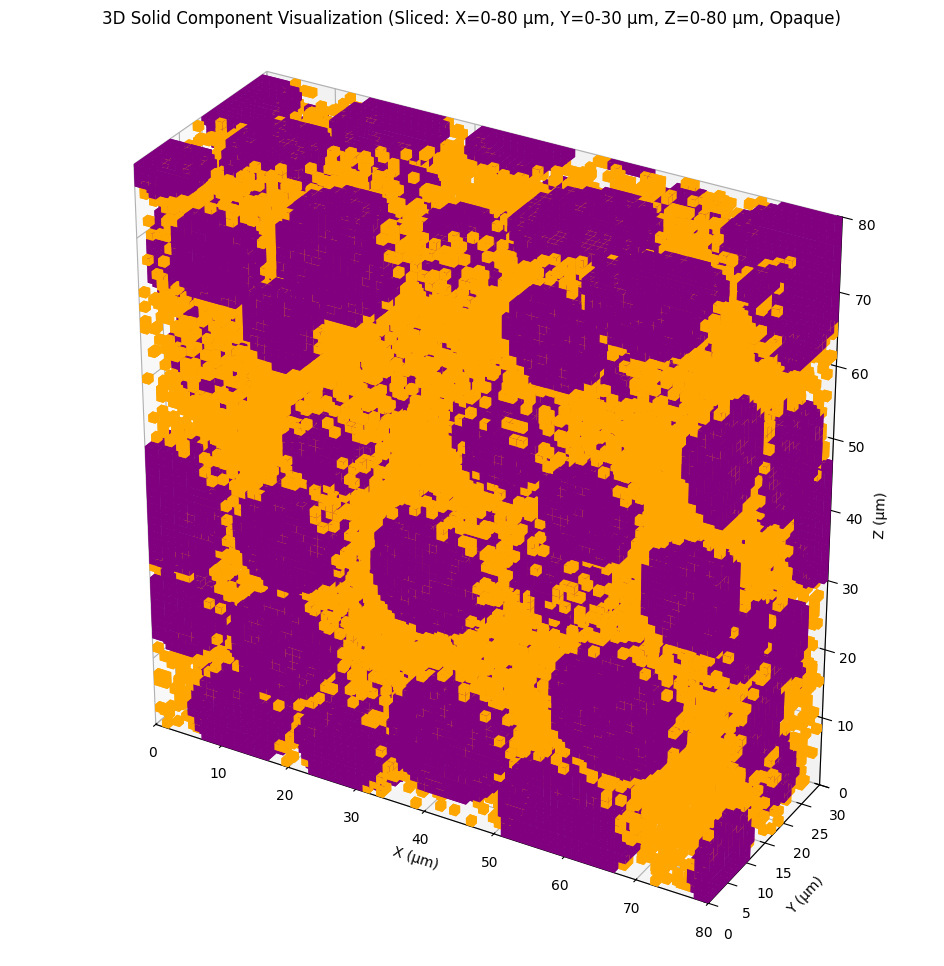

In [ ]:
# 1. Create a 3D figure and axes
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# 2. Define colors for each component and create masks
# LFP = 1 (e.g., Purple)
# CBM = 2 (e.g., Orange)
# Electrolyte = 0 (Transparent)

lfp_mask = component_map_3d == 1
cbm_mask = component_map_3d == 2
electrolyte_mask = component_map_3d == 0 # This will be transparent

# 3. Create color and filled arrays for the ENTIRE grid, but only populate the slice
D, H, W = component_map_3d.shape
# Initialize filled mask for the entire grid (all False initially)
full_filled = np.zeros((D, H, W), dtype=bool)
# Initialize colors array for the entire grid (fully transparent initially)
colors = np.full((D, H, W, 4), [0.0, 0.0, 0.0, 0.0]) # Use 'colors' variable name directly

# 4. Define the bounding box for visualization (voxel indices)
x_min_idx, x_max_idx = 0, 80
y_min_idx, y_max_idx = 0, 30
z_min_idx, z_max_idx = 0, 80 # Z corresponds to the first dimension in numpy array (depth)

# Ensure bounds are within the actual data dimensions
x_max_idx = min(x_max_idx, W)
y_max_idx = min(y_max_idx, H)
z_max_idx = min(z_max_idx, D)

# 5. Populate the full_filled and colors arrays ONLY within the slice
# Identify the filled voxels within the original component_map_3d that fall into the slice
slice_lfp_mask = lfp_mask[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx]
slice_cbm_mask = cbm_mask[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx]

# Set the corresponding locations in the full_filled mask to True
full_filled[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx][slice_lfp_mask] = True
full_filled[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx][slice_cbm_mask] = True

# Assign colors to the corresponding locations in the colors array with full opacity
colors[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx][slice_lfp_mask] = [0.5, 0.0, 0.5, 1.0] # RGBA: Purple, Alpha = 1.0 (Fully opaque)
colors[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx][slice_cbm_mask] = [1.0, 0.65, 0.0, 1.0] # RGBA: Orange, Alpha = 1.0 (Fully opaque)


# Check if there are any filled voxels in the *sliced* region (by checking the full_filled array)
if np.any(full_filled[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx]):
    # Use ax.voxels to visualize the full grid, but only the sliced part is filled/colored
    # Since we are providing filled and colors for the entire grid size (D, H, W),
    # ax.voxels will draw them at their correct positions relative to the origin (0,0,0).
    ax.voxels(full_filled,
              facecolors=colors, # Use the colors array with full opacity for filled voxels
              edgecolors=None, # Do not draw edges
              shade=False      # No shading for simplicity and speed
             )
else:
    print(f"No LFP or CBM voxels found in the range X:{x_min_idx}-{x_max_idx-1}, Y:{y_min_idx}-{y_max_idx-1}, Z:{z_min_idx}-{z_max_idx-1}.")


# 6. Set axis limits to match the physical extent of the sliced region
# Convert voxel indices to physical units (Œºm) using voxel_size
x_min_mu = x_min_idx * voxel_size
x_max_mu = x_max_idx * voxel_size
y_min_mu = y_min_idx * voxel_size
y_max_mu = y_max_idx * voxel_size
z_min_mu = z_min_idx * voxel_size
z_max_mu = z_max_idx * voxel_size

ax.set_xlim(x_min_mu, x_max_mu)
ax.set_ylim(y_min_mu, y_max_mu)
ax.set_zlim(z_min_mu, z_max_mu)


# Set axis labels to reflect physical units (Œºm)
ax.set_xlabel(f'X (Œºm)')
ax.set_ylabel(f'Y (Œºm)')
ax.set_zlabel(f'Z (Œºm)')


# 7. Add title
ax.set_title(f'3D Solid Component Visualization (Sliced: X={x_min_mu:.0f}-{x_max_mu:.0f} Œºm, Y={y_min_mu:.0f}-{y_max_mu:.0f} Œºm, Z={z_min_mu:.0f}-{z_max_mu:.0f} Œºm, Opaque)')

# 8. Ensure equal aspect ratio (for voxel grid with equal voxel size, this means unit aspect ratio)
ax.set_aspect('equal', adjustable='box')

# No color bar needed for this simplified view

# 9. Display the plot
plt.show()

Visualizing X-Z slices for Y = 0 to 5 as individual plots.


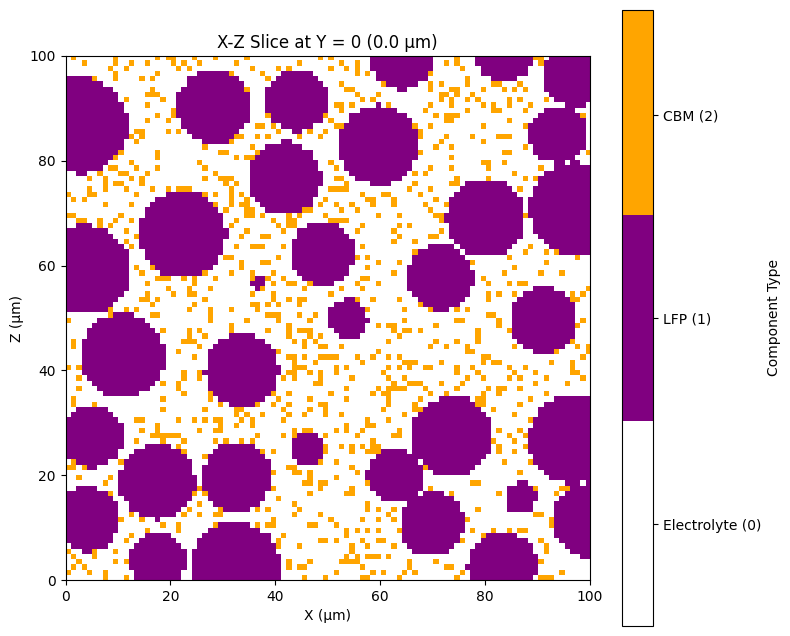

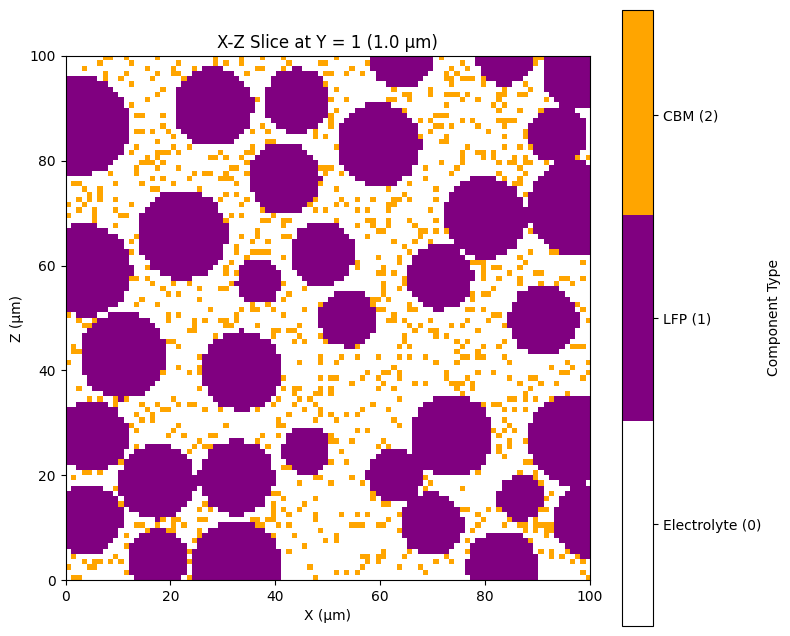

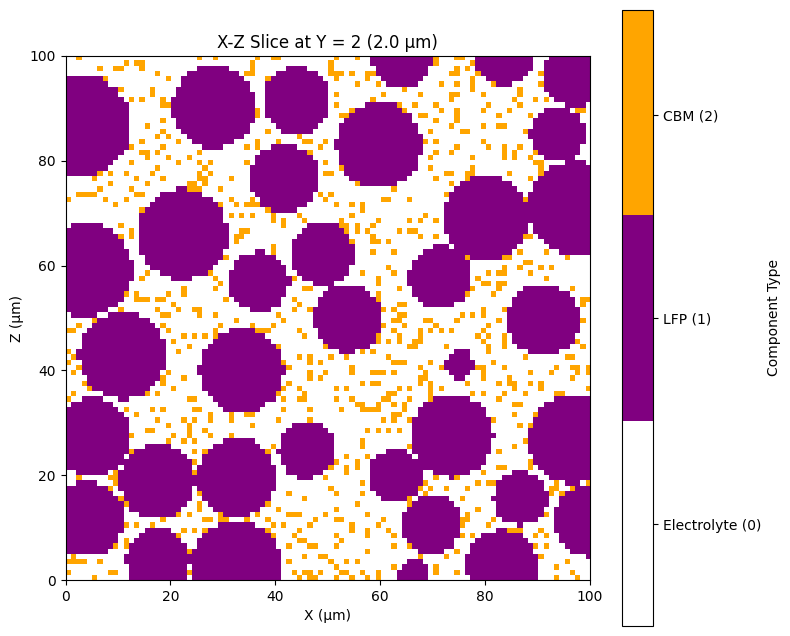

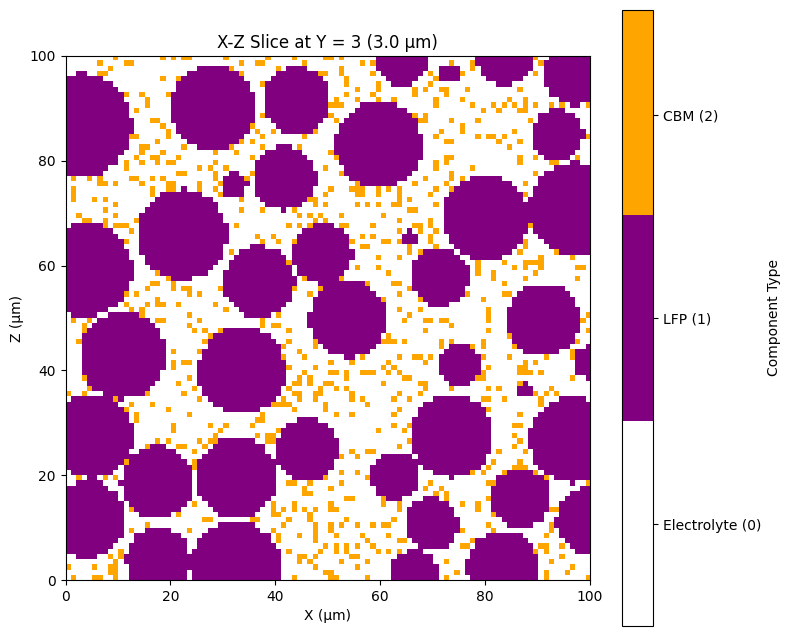

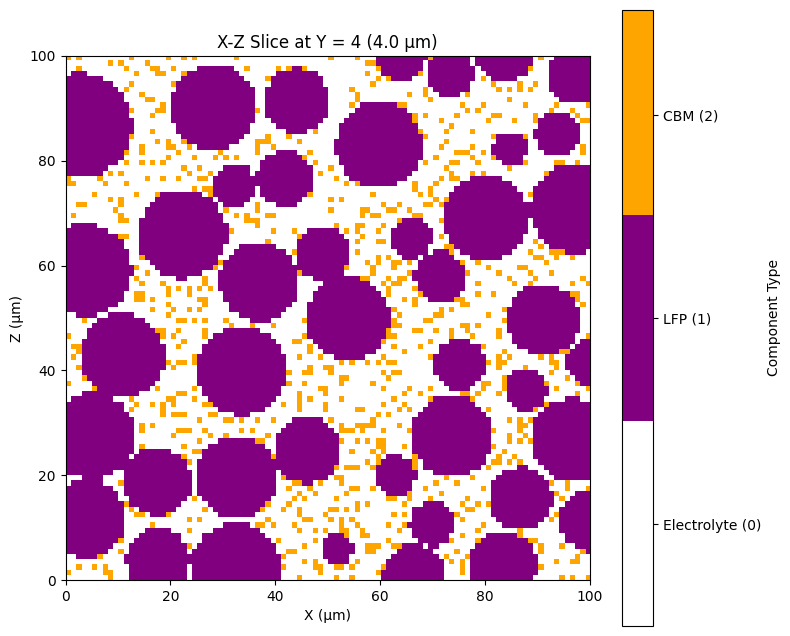

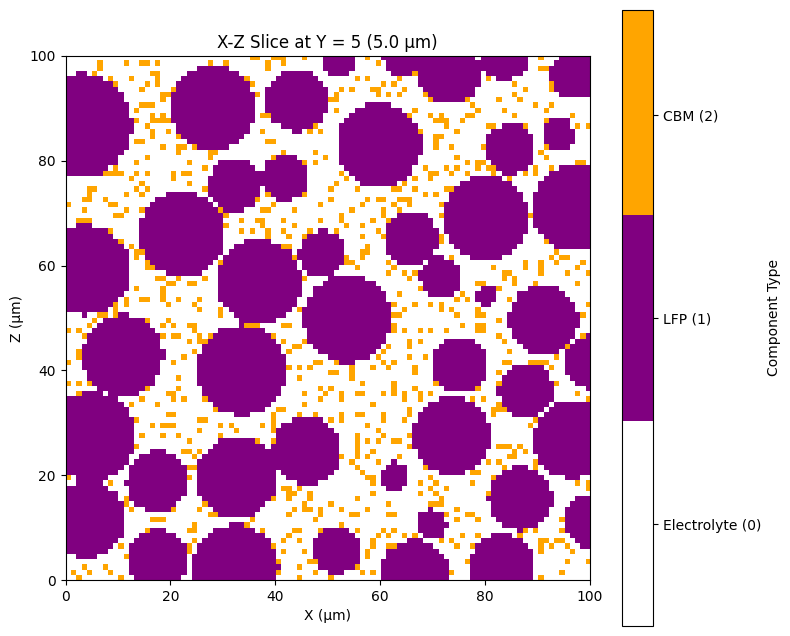

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define the range of Y slices to visualize
y_start_slice = 0
y_end_slice = 5 # Inclusive, so slices from y=0 to y=5

# Ensure the slice range is within the bounds of the data
H = component_map_3d.shape[1] # Height is the second dimension (Y)
y_end_slice = min(y_end_slice, H - 1)

# Define a colormap for the components
# 0: Electrolyte (e.g., White)
# 1: LFP (e.g., Purple)
# 2: CBM (e.g., Orange)
cmap_components = ListedColormap(["#FFFFFF", "#800080", "#FFA500"])

print(f"Visualizing X-Z slices for Y = {y_start_slice} to {y_end_slice} as individual plots.")

# Iterate through the specified Y slices and create a separate plot for each
for i, y_slice in enumerate(range(y_start_slice, y_end_slice + 1)):
    # Create a new figure and axes for each slice
    fig, ax = plt.subplots(figsize=(8, 8)) # Adjust figure size for individual plots

    # Extract the X-Z slice at the current Y level
    # component_map_3d has shape (D, H, W) -> Z, Y, X
    xz_slice = component_map_3d[:, y_slice, :] # Slice along the Y dimension

    # Visualize the X-Z slice using imshow
    # origin='lower' to match typical Cartesian coordinates (X horizontal, Z vertical)
    # aspect='equal' to ensure correct aspect ratio
    # extent to label axes in physical units (Œºm) - Z is vertical, X is horizontal
    D, H, W = component_map_3d.shape # Get dimensions again for clarity

    x_min_mu = 0 * voxel_size
    x_max_mu = W * voxel_size # Extent is exclusive at the upper bound
    z_min_mu = 0 * voxel_size
    z_max_mu = D * voxel_size # Extent is exclusive at the upper bound


    im = ax.imshow(xz_slice, cmap=cmap_components, origin='lower', aspect='equal',
                   extent=[x_min_mu, x_max_mu, z_min_mu, z_max_mu])

    # Set title and labels for each slice
    ax.set_title(f'X-Z Slice at Y = {y_slice} ({y_slice * voxel_size:.1f} Œºm)')
    ax.set_xlabel('X (Œºm)')
    ax.set_ylabel('Z (Œºm)')

    # Add a colorbar to the figure (optional, but helpful)
    # Create a dummy scalar mappable for the colorbar associated with this figure
    sm = plt.cm.ScalarMappable(cmap=cmap_components, norm=plt.Normalize(vmin=0, vmax=2))
    sm.set_array([]) # Dummy array
    # Position the colorbar next to the current axes
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
    cbar.set_ticks([0.33, 1, 1.66]) # Position ticks in the middle of color ranges
    cbar.set_ticklabels(['Electrolyte (0)', 'LFP (1)', 'CBM (2)'])
    cbar.set_label('Component Type')

    # Ensure tight layout for the individual figure
    plt.tight_layout()
    # Display the plot for the current slice
    plt.show()